In [796]:
import pandas as pd
import numpy as np
from mlgear.utils import show
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [797]:
battlegrounds = ['Georgia', 'Texas', 'Ohio', 'Michigan', 'Pennsylvania', 'Maine', 'Iowa', 'South Carolina',
                 'North Carolina', 'Florida', 'Colorado', 'Nebraska', 'Arizona', 'Alaska', 'New Mexico',
                 'Nevada', 'National', 'Wisconsin']

def plot_polls(polls, grouper, election='president', year=2020, day_filter=30, count_filter=10,
               battlegrounds=battlegrounds):
    if not isinstance(grouper, list):
        grouper = [grouper]
    disp = polls[(polls['year'] == year) &
                 (polls['days_until'] < day_filter) &
                 (polls['election'] == election) &
                 (polls['state'].isin(battlegrounds))]
    disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])
    disp = disp.groupby(['election'] + grouper)
    disp = disp[['polled_margin', 'actual_margin', 'margin_diff', 'margin_abs_diff2']]
    disp = disp.agg(['mean', 'std', 'count']).reset_index()
    disp.columns = ['election'] + grouper + ['polled_margin_mean', 'polled_margin_std', 'polled_margin_count',
                   'actual_margin_mean', 'actual_margin_count', 'actual_margin_std', 'margin_diff_mean',
                   'margin_diff_std', 'margin_diff_count', 'margin_abs_diff2_mean', 'margin_abs_diff2_std',
                   'margin_abs_diff2_count']
    disp = disp[disp['margin_abs_diff2_count'] > count_filter]
        
    if disp.shape[0] > 0:
        show(disp.sort_values('margin_abs_diff2_mean', ascending=False)[grouper + ['polled_margin_mean',
                                                                        'actual_margin_mean', 'margin_diff_mean',
                                                                        'polled_margin_count']].reset_index(drop=True),
             max_rows=None)

        if len(grouper) == 2:
            disp = disp.sort_values([grouper[0], 'margin_abs_diff2_mean'])
        else:
            disp = disp.sort_values('margin_abs_diff2_mean')
        meanx = disp['margin_abs_diff2_mean'].values
        stdx = disp['margin_abs_diff2_std'].values
        nx = disp['margin_abs_diff2_count'].values
        labels = [l + ' (N={})'.format(nx[i]) for i, l in enumerate([' '.join(x) for x in disp[grouper].values])]
        cis_80 = 1.282 * (stdx / np.sqrt(nx))
        x_pos = [i for i, _ in enumerate(labels)]

        plt.figure(figsize=(20, int(len(labels))))
        for zone in ['ytick', 'xtick']:
            plt.rc(zone, labelsize=14)
            
        plt.barh(x_pos, meanx, color='green', xerr=cis_80)
        plt.yticks(x_pos, labels)
        plt.xlabel('Average Absolute Difference Between Polled and Actual Margin for {} {} (lower = better)'.format(election.title(), year),
                   fontsize=14)
        plt.show()

## Load Polls

In [798]:
polls = pd.read_csv('polls.csv')
polls

election        state  year    stage dem_candidate  \
0      president      Alabama  2004  general        NoName   
1      president      Alabama  2004  general        NoName   
2      president      Alabama  2004  general        NoName   
3      president      Alabama  2004  general        NoName   
4      president      Alabama  2004  general        NoName   
...          ...          ...   ...      ...           ...   
23986      House         NC-9  2019  general      Mccready   
23987   governor    Louisiana  2019  general       Edwards   
23988   governor  Mississippi  2019  general          Hood   
23989   governor    Louisiana  2019  general       Edwards   
23990   governor    Louisiana  2019  general       Edwards   

                                pollster     N  methodology  days_until  \
0                             SurveyUSA    735      Unknown           6   
1                        Capital Survey    645      Unknown          19   
2                             SurveyUSA    699      Unknown          30   
3                       Mobile Register    619      Unknown          33   
4                                   ARG    699      Unknown          47   
...                                  ...   ...          ...         ...   
23986                       co/efficient  1175     IVR/Text           4   
23987                  Data for Progress  1434  Online/Text          10   
23988                  Hickman Analytics   508         Live          21   
23989  Edgewater Research/My People Vote   722          IVR          19   
23990  Edgewater Research/My People Vote   661          IVR           5   

      538grade  ...  dem_actual  rep_actual  ind_actual  dem_diff  rep_diff  \
0      Unknown  ...   37.099698   62.900302        -1.0  3.900302 -3.900302   
1      Unknown  ...   37.099698   62.900302        -1.0  0.900302 -0.900302   
2      Unknown  ...   37.099698   62.900302        -1.0 -1.099698  1.099698   
3      Unknown  ...   37.099698   62.900302        -1.0 -5.599698  5.599698   
4      Unknown  ...   37.099698   62.900302        -1.0  5.900302 -5.900302   
...        ...  ...         ...         ...         ...       ...       ...   
23986      C/D  ...   48.700000   50.690000         0.0  2.050000 -1.440000   
23987       B-  ...   51.330000   48.670000         0.0 -1.130000  1.130000   
23988      B/C  ...   46.830000   51.910000         0.0  5.170000 -3.910000   
23989      B/C  ...   51.330000   48.670000         0.0  0.520000 -0.520000   
23990      B/C  ...   51.330000   48.670000         0.0 -1.180000  1.180000   

       polled_margin  actual_margin  margin_diff  margin_abs_diff  \
0              -18.0     -25.800604     7.800604         7.800604   
1              -24.0     -25.800604     1.800604         1.800604   
2              -28.0     -25.800604    -2.199396         2.199396   
3              -37.0     -25.800604   -11.199396        11.199396   
4              -14.0     -25.800604    11.800604        11.800604   
...              ...            ...          ...              ...   
23986            1.5      -1.990000     3.490000         3.490000   
23987            0.4       2.660000    -2.260000         2.260000   
23988            4.0      -5.080000     9.080000         9.080000   
23989            3.7       2.660000     1.040000         1.040000   
23990            0.3       2.660000    -2.360000         2.360000   

       538grade_simple  
0              Unknown  
1              Unknown  
2              Unknown  
3              Unknown  
4              Unknown  
...                ...  
23986                C  
23987                B  
23988                C  
23989                C  
23990                C  

[23991 rows x 24 columns]

## State Difficulty

## President 2020 ##
             state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             Iowa            0.112500           -8.152965          8.265465   
1        Wisconsin            7.604545            0.627100          6.977446   
2             Ohio           -2.017826           -8.031962          6.014136   
3          Florida            2.266462           -3.358369          5.624830   
4         Michigan            7.398909            2.783528          4.615381   
5     Pennsylvania            4.942090            1.164884          3.777206   
6            Texas           -1.827727           -5.578594          3.750866   
7   South Carolina           -7.963846          -11.676642          3.712796   
8   North Carolina            2.094746           -1.348121          3.442866   
9          Arizona            2.760417            0.308710          2.451707   
10          Nevada            3.923077            2.390535          1.532542   
11         Georgia 

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


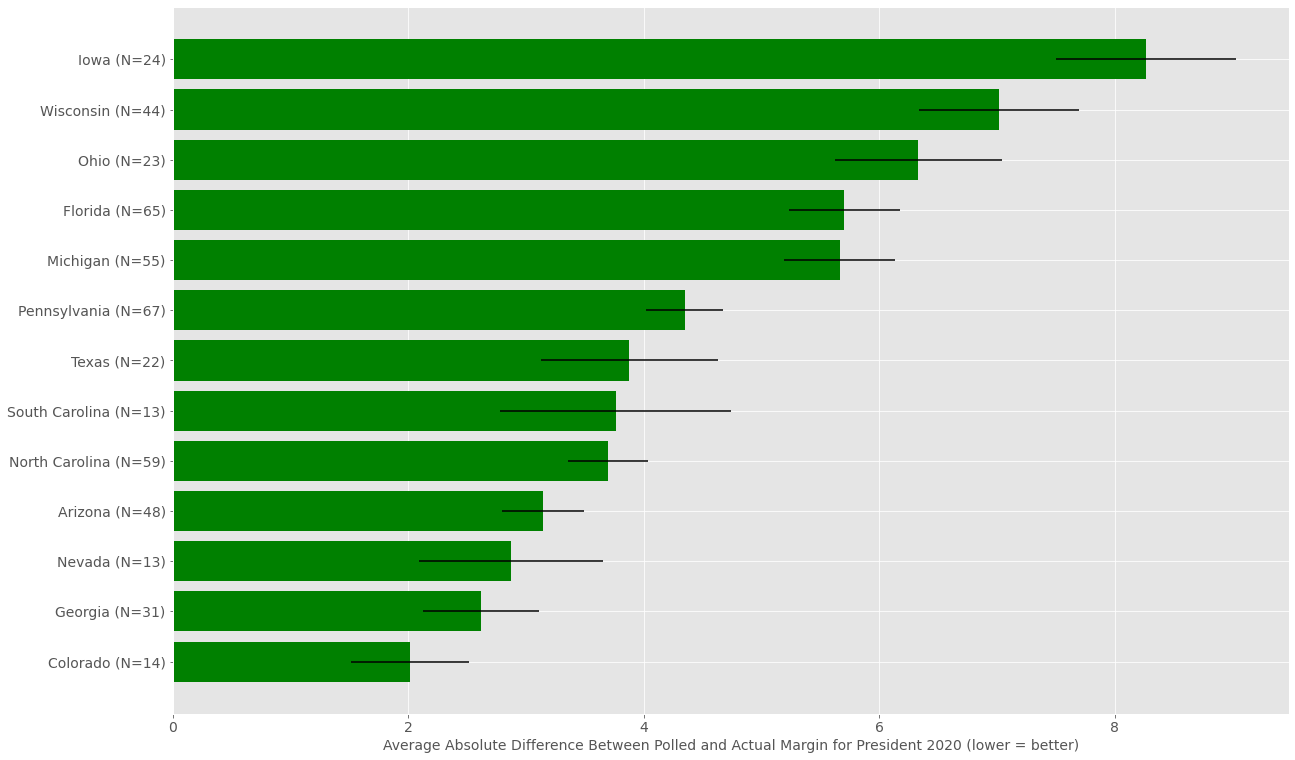

-
## Senate 2020 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Maine            3.500000           -8.501941         12.001941   
1            Iowa            1.637895           -6.478210          8.116105   
2        Michigan            6.955714            1.685031          5.270683   
3  North Carolina            3.526429           -1.746737          5.273165   
4           Texas           -5.682353           -9.639404          3.957051   
5         Arizona            6.258065            2.348697          3.909367   
6         Georgia            1.217692           -1.778976          2.996668   

   polled_margin_count  
0                   20  
1                   19  
2                   35  
3                   42  
4                   17  
5                   31  
6                   26  
(7, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


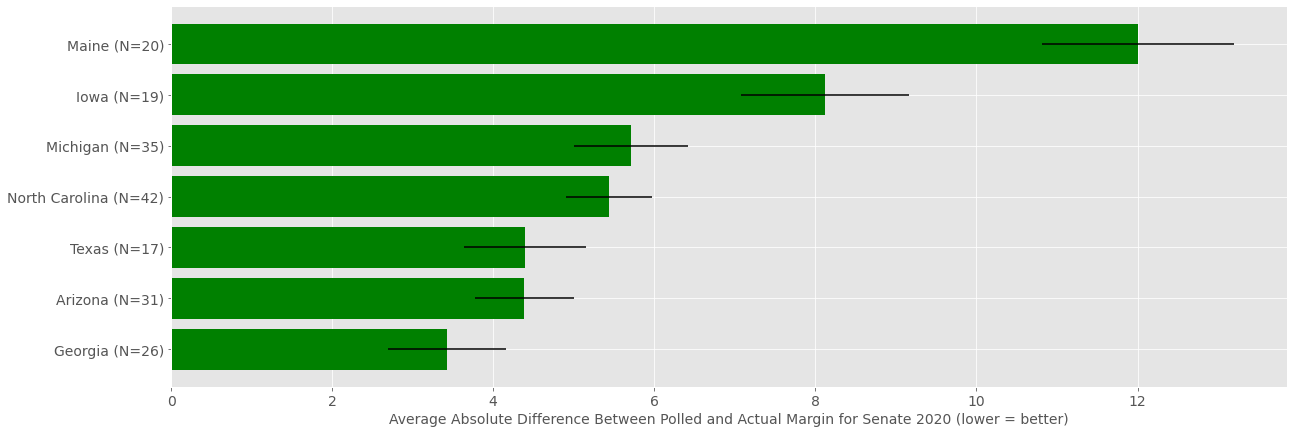

-
## Governor 2020 ##
-
## President 2018 ##
-
## Senate 2018 ##
      state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0    Nevada            0.228846            5.028033         -4.799187   
1      Ohio           11.218182            6.842623          4.375558   
2   Arizona            0.141667            2.346675         -2.205008   
3  Michigan            9.046154            6.502586          2.543568   
4     Texas           -5.417143           -2.564486         -2.852657   
5   Florida            1.223784           -0.121353          1.345137   

   polled_margin_count  
0                   26  
1                   11  
2                   48  
3                   26  
4                   21  
5                   74  
(6, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


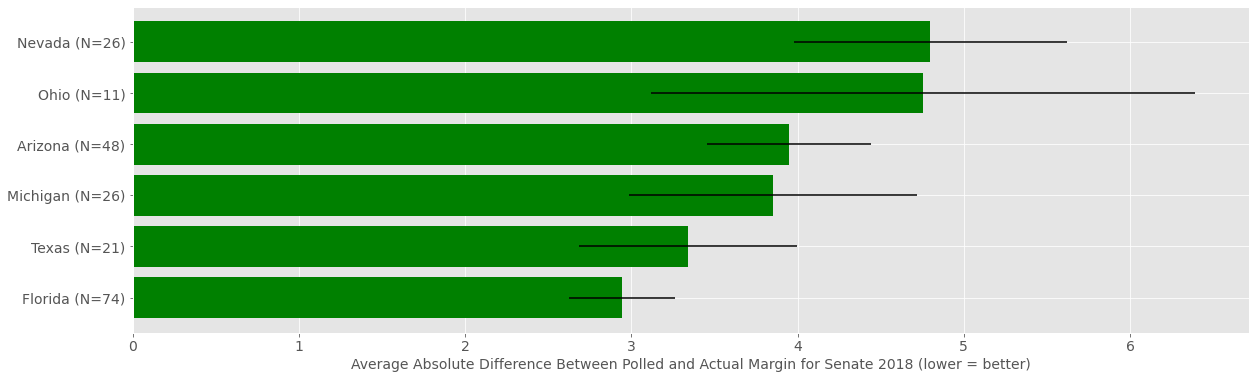

-
## Governor 2018 ##
      state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0   Florida            3.108750           -0.400000          3.508750   
1   Arizona          -15.321429          -14.160000         -1.161429   
2  Michigan            8.600000            9.560000         -0.960000   

   polled_margin_count  
0                   32  
1                   14  
2                   12  
(3, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


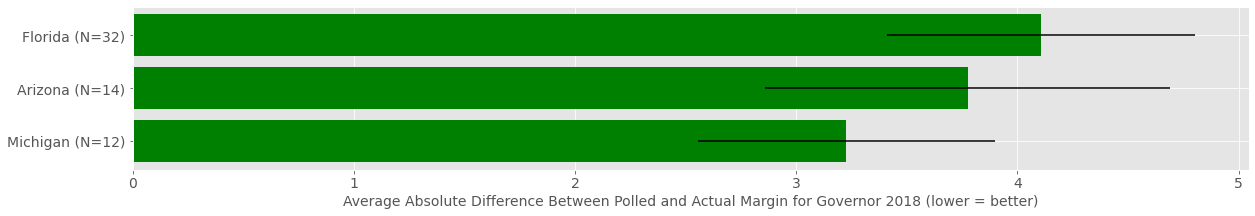

-
## President 2016 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0            Ohio           -2.005000           -8.070000          6.065000   
1       Wisconsin            5.211538           -0.770000          5.981538   
2  North Carolina            1.743462           -3.660000          5.403462   
3        Michigan            4.650000           -0.220000          4.870000   
4    Pennsylvania            3.795862           -0.710000          4.505862   
5         Florida            1.372222           -1.190000          2.562222   
6          Nevada            0.552381            2.420000         -1.867619   
7         Georgia           -3.173125           -5.090000          1.916875   
8         Arizona           -2.000000           -3.500000          1.500000   
9        Colorado            3.031429            4.910000         -1.878571   

   polled_margin_count  
0                   18  
1                   13  
2                   26  
3      

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


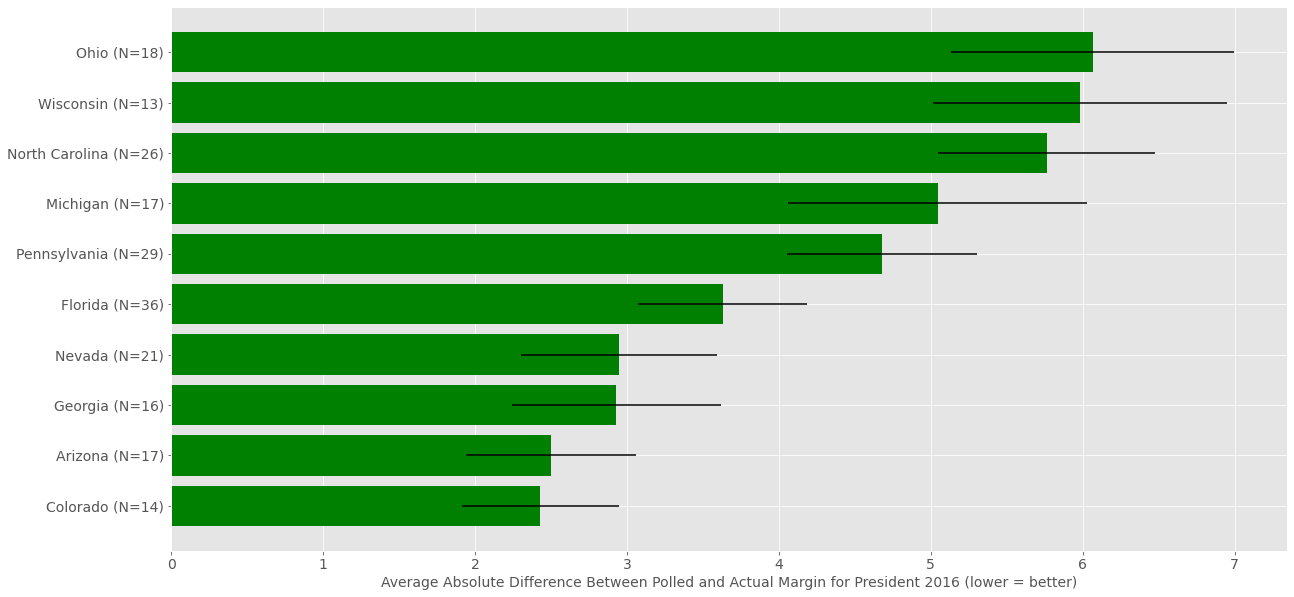

-
## Senate 2016 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  North Carolina           -1.027273           -5.690000          4.662727   
1         Georgia          -10.683333          -13.750000          3.066667   
2    Pennsylvania            2.556522           -1.430000          3.986522   
3         Florida           -5.253333           -7.670000          2.416667   
4         Arizona           -9.250000          -12.960000          3.710000   
5          Nevada            1.381250            2.430000         -1.048750   

   polled_margin_count  
0                   22  
1                   12  
2                   23  
3                   30  
4                   12  
5                   16  
(6, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


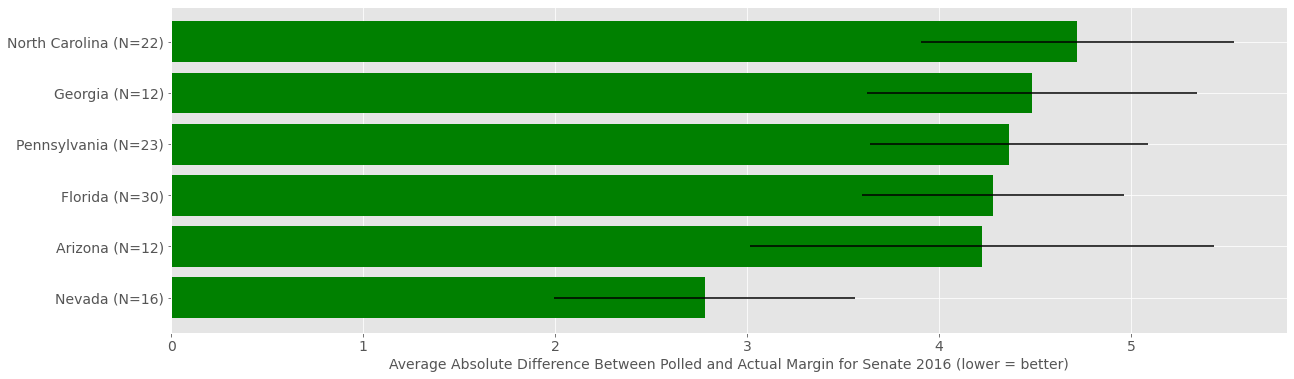

-
## Governor 2016 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  North Carolina            3.428571            0.220000          3.208571   

   polled_margin_count  
0                   14  
(1, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


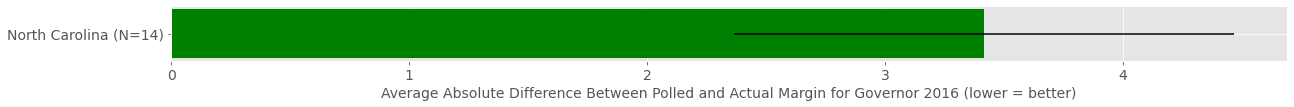

-
## President 2014 ##
-
## Senate 2014 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0         Georgia           -1.035517           -7.841379          6.805862   
1            Iowa           -1.603448           -8.356552          6.753103   
2  North Carolina            0.551724           -1.681379          2.233103   
3        Colorado           -1.741176           -2.804118          1.062941   

   polled_margin_count  
0                   29  
1                   29  
2                   29  
3                   34  
(4, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


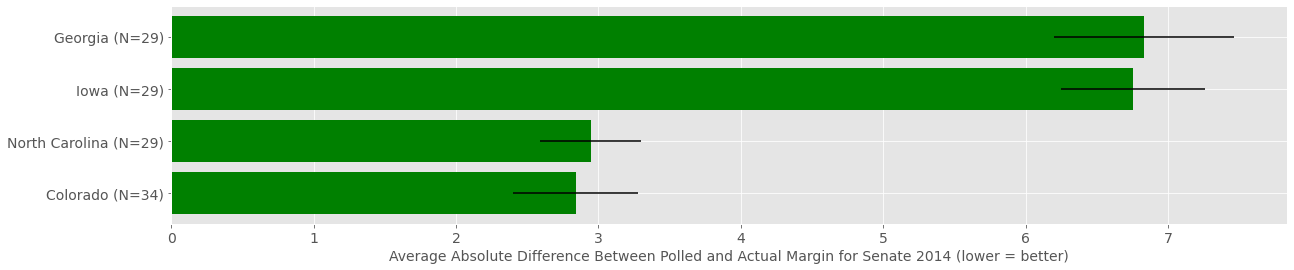

-
## Governor 2014 ##
      state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0      Iowa          -18.000000          -21.720000          3.720000   
1   Georgia           -3.421053           -7.860000          4.438947   
2  Colorado            0.764706            3.350000         -2.585294   
3  Michigan           -1.833333           -4.060000          2.226667   
4   Florida            0.064706           -1.070000          1.134706   

   polled_margin_count  
0                   13  
1                   19  
2                   17  
3                   12  
4                   17  

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])



(5, 5)


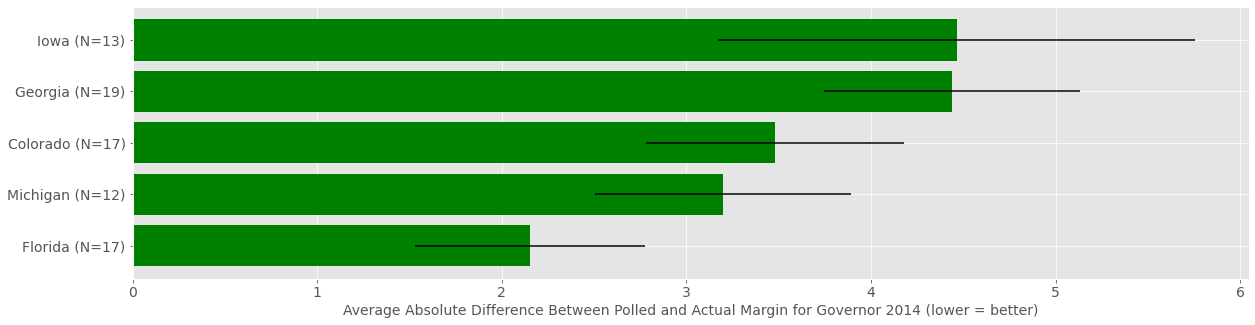

-
## President 2012 ##
             state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0         Nebraska          -16.018750          -22.075488          6.056738   
1         Michigan            5.110000            9.559920         -4.449920   
2         Colorado            1.264384            5.453160         -4.188777   
3             Iowa            1.983871            5.881885         -3.898014   
4        Wisconsin            3.437838            7.002679         -3.564841   
5       New Mexico            7.294118           10.434971         -3.140853   
6           Nevada            3.768627            6.772705         -3.004077   
7   North Carolina           -2.156522           -2.059527         -0.096995   
8          Florida           -0.882500            0.879972         -1.762472   
9     Pennsylvania            4.276364            5.439470         -1.163106   
10            Ohio            2.144872            3.013051         -0.868180   
11         Georgi

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


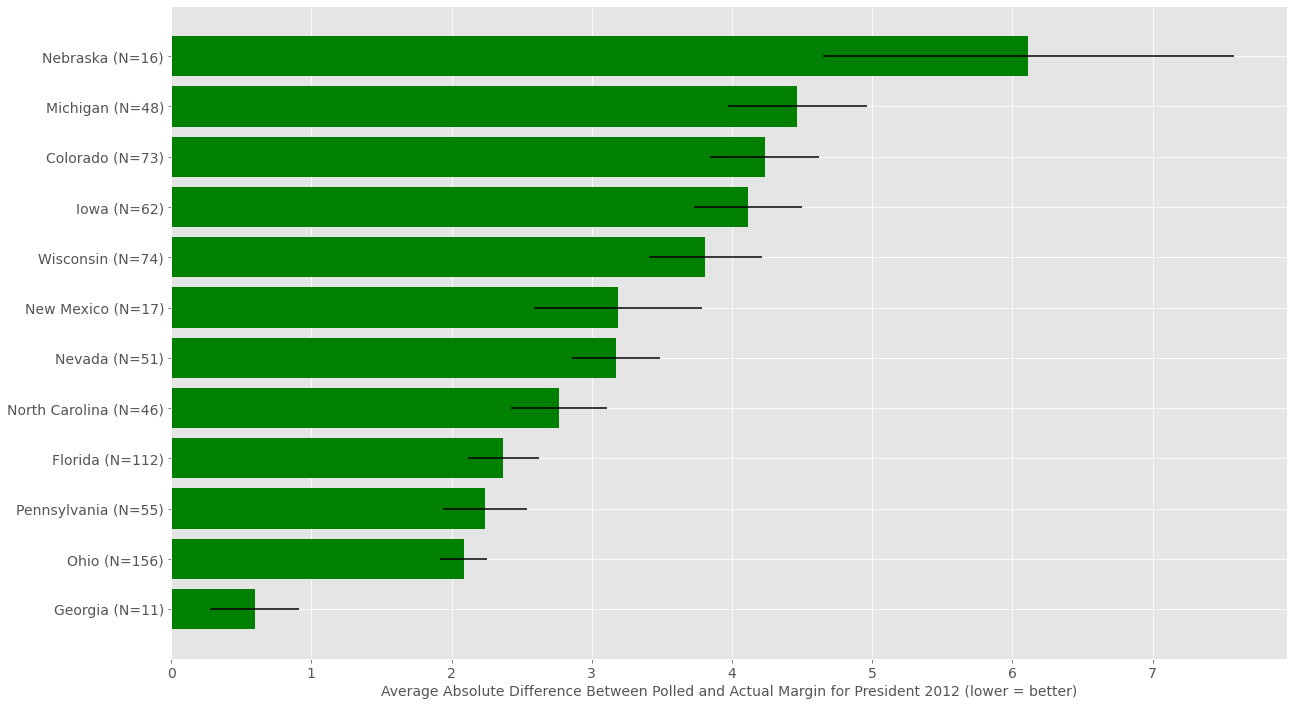

-
## Senate 2012 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0      Nebraska           -6.900000          -15.546066          8.646066   
1      Michigan           13.407333           21.322728         -7.915395   
2       Florida            7.699412           13.233583         -5.534172   
3     Wisconsin            0.888525            5.658769         -4.770245   
4  Pennsylvania            5.758491            9.219174         -3.460683   
5       Arizona           -4.000000           -3.131553         -0.868447   
6    New Mexico            7.076923            5.900562          1.176361   
7          Ohio            4.864356            6.198588         -1.334232   
8        Nevada           -3.625806           -1.241903         -2.383903   

   polled_margin_count  
0                   19  
1                   30  
2                   68  
3                   61  
4                   53  
5                   15  
6                   13  
7        

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


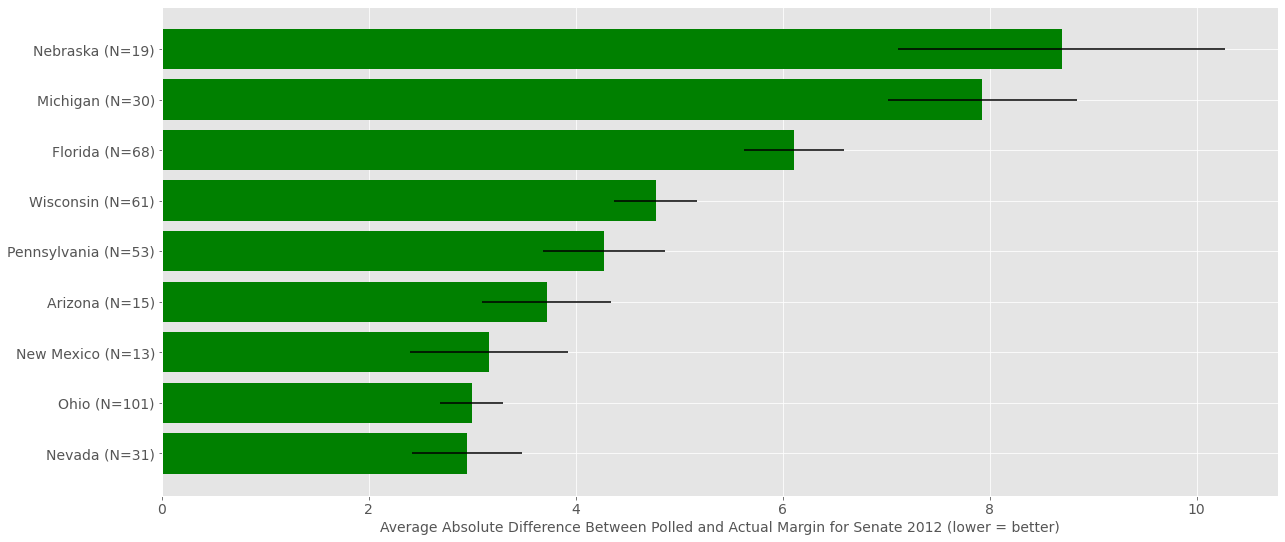

-
## Governor 2012 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0       Wisconsin           -5.083333           -6.822011          1.738678   
1  North Carolina          -13.083333          -11.632780         -1.450553   

   polled_margin_count  
0                   24  
1                   24  
(2, 5)


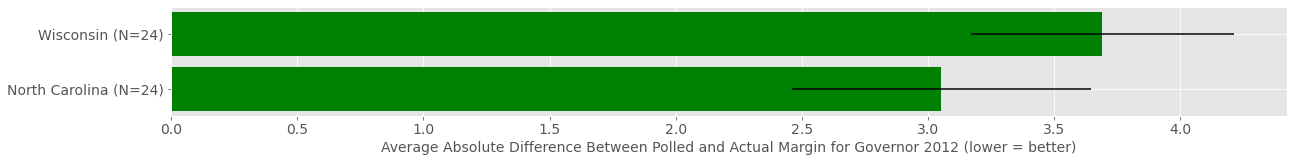

-
## President 2010 ##
-
## Senate 2010 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0        Nevada           -3.175000            5.952522         -9.127522   
1      Colorado           -2.190476            1.741955         -3.932431   
2  Pennsylvania           -4.250000           -2.018093         -2.231907   
3     Wisconsin           -6.807692           -4.874361         -1.933331   
4          Ohio          -17.200000          -17.785974          0.585974   

   polled_margin_count  
0                   40  
1                   42  
2                   60  
3                   26  
4                   30  
(5, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


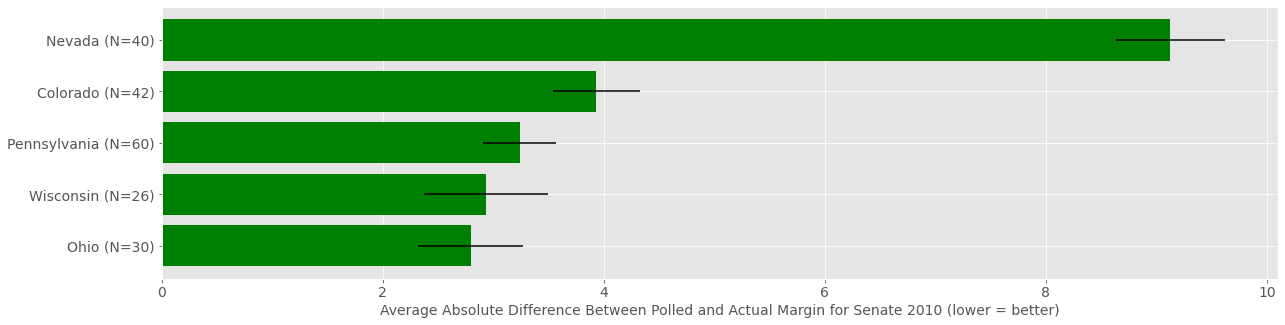

-
## Governor 2010 ##
           state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0         Alaska           -5.062500           -5.132692          0.070192   
1       Colorado            5.785714           15.767035         -9.981321   
2         Nevada          -17.275862          -12.196885         -5.078977   
3     New Mexico           -8.785714           -6.873889         -1.911826   
4        Florida           -0.016129           -1.192924          1.176795   
5      Wisconsin           -7.809524           -5.792016         -2.017508   
6   Pennsylvania           -8.351852           -8.985351          0.633500   
7        Georgia           -7.652174          -10.238728          2.586554   
8          Texas          -10.714286          -12.932814          2.218529   
9           Ohio           -3.754386           -2.270860         -1.483526   
10      Michigan          -17.600000          -18.477213          0.877213   

    polled_margin_count  
0              

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


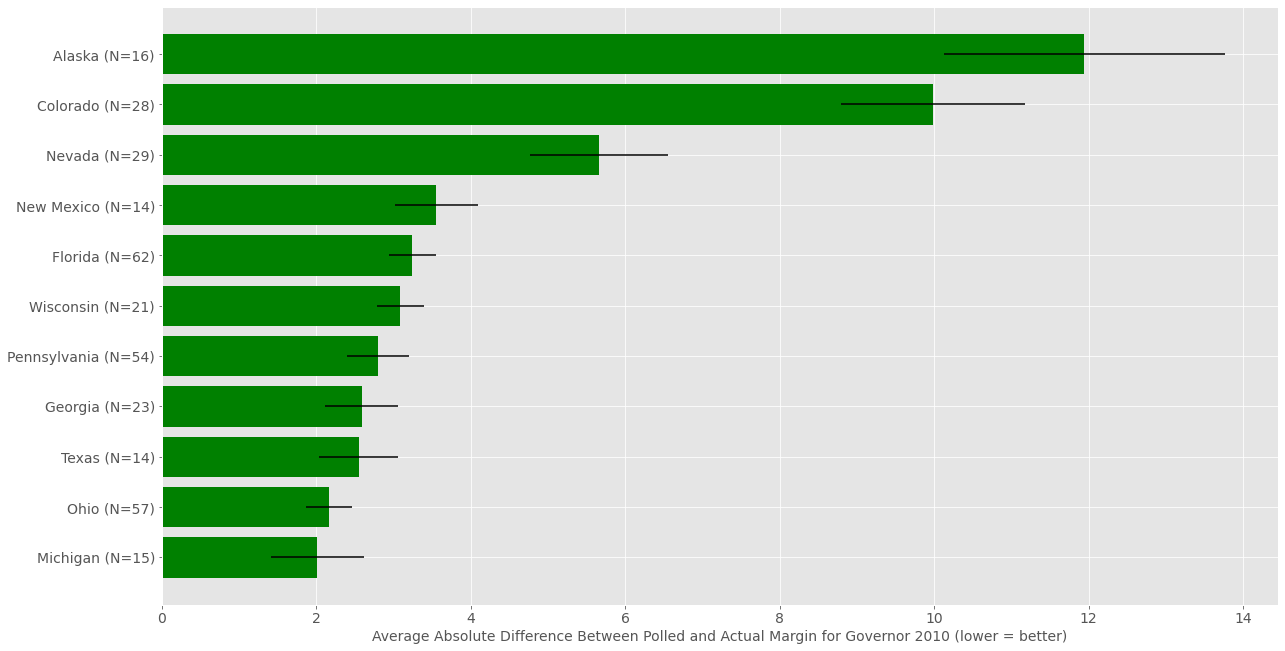

-
## President 2008 ##
             state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Nevada            4.934328           12.708168         -7.773840   
1           Alaska          -15.213333          -21.969685          6.756351   
2       New Mexico            9.150000           15.279850         -6.129850   
3          Arizona           -3.954545           -8.583013          4.628468   
4            Maine           15.881481           17.561554         -1.680072   
5             Ohio            4.155000            4.647014         -0.492014   
6        Wisconsin           11.058621           14.069697         -3.011076   
7             Iowa           12.786111            9.658167          3.127944   
8         Colorado            6.673239            9.067181         -2.393941   
9         Michigan           14.578571           16.670555         -2.091983   
10  South Carolina          -11.333333           -9.062445         -2.270888   
11    Pennsylvani

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


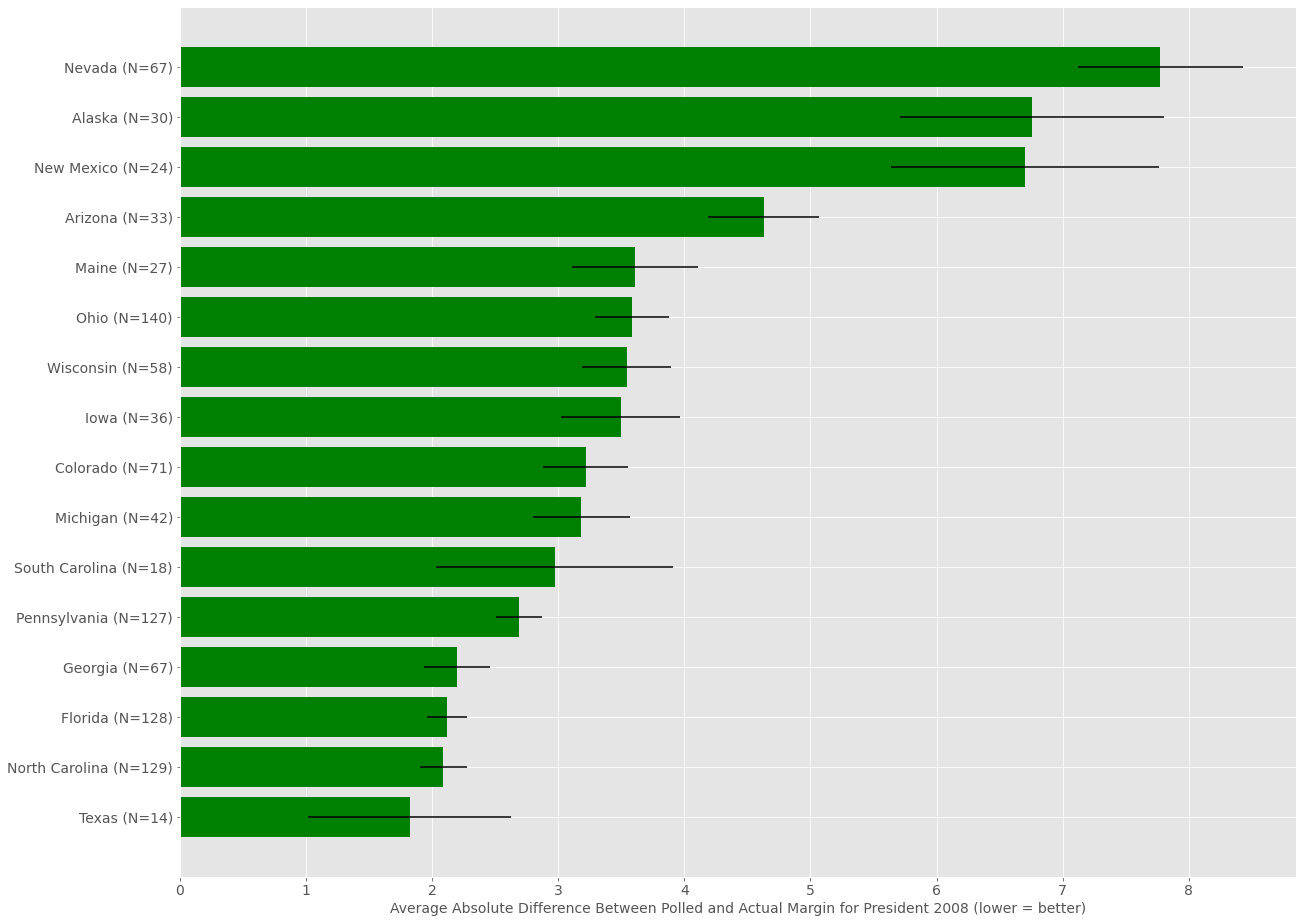

-
## Senate 2008 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Maine          -15.111111          -22.761980          7.650869   
1        Michigan           22.545455           29.574109         -7.028655   
2          Alaska            6.954545            1.300552          5.653993   
3      New Mexico           17.052632           22.657040         -5.604408   
4  North Carolina            3.629730            8.678767         -5.049037   
5            Iowa           21.700000           25.411715         -3.711715   
6         Georgia           -3.857143           -5.597323          1.740180   
7           Texas          -10.909091          -12.164722          1.255631   
8        Colorado           11.027778           10.659346          0.368432   

   polled_margin_count  
0                   27  
1                   22  
2                   22  
3                   19  
4                   74  
5                   20  
6             

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


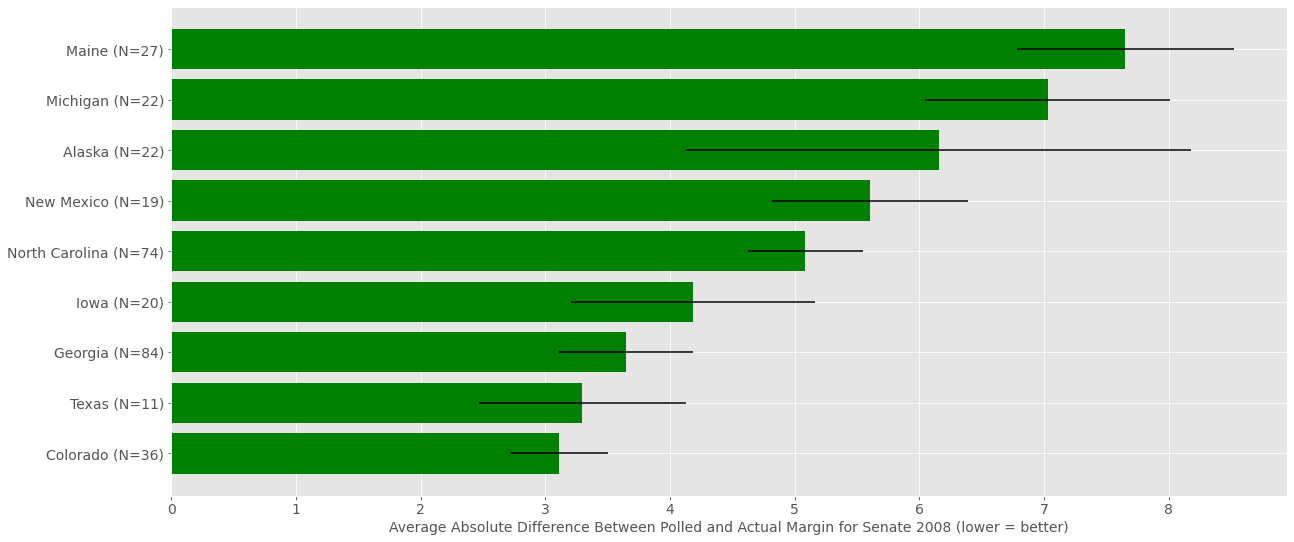

-
## Governor 2008 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  North Carolina            1.128571            3.464532         -2.335960   

   polled_margin_count  
0                   42  
(1, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


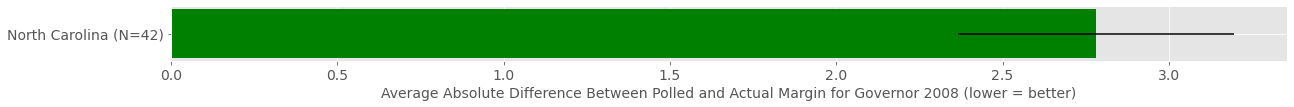

-
## President 2006 ##
-
## Senate 2006 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0         Texas          -29.754545          -26.029132         -3.725413   
1  Pennsylvania           11.274074           17.370038         -6.095964   
2      Michigan           11.832727           15.862170         -4.029443   
3          Ohio           10.710204           12.341814         -1.631610   
4       Arizona           -7.679167          -10.080818          2.401651   
5       Florida           24.350000           22.436890          1.913110   
6        Nevada          -13.647059          -14.722242          1.075184   

   polled_margin_count  
0                   11  
1                   54  
2                   55  
3                   49  
4                   24  
5                   32  
6                   17  
(7, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


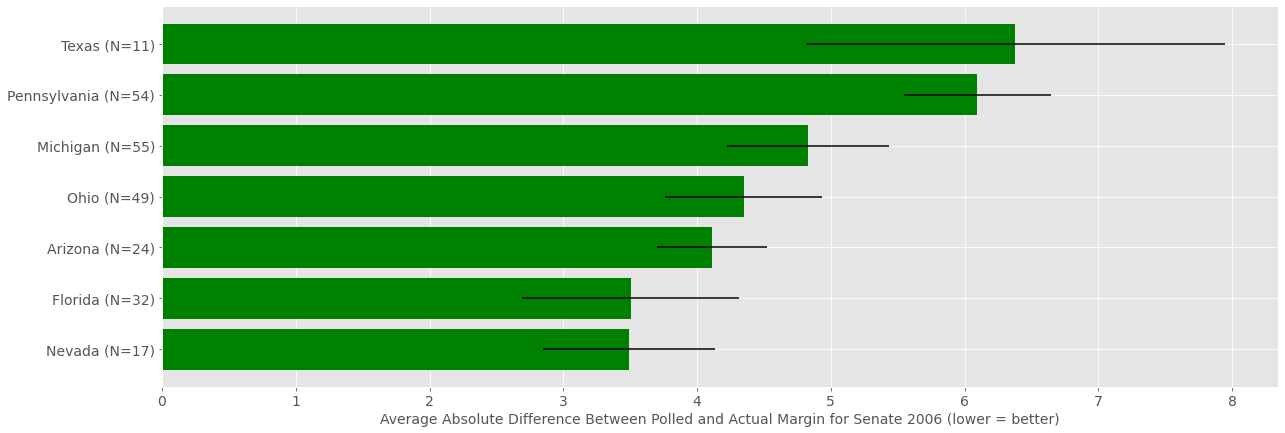

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


-
## Governor 2006 ##
             state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0          Arizona           22.387500           27.562883         -5.175383   
1   South Carolina          -20.000000          -10.316874         -9.683126   
2             Iowa            2.270000            9.570755         -7.300755   
3             Ohio           21.583333           24.160719         -2.577386   
4         Colorado           15.504348           17.126055         -1.621707   
5         Michigan            8.862222           10.819800         -1.957578   
6          Georgia          -15.947368          -20.250170          4.302802   
7        Wisconsin            5.086957            7.567572         -2.480616   
8           Alaska           -3.985714           -7.961691          3.975977   
9     Pennsylvania           21.210000           20.770750          0.439250   
10         Florida           -7.546667           -7.221346         -0.325320   
11          Nevada

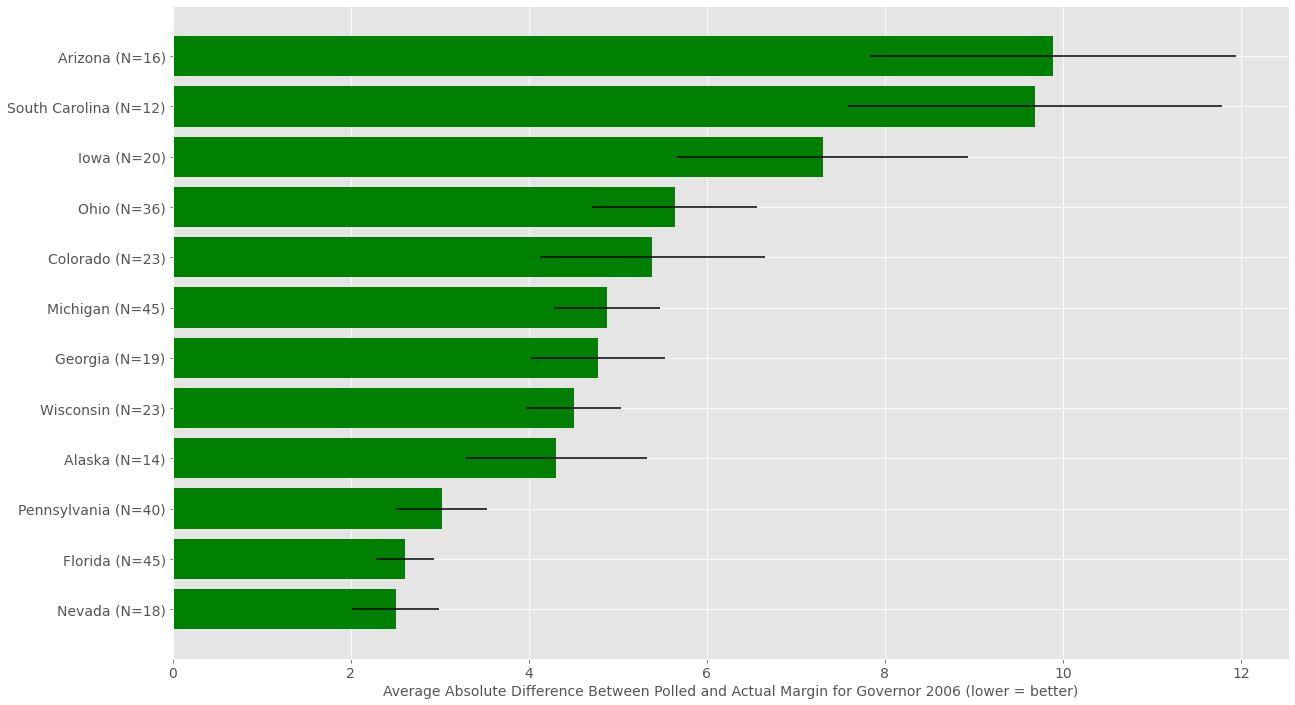

-
## President 2004 ##
             state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0   North Carolina           -7.409091          -12.474064          5.064973   
1          Florida           -1.333000           -5.037002          3.704002   
2          Arizona           -9.117647          -10.518466          1.400819   
3       New Mexico           -0.807692           -0.795798         -0.011894   
4        Wisconsin           -1.083019            0.382555         -1.465573   
5          Georgia          -14.840000          -16.671796          1.831796   
6         Michigan            3.434545            3.441096         -0.006550   
7           Nevada           -4.781818           -2.617651         -2.164167   
8             Ohio           -0.371264           -2.106752          1.735488   
9             Iowa           -1.200000           -0.673853         -0.526147   
10        Colorado           -4.595238           -4.710687          0.115449   
11    Pennsylvani

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


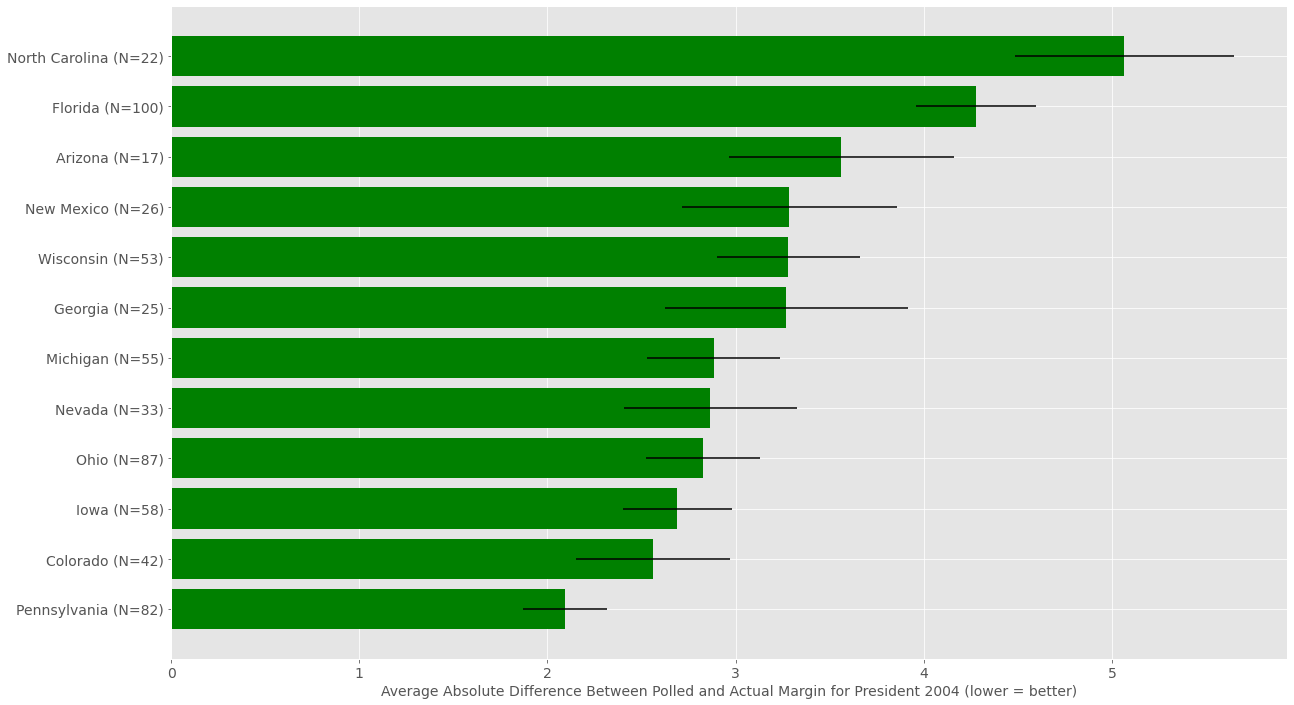

-
## Senate 2004 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0    Pennsylvania          -18.965116          -11.024343         -7.940773   
1       Wisconsin           14.333333           11.276615          3.056718   
2        Colorado            2.842105            4.839609         -1.997503   
3          Nevada           25.800000           26.551431         -0.751431   
4  South Carolina           -7.583333           -9.733709          2.150376   
5            Ohio          -27.843750          -27.711732         -0.132018   
6  North Carolina           -1.928571           -4.623489          2.694917   
7         Georgia          -15.461538          -18.167918          2.706379   
8         Florida           -0.042857           -1.126425          1.083568   

   polled_margin_count  
0                   43  
1                   15  
2                   38  
3                   15  
4                   12  
5                   32  
6             

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


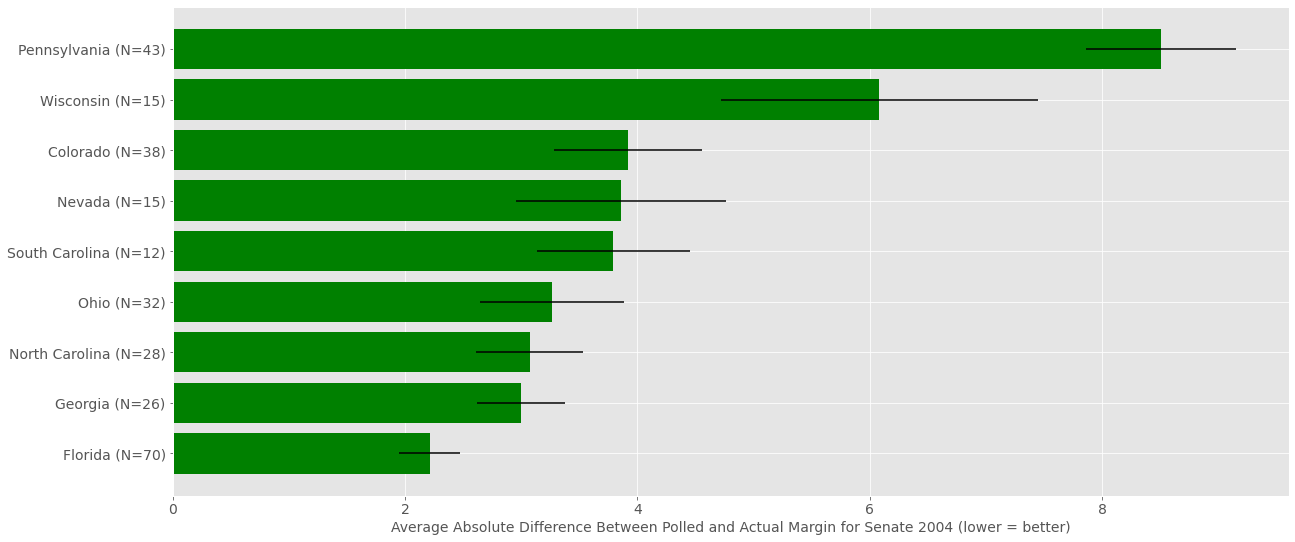

-
## Governor 2004 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  North Carolina           13.692308           12.810800          0.881507   

   polled_margin_count  
0                   13  
(1, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


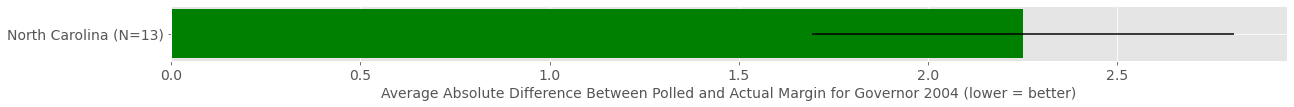

-
## President 2002 ##
-
## Senate 2002 ##
            state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Texas           -5.833333          -12.053133          6.219800   
1        Colorado           -1.705882           -5.014893          3.309010   
2  North Carolina           -5.733333           -8.660290          2.926956   

   polled_margin_count  
0                   24  
1                   17  
2                   15  
(3, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


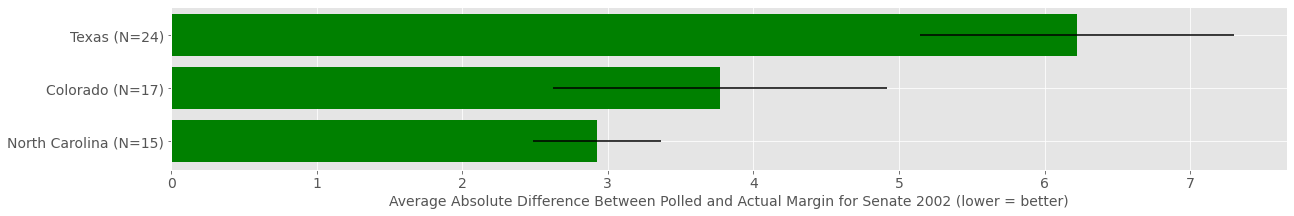

-
## Governor 2002 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  Pennsylvania           18.000000            9.121227          8.878773   
1      Michigan           11.000000            4.034291          6.965709   
2       Florida           -6.909091          -12.933577          6.024486   
3      Colorado          -34.571429          -29.490192         -5.081236   
4         Texas          -13.000000          -18.025204          5.025204   
5          Ohio          -16.116667          -19.829167          3.712500   

   polled_margin_count  
0                   12  
1                   16  
2                   22  
3                   14  
4                   22  
5                   12  
(6, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


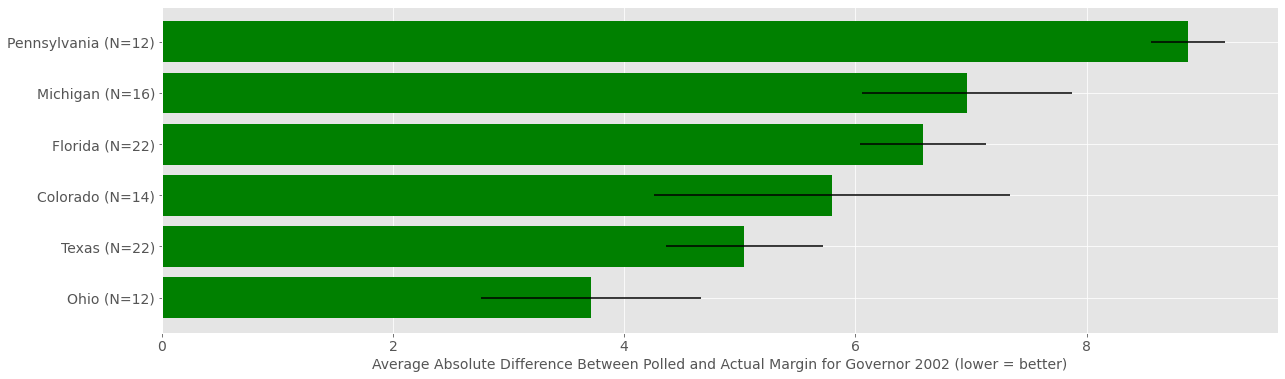

-
## President 2000 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0     Wisconsin            0.208333            0.225256         -0.016922   
1  Pennsylvania            0.950500            4.233820         -3.283320   
2      Michigan            1.840909            5.208062         -3.367153   
3       Florida            1.683333           -0.010118          1.693452   
4          Ohio           -6.850000           -3.574973         -3.275027   
5          Iowa            0.333333            0.325358          0.007976   

   polled_margin_count  
0                   24  
1                   40  
2                   44  
3                   30  
4                   24  
5                   12  
(6, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


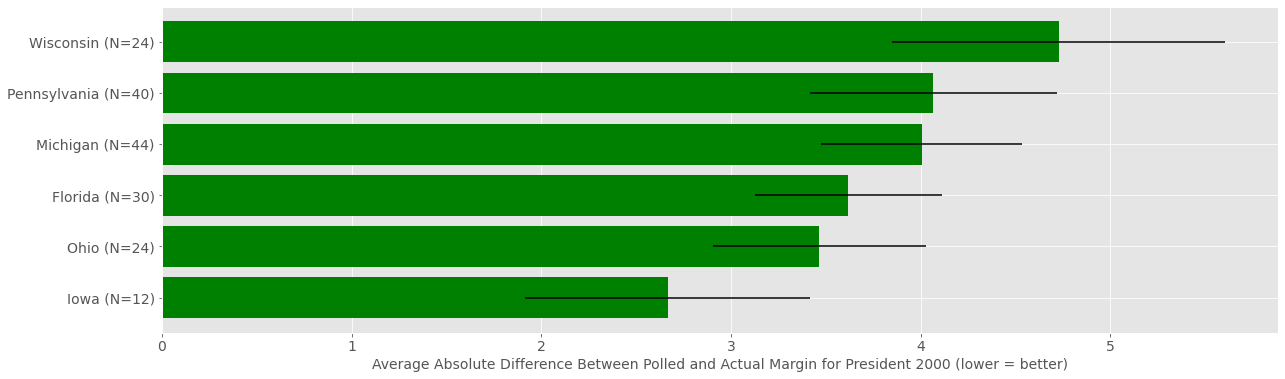

-
## Senate 2000 ##
          state  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  Pennsylvania          -16.964286           -6.978030         -9.986255   
1     Wisconsin           30.235294           24.666076          5.569218   
2      Michigan           -2.428571            1.632083         -4.060655   
3          Ohio          -25.075000          -24.560682         -0.514318   
4       Florida            4.666667            4.915796         -0.249130   

   polled_margin_count  
0                   28  
1                   17  
2                   28  
3                   24  
4                   21  
(5, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


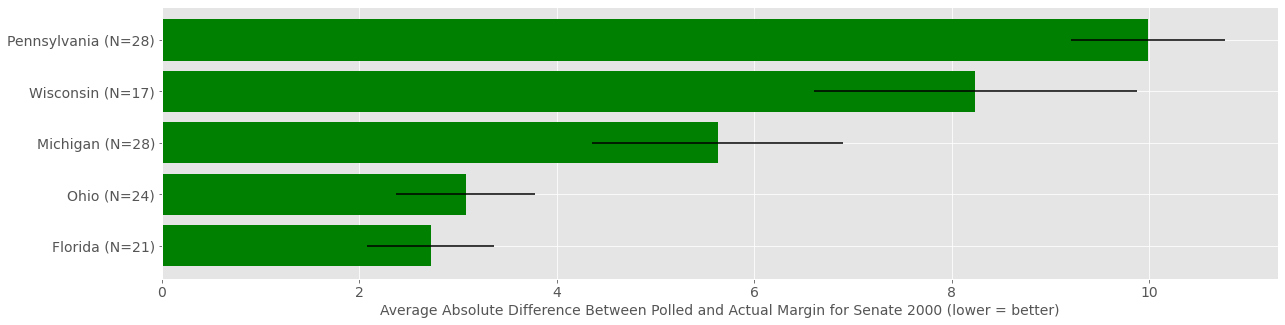

-
## Governor 2000 ##
-


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


In [799]:
for y in [2020, 2018, 2016, 2014, 2012, 2010, 2008, 2006, 2004, 2002, 2000]:
    for p in ['president', 'senate', 'governor']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls, grouper='state', election=p, year=y)
        print('-')

## 538 Grade

## President 2020 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               A            3.828947           -1.339659          5.168606   
1               B            3.437692           -0.870633          4.308325   
2               C            3.248244           -0.815010          4.063255   
3             D/F            2.193548           -0.953414          3.146962   

   polled_margin_count  
0                   76  
1                  130  
2                  131  
3                  124  
(4, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


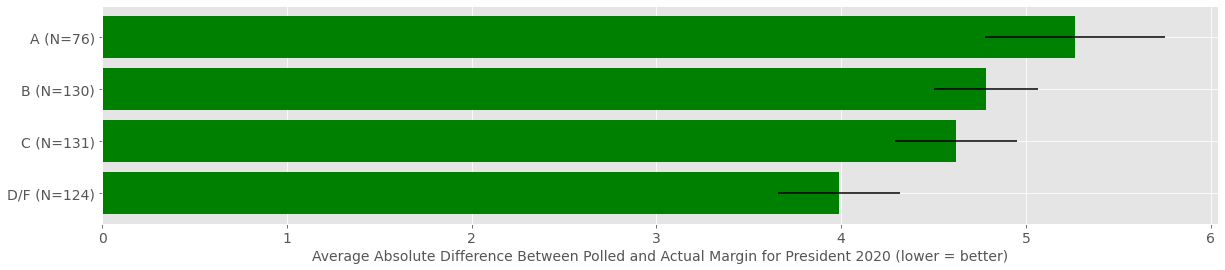

-
## Senate 2020 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             D/F            4.254286           -2.651643          6.905929   
1               A            2.456154           -3.508353          5.964506   
2               C            3.795238           -1.175900          4.971138   
3               B            2.664815           -2.209929          4.874744   

   polled_margin_count  
0                   35  
1                   52  
2                   63  
3                   54  
(4, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


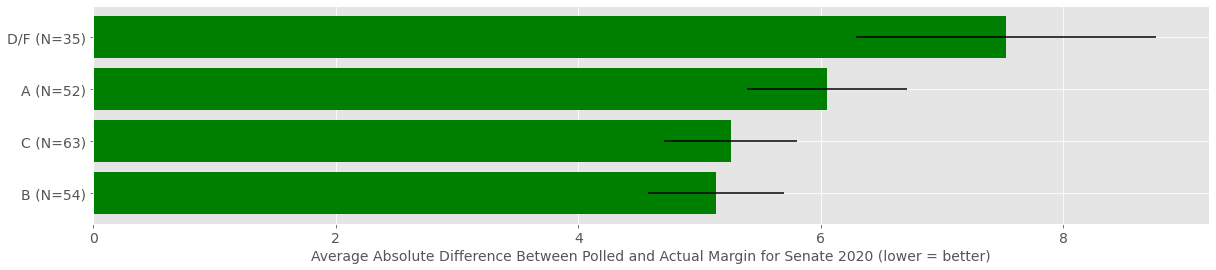

-
## Governor 2020 ##
-
## Gcb 2020 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               C            6.884762            3.100000          3.784762   

   polled_margin_count  
0                   42  

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])



(1, 5)


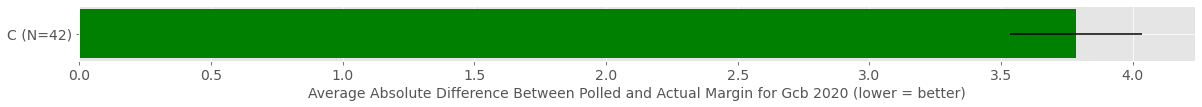

-
## President 2018 ##
-
## Senate 2018 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               C            1.159649            2.111728         -0.952079   
1               B            4.904000            3.872401          1.031599   
2               A            2.467714            2.339739          0.127975   
3             D/F            2.258065            3.726216         -1.468151   

   polled_margin_count  
0                  114  
1                   45  
2                   35  
3                   31  
(4, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


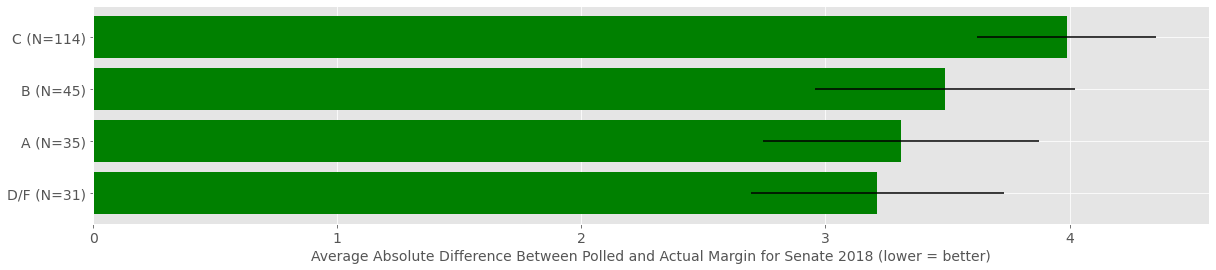

-
## Governor 2018 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             D/F            1.976923            3.000769         -1.023846   
1               C            0.058163           -0.773061          0.831224   
2               B            0.162963            0.435556         -0.272593   
3               A            0.949000           -0.790500          1.739500   

   polled_margin_count  
0                   13  
1                   49  
2                   27  
3                   20  
(4, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


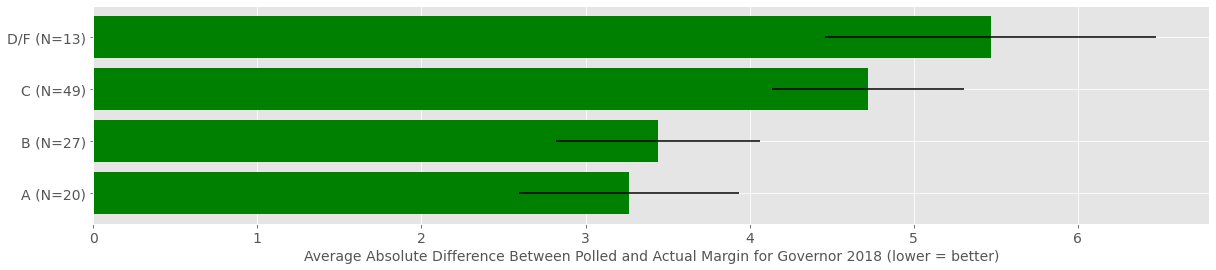

-
## Gcb 2018 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               C            8.000000            8.600000         -0.600000   
1               B            6.803226            8.600000         -1.796774   

   polled_margin_count  
0                   31  
1                   31  
(2, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


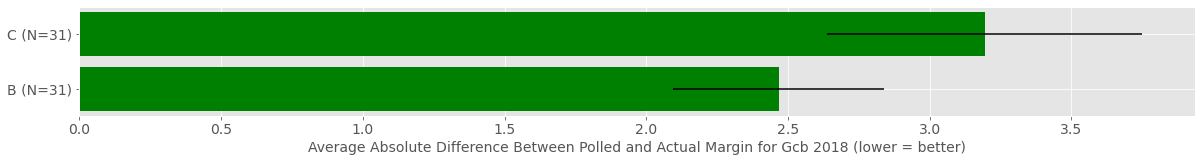

-
## President 2016 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0               C            1.537632           -1.878816          3.416447   
1             D/F            0.331447           -2.606447          2.937895   
2               B            1.101923           -2.432500          3.534423   
3               A           -0.086486           -2.832162          2.745676   

   polled_margin_count  
0                   76  
1                   76  
2                   52  
3                   37  
(4, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


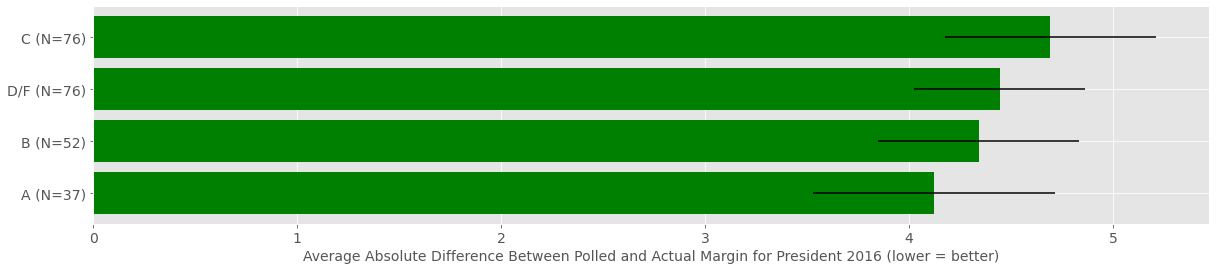

-
## Senate 2016 ##
  538grade_simple  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             D/F           -5.066667           -8.827333          3.760667   
1               C           -1.243137           -4.972157          3.729020   
2               B           -3.700000           -7.699524          3.999524   
3               A           -5.370000           -6.919667          1.549667   

   polled_margin_count  
0                   30  
1                   51  
2                   42  
3                   30  
(4, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


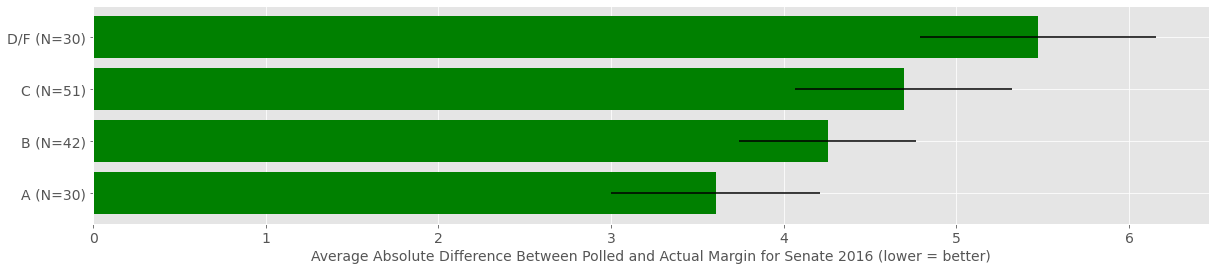

-
## Governor 2016 ##
-
## Gcb 2016 ##
-


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


In [800]:
for y in [2020, 2018, 2016]:
    for p in ['president', 'senate', 'governor', 'GCB']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls[polls['538grade_simple'] != 'Unknown'], grouper='538grade_simple', election=p, year=y)
        print('-')

## President 2020 ##
             state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0             Ohio               B            2.500000           -8.031962   
1             Iowa               A            1.362500           -8.152965   
2        Wisconsin               A           10.060000            0.627100   
3             Iowa               C           -0.250000           -8.152965   
4             Iowa               B           -0.457143           -8.152965   
5             Iowa             D/F           -0.800000           -8.152965   
6          Florida               A            3.666667           -3.358369   
7        Wisconsin               B            7.384615            0.627100   
8        Wisconsin             D/F            7.009091            0.627100   
9        Wisconsin               C            6.850000            0.627100   
10        Michigan               C            7.783333            2.783528   
11        Michigan               A         

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


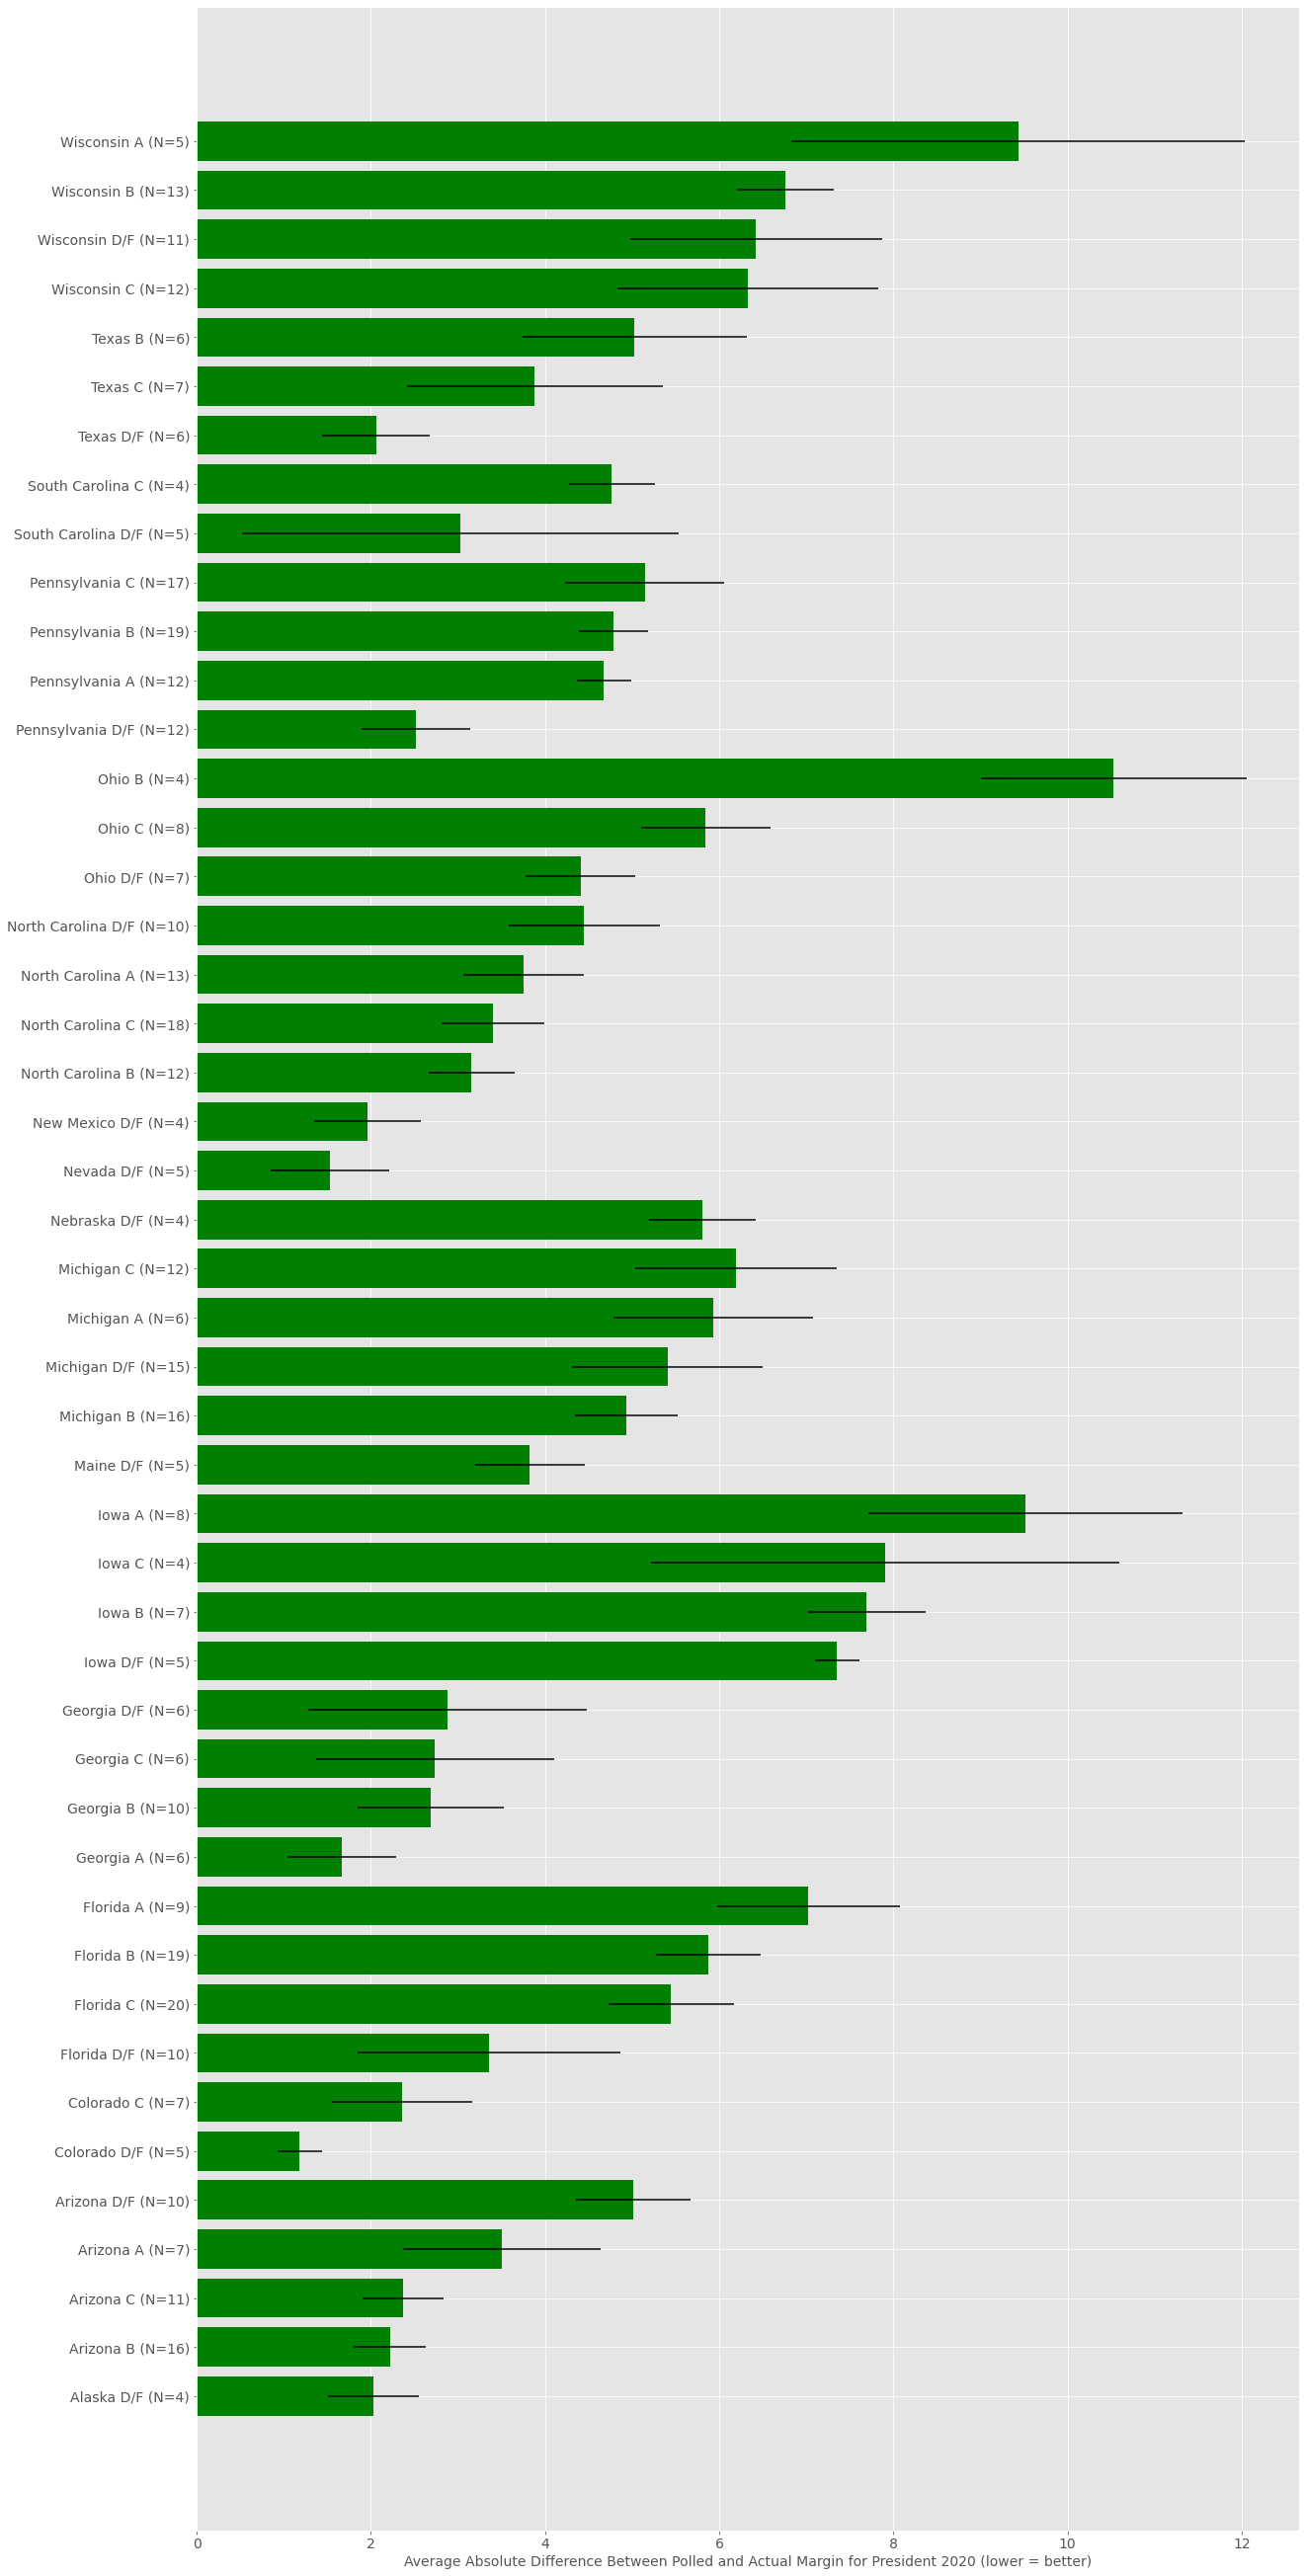

-
## Senate 2020 ##
             state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0            Maine             D/F            6.000000           -8.501941   
1            Maine               A            1.560000           -8.501941   
2             Iowa               A            1.252500           -6.478210   
3             Iowa               B            1.157143           -6.478210   
4   South Carolina               C           -2.860000          -10.270311   
5         Michigan               C            8.912500            1.685031   
6   North Carolina               A            4.027273           -1.746737   
7   North Carolina               C            3.933750           -1.746737   
8          Arizona               B            7.662500            2.348697   
9         Michigan             D/F            5.711111            1.685031   
10         Arizona             D/F            7.700000            2.348697   
11         Georgia               C          

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


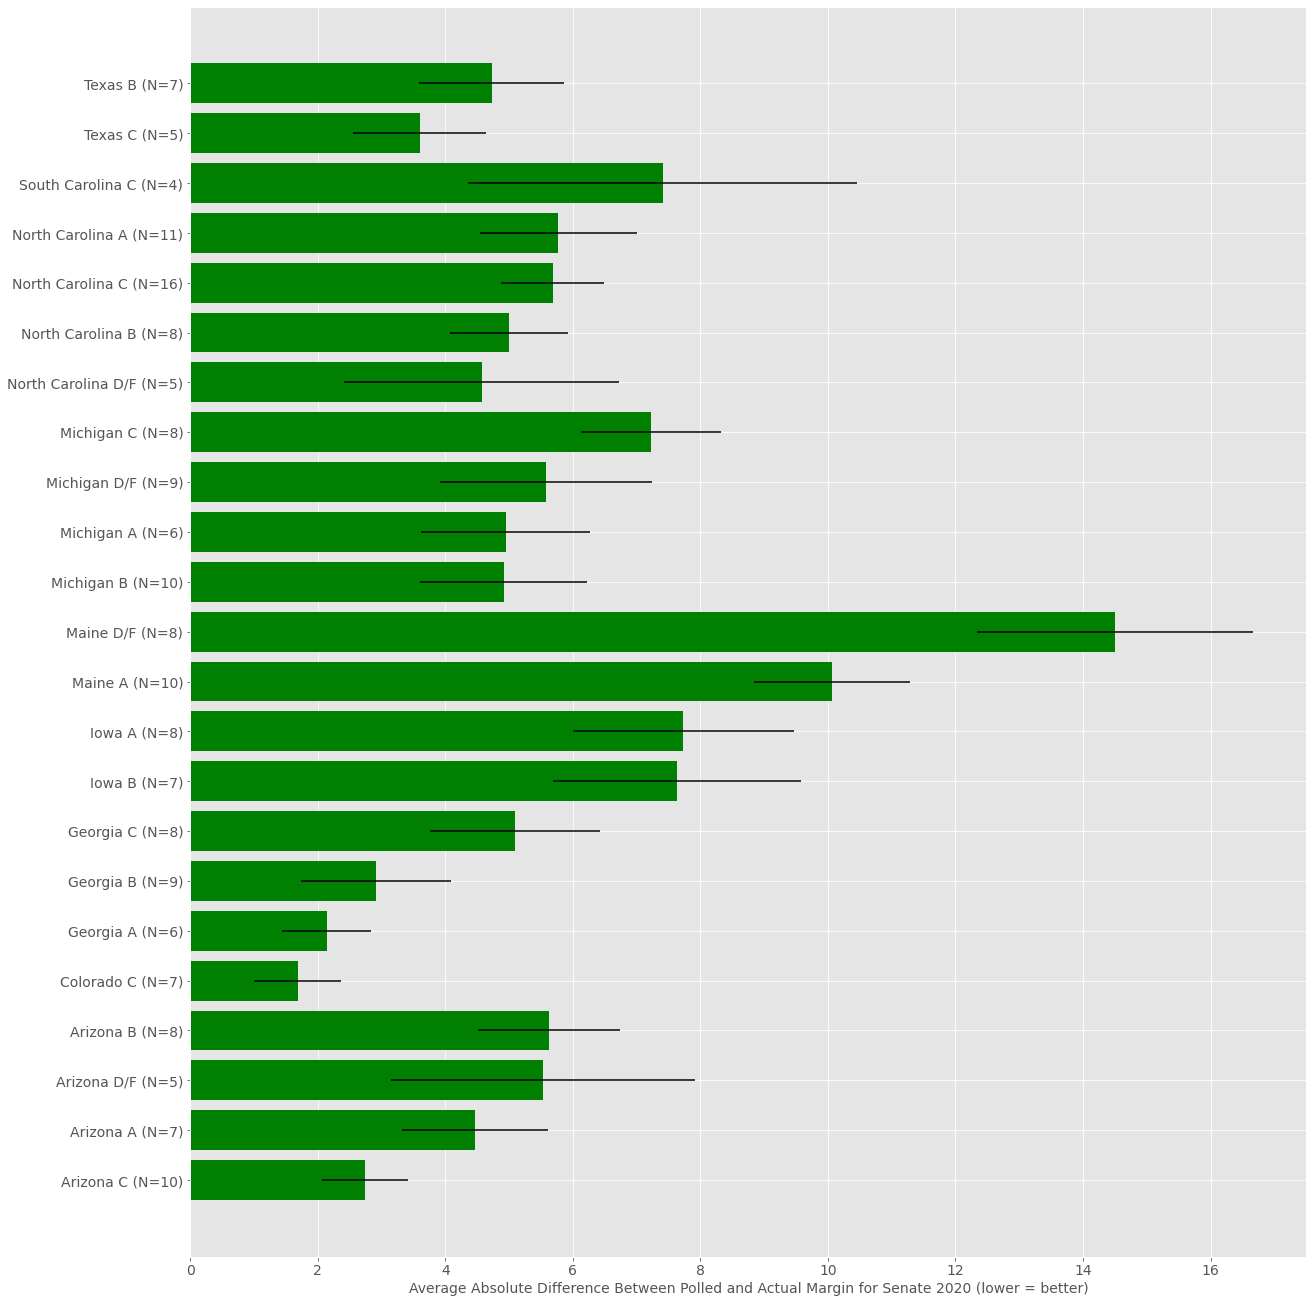

-
## Governor 2020 ##
-
## President 2018 ##
-
## Senate 2018 ##
        state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0        Ohio               C           14.250000            6.842886   
1    Michigan               C           12.540000            6.502801   
2     Arizona               C           -1.787500            2.346560   
3      Nevada               A            0.062500            5.027744   
4     Florida               A            4.466000           -0.121251   
5       Texas             D/F           -4.450000           -2.563623   
6      Nevada               C            1.276471            5.027877   
7       Texas               C           -6.133333           -2.564831   
8     Florida               B            3.276923           -0.121155   
9     Arizona               B            3.698000            2.346697   
10   Michigan               B            9.250000            6.501401   
11      Texas               B           -5.300000          

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


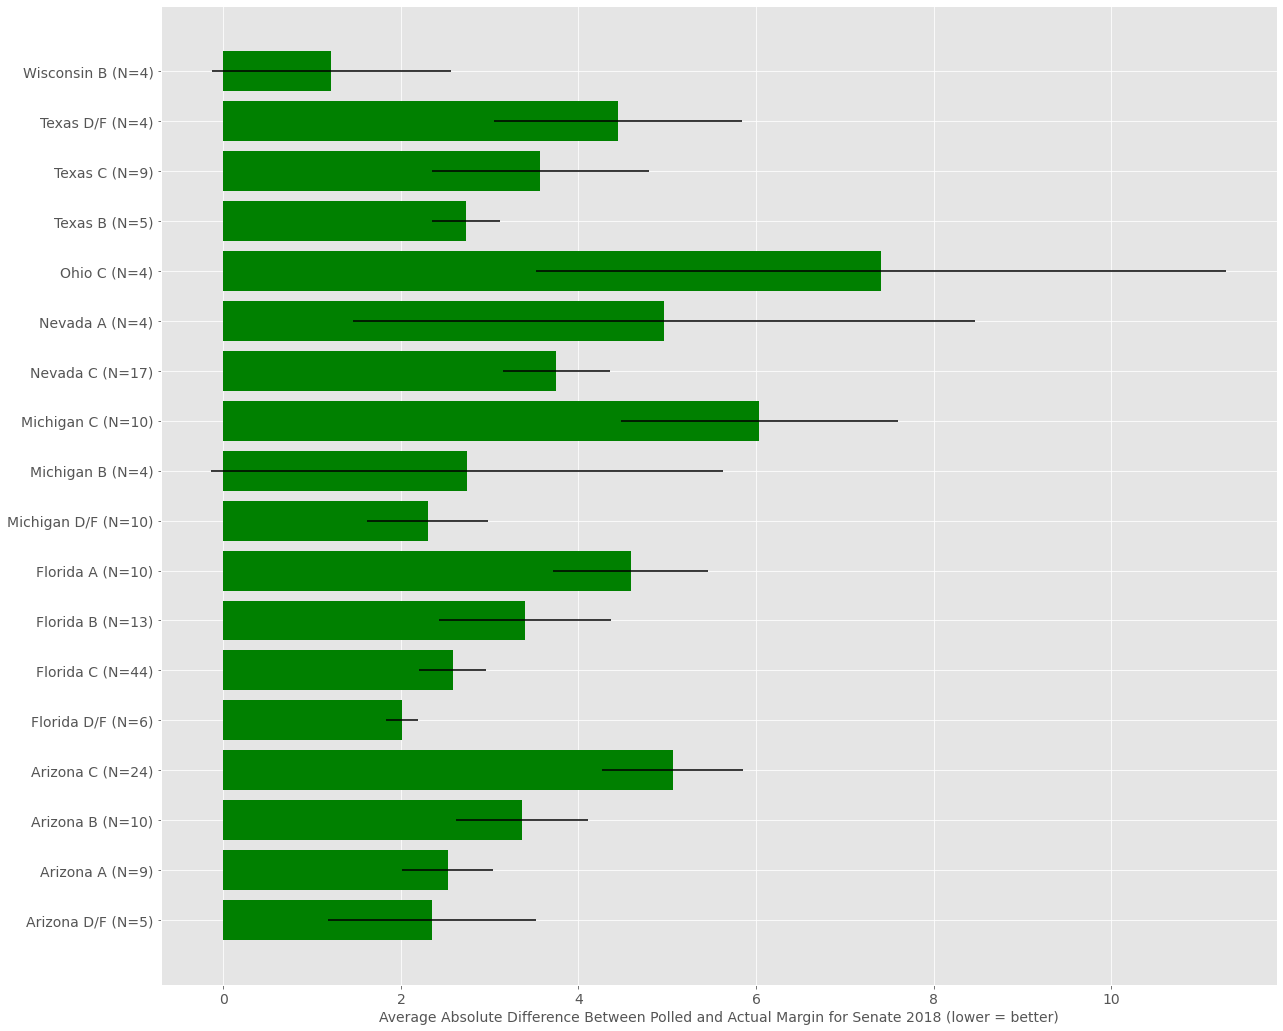

-
## Governor 2018 ##
      state 538grade_simple  polled_margin_mean  actual_margin_mean  \
0   Florida               A            4.336000           -0.400000   
1   Arizona               C          -15.237500          -14.160000   
2   Florida               B            3.771429           -0.400000   
3   Florida               C            2.916667           -0.400000   
4    Nevada               C            0.380000            4.080000   
5  Michigan               C           10.250000            9.560000   
6  Michigan             D/F            8.700000            9.560000   

   margin_diff_mean  polled_margin_count  
0          4.736000                    5  
1         -1.077500                    8  
2          4.171429                    7  
3          3.316667                   18  
4         -3.700000                    5  
5          0.690000                    4  
6         -0.860000                    4  
(7, 6)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


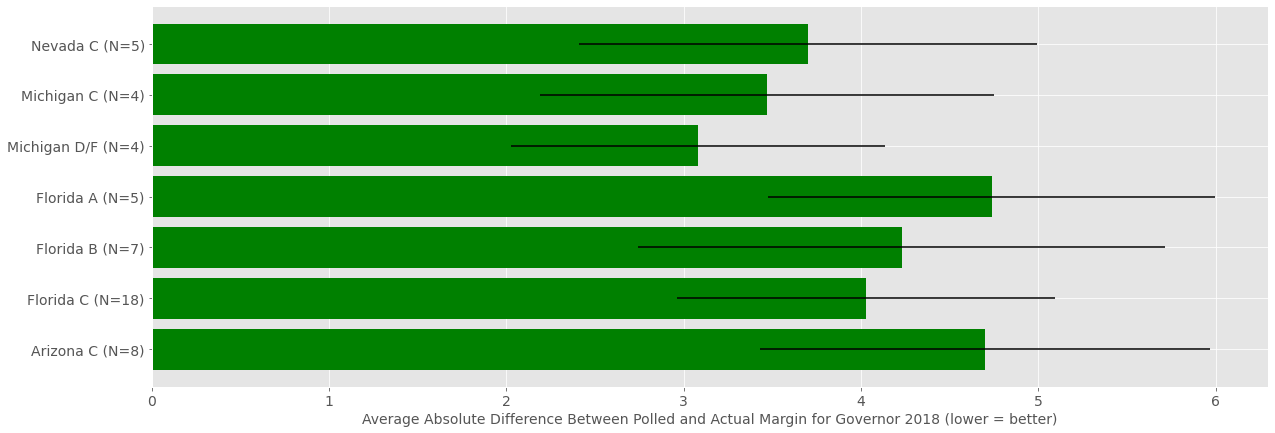

-


In [801]:
for y in [2020, 2018]:
    for p in ['president', 'senate', 'governor']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls[polls['538grade_simple'] != 'Unknown'],
                   grouper=['state', '538grade_simple'], election=p, year=y, count_filter=3)
        print('-')

## Methodology

## President 2020 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0       Live Phone            4.349038           -1.060069          5.409108   
1       IVR/Online            2.442286           -1.691710          4.133996   
2           Online            3.708407           -0.615620          4.324027   
3      Online/Text            3.028571           -1.120574          4.149146   
4  IVR/Online/Text            1.040000           -0.744823          1.784823   

   polled_margin_count  
0                  104  
1                   35  
2                  226  
3                   35  
4                   40  
(5, 5)


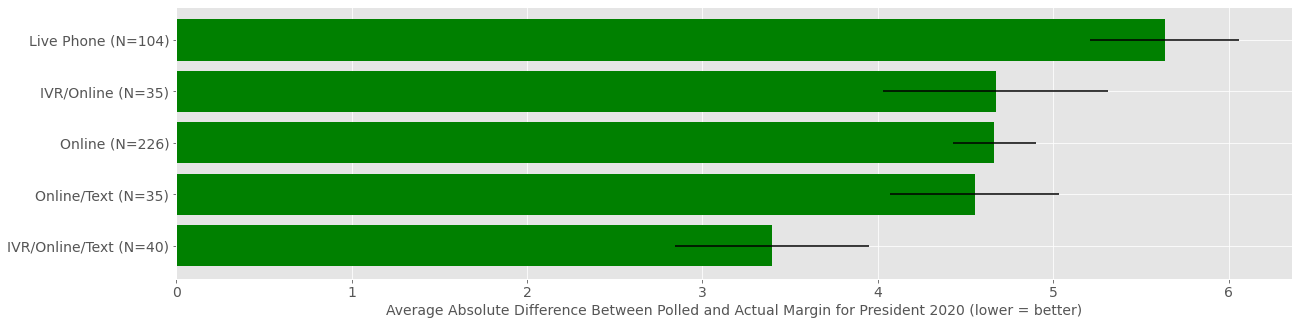

-
## Senate 2020 ##
       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0       IVR/Online            2.293462           -4.315579          6.609041   
1           Online            4.198611           -1.860408          6.059019   
2      Online/Text            4.100000           -2.055014          6.155014   
3       Live Phone            3.377358           -1.945195          5.322554   
4  IVR/Online/Text            2.101111           -2.317849          4.418960   

   polled_margin_count  
0                   26  
1                   72  
2                   20  
3                   53  
4                   18  

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])



(5, 5)


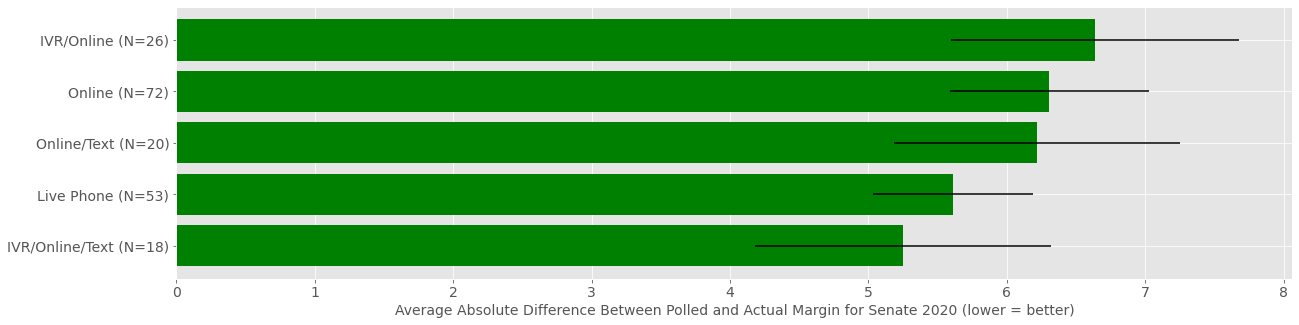

-
## Governor 2020 ##
-
## Gcb 2020 ##
  methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0      Online            7.236296            3.100000          4.136296   

   polled_margin_count  
0                   54  
(1, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


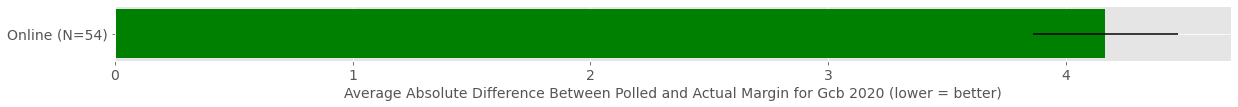

-
## President 2018 ##
-
## Senate 2018 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Online            2.706250            2.953171         -0.246921   
1       IVR/Online           -0.442105            1.972355         -2.414460   
2       Live Phone            2.961795            2.126785          0.835010   
3              IVR            1.000000            2.799231         -1.799231   
4             Live            3.870769            2.685000          1.185769   
5  Automated Phone            1.080000            2.154242         -1.074242   

   polled_margin_count  
0                   48  
1                   38  
2                   39  
3                   13  
4                   26  
5                   15  
(6, 5)


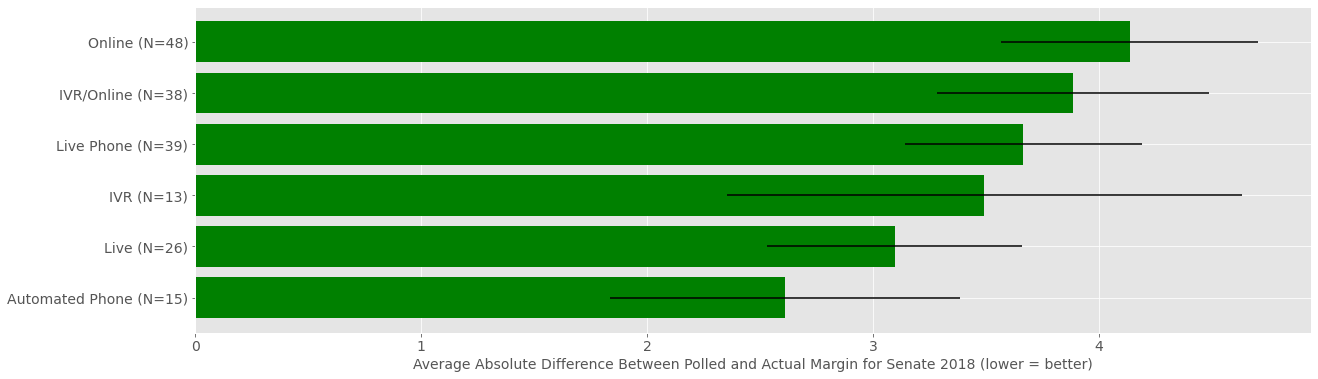

-
## Governor 2018 ##
       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0              IVR           -1.336364            0.267273         -1.603636   
1           Online           -0.995000           -0.528000         -0.467000   
2             Live            0.695385           -1.030385          1.725769   
3  IVR/Online/Text            1.145455            0.105455          1.040000   

   polled_margin_count  
0                   11  
1                   30  
2                   26  
3                   11  

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])



(4, 5)


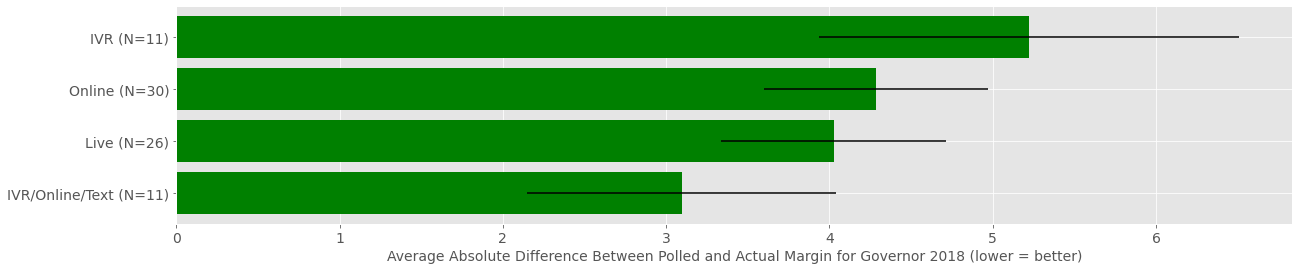

-
## Gcb 2018 ##
  methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0      Online            7.275926            8.600000         -1.324074   
1  Live Phone            9.430769            8.600000          0.830769   

   polled_margin_count  
0                   54  
1                   13  
(2, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


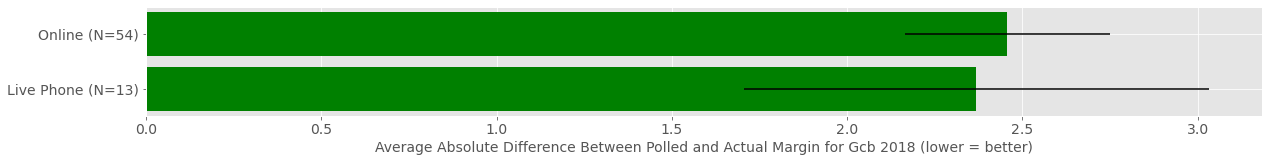

-
## President 2016 ##
       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             Live            0.926042           -2.583958          3.510000   
1           Online            0.404717           -3.934717          4.339434   
2       IVR/Online            1.442857           -2.350000          3.792857   
3         IVR/Live            0.968684           -1.337368          2.306053   
4  IVR/Online/Text           -0.075000           -2.354375          2.279375   
5  IVR/Online/Live            0.300000           -2.498800          2.798800   
6              IVR           -1.432857            0.815714         -2.248571   

   polled_margin_count  
0                   48  
1                   53  
2                   28  
3                   38  
4                   16  
5                   25  
6                   14  
(7, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


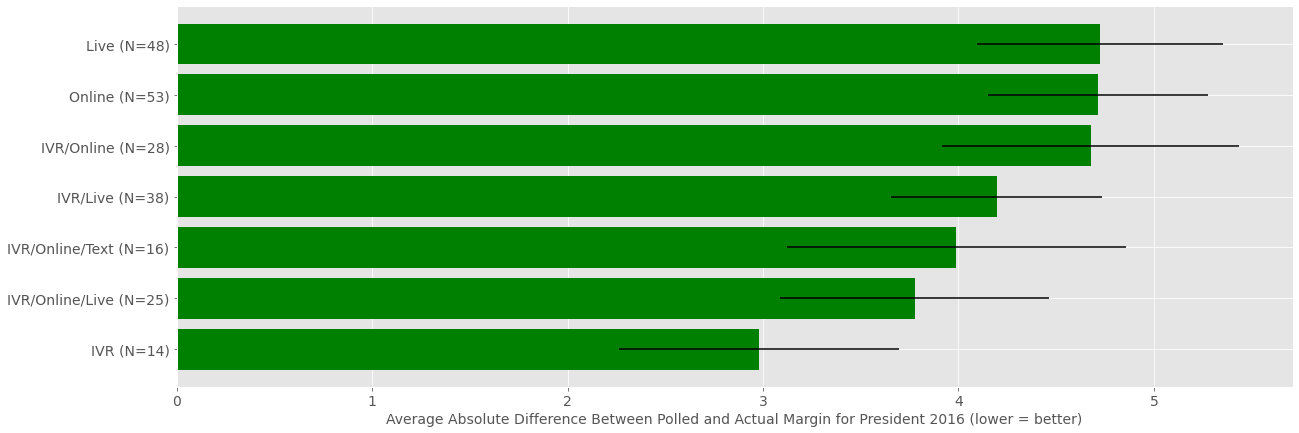

-
## Senate 2016 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Online           -4.092857           -8.228571          4.135714   
1  IVR/Online/Live            1.615385           -2.862308          4.477692   
2       IVR/Online           -3.812000           -7.337200          3.525200   
3  IVR/Online/Text           -4.675000           -6.755833          2.080833   
4             Live           -5.260000           -7.432500          2.172500   

   polled_margin_count  
0                   42  
1                   13  
2                   25  
3                   12  
4                   40  
(5, 5)


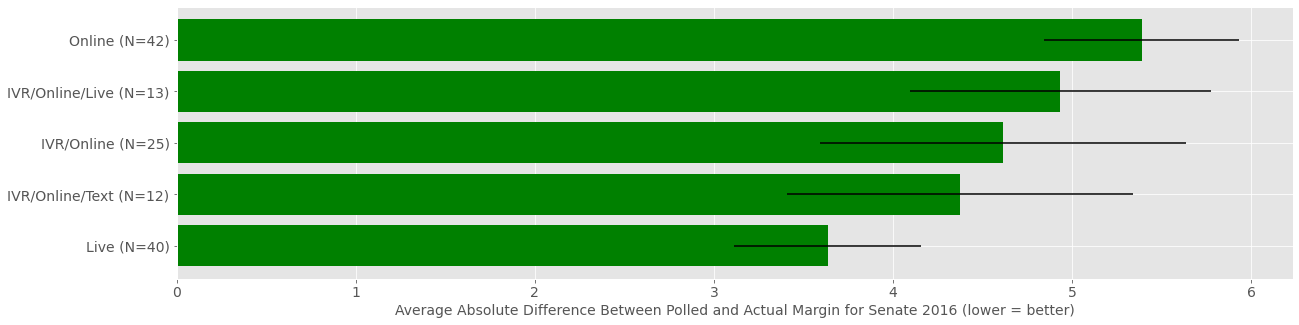

-
## Governor 2016 ##
-
## Gcb 2016 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


-
## President 2014 ##
-
## Senate 2014 ##
       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0       IVR/Online           -2.438462           -4.673077          2.234615   
1           Online           -8.845000          -12.460500          3.615500   
2             Live           -1.290909           -4.533636          3.242727   
3         IVR/Text            1.375000           -2.230625          3.605625   
4  IVR/Online/Live           -4.272727           -5.957273          1.684545   

   polled_margin_count  
0                   13  
1                   20  
2                   33  
3                   16  
4                   11  
(5, 5)


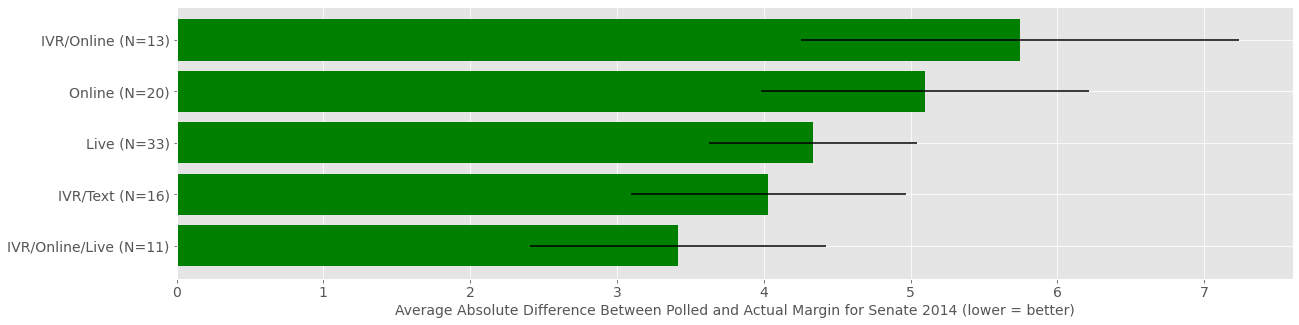

-
## Governor 2014 ##
  methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0      Online           -6.720000          -10.486000          3.766000   
1    IVR/Text           -1.818182           -4.356364          2.538182   
2  IVR/Online           -3.083333           -6.155833          3.072500   
3        Live           -6.741935           -7.940968          1.199032   

   polled_margin_count  
0                   25  
1                   11  
2                   12  
3                   31  
(4, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


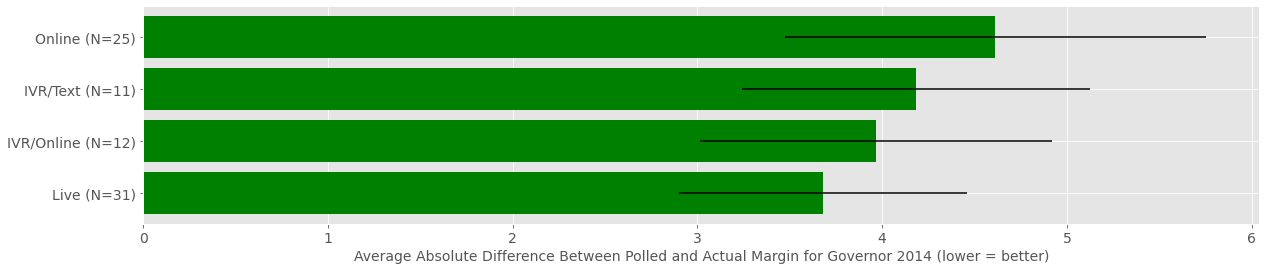

-
## Gcb 2014 ##
-
## President 2012 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0              IVR           -2.052500            4.473333         -6.525833   
1       IVR/Online           -0.168966            3.994483         -4.163448   
2  Automated Phone            1.180180            4.044094         -2.863914   
3            Phone            2.138614            3.652734         -1.514120   
4             Live            2.270845            3.278169         -1.007324   
5  IVR/Online/Live           -0.916667            1.275833         -2.192500   
6           Online            1.113889            2.470000         -1.356111   
7            Mixed            0.937500            2.930973         -1.993473   
8         IVR/Text            3.276667            4.459667         -1.183000   
9         Internet            1.106383            1.960906         -0.854523   

   polled_margin_count  
0                   24  
1                   29  
2                  111  
3                  

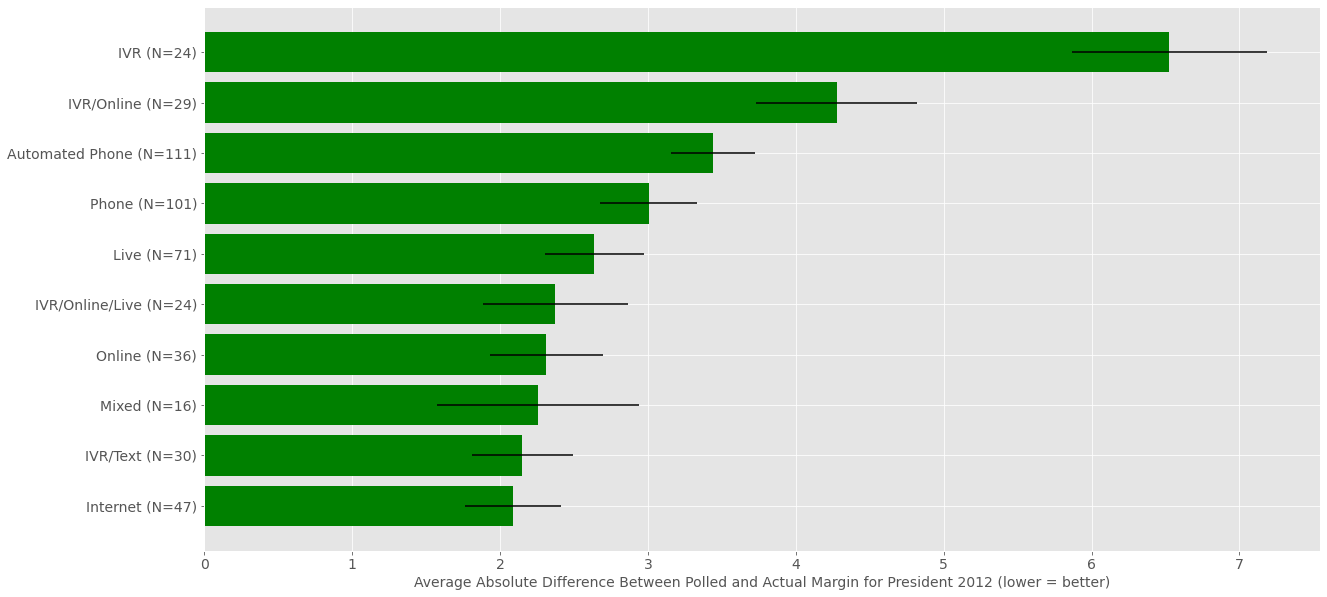

-
## Senate 2012 ##
       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0              IVR           -1.740833            3.795833         -5.536667   
1       IVR/Online            1.000000            6.614667         -5.614667   
2  Automated Phone            3.578947            8.335962         -4.757014   
3  IVR/Online/Live            1.545455            6.218182         -4.672727   
4            Phone            4.000000            5.267054         -1.267054   
5             Live            4.650909            5.389697         -0.738788   
6         IVR/Text            5.230769            7.143077         -1.912308   
7           Online            5.240741            7.528889         -2.288148   
8         Internet            4.187500            6.856033         -2.668533   

   polled_margin_count  
0                   12  
1                   15  
2                   57  
3                   11  
4                   61  
5                   33  
6   

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


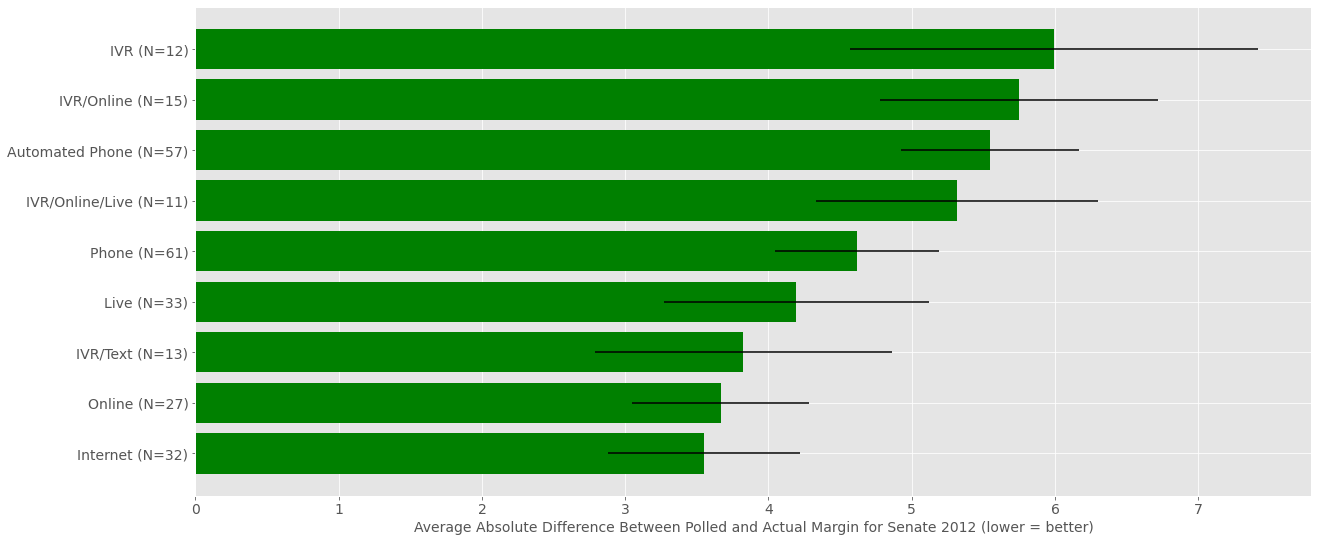

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


-
## Governor 2012 ##
-
## Gcb 2012 ##
-
## President 2010 ##
-
## Senate 2010 ##
  methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0         IVR           -6.266667            0.472000         -6.738667   
1  IVR/Online           -8.933333           -3.974667         -4.958667   
2        Live           -9.185185           -6.488519         -2.696667   

   polled_margin_count  
0                   15  
1                   15  
2                   27  
(3, 5)


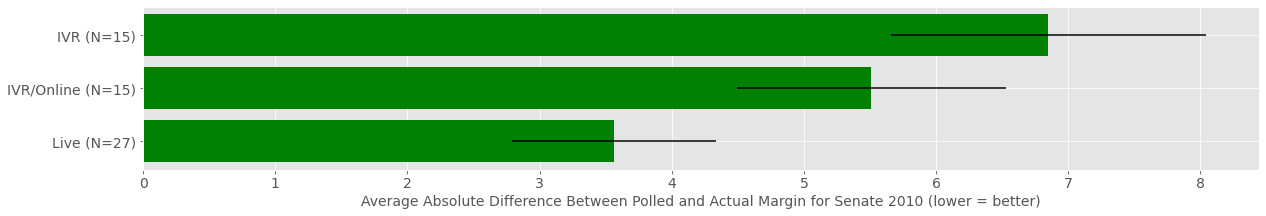

-
## Governor 2010 ##
  methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  IVR/Online           -8.260870           -4.976957         -3.283913   
1    IVR/Text           -4.454545           -5.018182          0.563636   
2         IVR           -7.062500           -4.379375         -2.683125   
3        Live           -6.447368           -6.042895         -0.404474   
4      Online           -2.733333           -2.012000         -0.721333   

   polled_margin_count  
0                   23  
1                   11  
2                   16  
3                   38  
4                   15  
(5, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


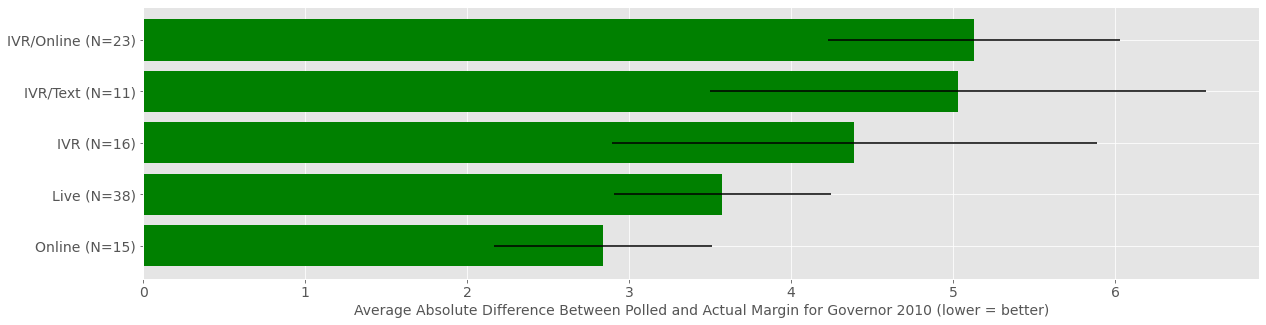

-
## Gcb 2010 ##
-
## President 2008 ##
       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0       IVR/Online            1.860465            3.825116         -1.964651   
1           Online            3.055556            4.702000         -1.646444   
2            Live*            4.105263            4.027632          0.077632   
3             Live            4.853425            4.414658          0.438767   
4         IVR/Text            5.461538            5.683077         -0.221538   
5  IVR/Online/Live            6.000000            7.204444         -1.204444   

   polled_margin_count  
0                   43  
1                   45  
2                   38  
3                   73  
4                   13  
5                   18  
(6, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


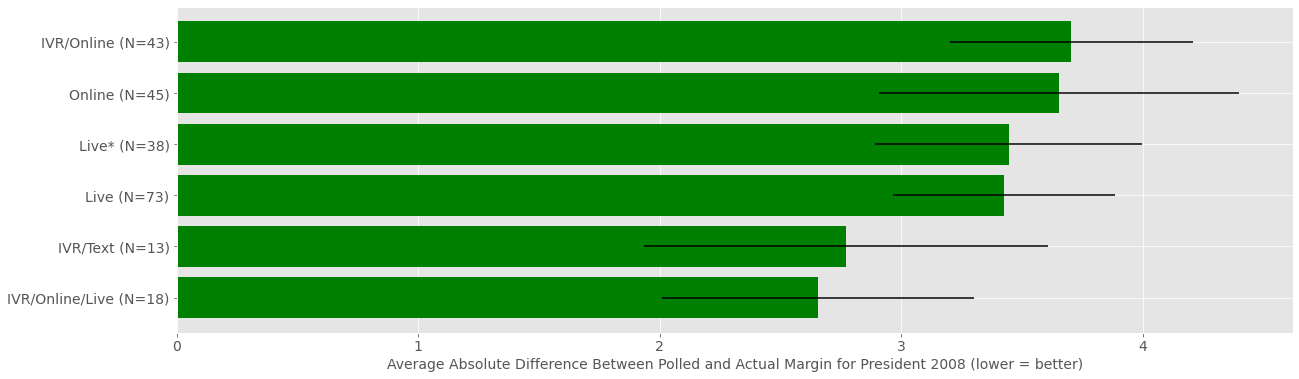

-
## Senate 2008 ##
  methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0       Live*            2.125000           -0.560625          2.685625   
1  IVR/Online           -0.400000           -1.728667          1.328667   
2        Live            7.157895           10.200526         -3.042632   
3      Online            1.692308            2.212308         -0.520000   

   polled_margin_count  
0                   16  
1                   15  
2                   19  
3                   13  
(4, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


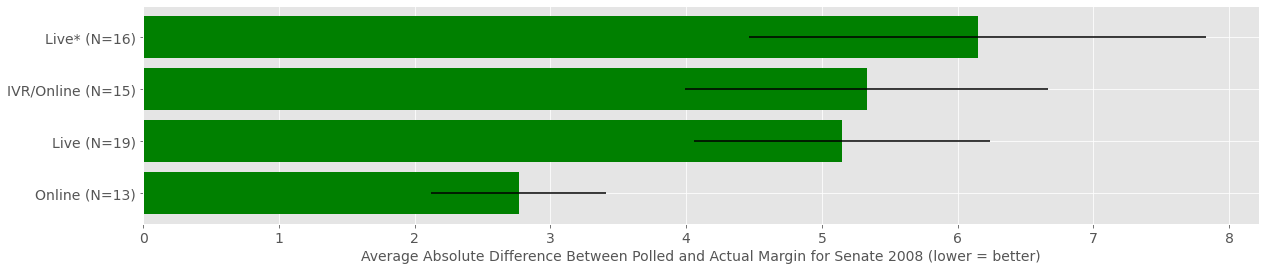

-
## Governor 2008 ##
-
## Gcb 2008 ##
-
## President 2006 ##
-
## Senate 2006 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


  methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0      Online            4.019048            8.503333         -4.484286   
1       Live*            9.406250           13.843125         -4.436875   
2        Live           12.400000           13.699000         -1.299000   

   polled_margin_count  
0                   21  
1                   16  
2                   20  
(3, 5)


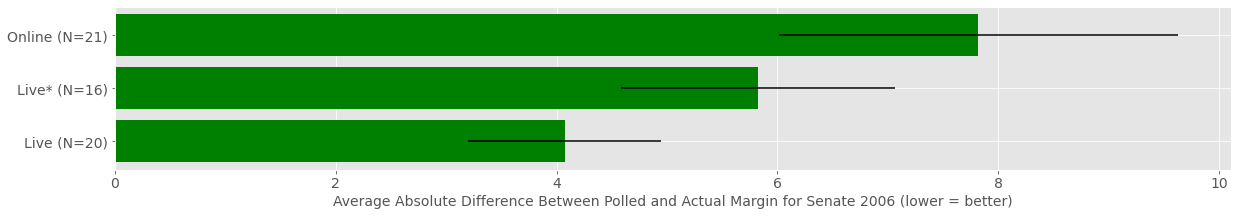

-
## Governor 2006 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


  methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0      Online            3.718182            7.288182         -3.570000   
1       Live*            4.541667            5.879167         -1.337500   
2  IVR/Online            1.000000            3.076000         -2.076000   
3        Live            8.792308            9.425385         -0.633077   

   polled_margin_count  
0                   22  
1                   24  
2                   15  
3                   26  
(4, 5)


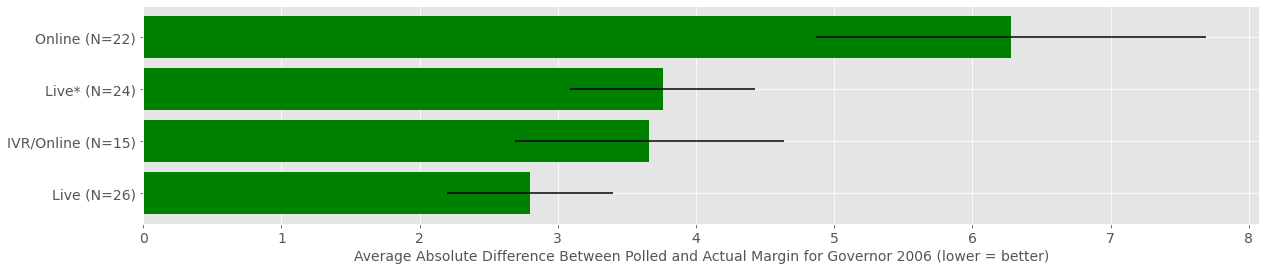

-
## Gcb 2006 ##
-
## President 2004 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Online            0.720000           -1.536500          2.256500   
1  IVR/Online/Live           -3.187500           -4.426563          1.239062   
2             Live           -2.115385           -2.510769          0.395385   
3            Live*           -2.955556           -3.190000          0.234444   
4       IVR/Online           -1.250000           -2.104375          0.854375   

   polled_margin_count  
0                   40  
1                   32  
2                   65  
3                   45  
4                   16  
(5, 5)


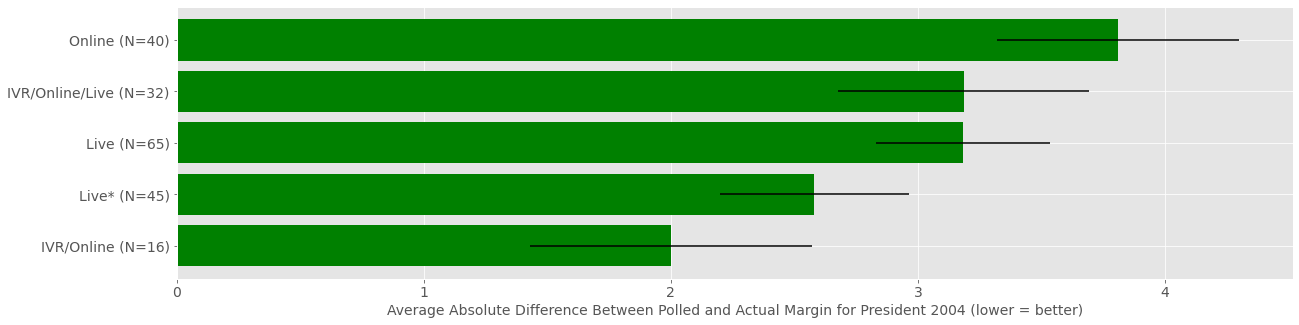

-
## Senate 2004 ##
       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0           Online           -6.750000           -7.211250          0.461250   
1            Live*          -10.173913           -9.479565         -0.694348   
2             Live           -3.416667           -2.602667         -0.814000   
3  IVR/Online/Live          -10.666667           -9.918333         -0.748333   

   polled_margin_count  
0                   16  
1                   23  
2                   30  
3                   18  
(4, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


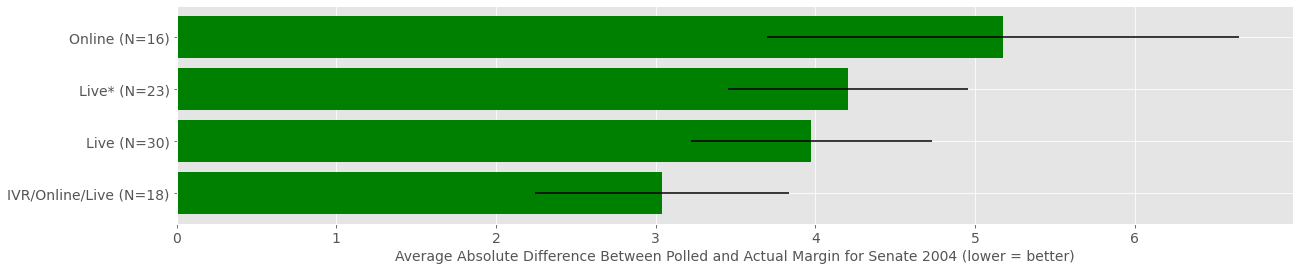

-
## Governor 2004 ##
-
## Gcb 2004 ##
-
## President 2002 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


-
## Senate 2002 ##
       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0             Live           -5.764706           -6.215882          0.451176   
1  IVR/Online/Live           -1.250000           -6.066667          4.816667   

   polled_margin_count  
0                   17  
1                   12  
(2, 5)


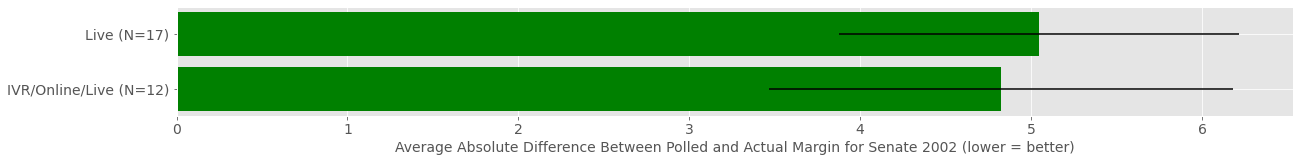

-

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])



## Governor 2002 ##
       methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  IVR/Online/Live            0.894737           -5.994211          6.888947   
1            Live*           -2.916667           -7.702500          4.785833   
2             Live           -8.423333          -10.677000          2.253667   

   polled_margin_count  
0                   19  
1                   12  
2                   30  
(3, 5)


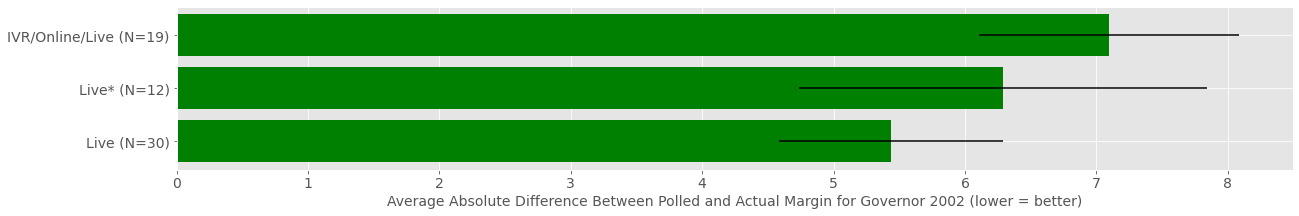

-
## Gcb 2002 ##
-
## President 2000 ##
  methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  IVR/Online           -4.823529           -0.006471         -4.817059   
1      Online           -0.789474           -2.186316          1.396842   
2        Live           -2.987805           -1.051707         -1.936098   
3       Live*           -5.571429           -3.258571         -2.312857   

   polled_margin_count  
0                   17  
1                   38  
2                   41  
3                   14  
(4, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


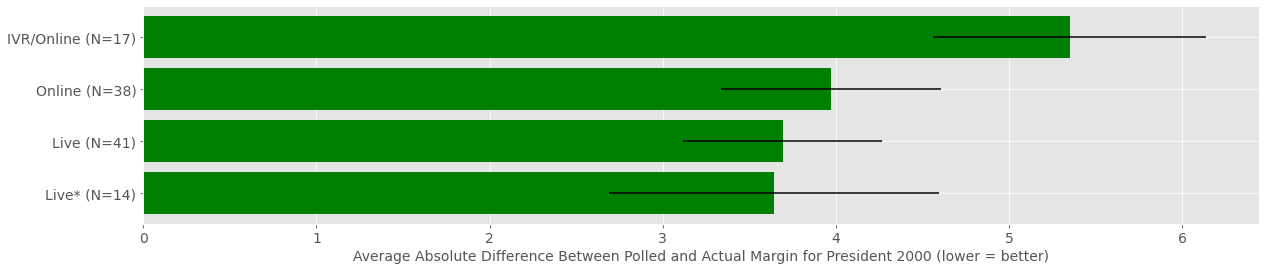

-
## Senate 2000 ##
  methodology  polled_margin_mean  actual_margin_mean  margin_diff_mean  \
0  IVR/Online           -9.857143           -3.256429         -6.600714   
1      Online           -2.875000           -1.816562         -1.058438   
2        Live           -3.405882           -2.497059         -0.908824   

   polled_margin_count  
0                   14  
1                   32  
2                   17  
(3, 5)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


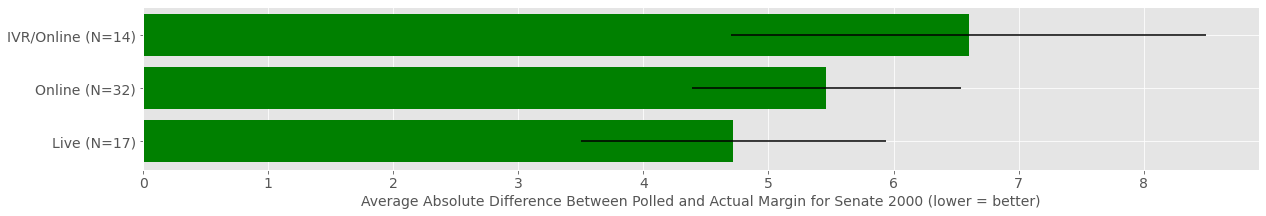

-
## Governor 2000 ##
-
## Gcb 2000 ##
-


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


In [802]:
for y in [2020, 2018, 2016, 2014, 2012, 2010, 2008, 2006, 2004, 2002, 2000]:
    for p in ['president', 'senate', 'governor', 'GCB']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls[polls['methodology'] != 'Unknown'], grouper='methodology', election=p, year=y)
        print('-')

## President 2020 ##
             state      methodology  polled_margin_mean  actual_margin_mean  \
0             Iowa       Live Phone            1.888889           -8.152965   
1             Ohio       Live Phone            1.750000           -8.031962   
2             Iowa           Online           -0.333333           -8.152965   
3        Wisconsin           Online            8.308000            0.627100   
4        Wisconsin      Online/Text            8.000000            0.627100   
5          Florida       Live Phone            3.500000           -3.358369   
6          Florida      Online/Text            3.250000           -3.358369   
7        Wisconsin       Live Phone            7.000000            0.627100   
8             Ohio       IVR/Online           -1.552500           -8.031962   
9         Michigan       Live Phone            7.790909            2.783528   
10         Florida           Online            2.557692           -3.358369   
11        Michigan           On

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


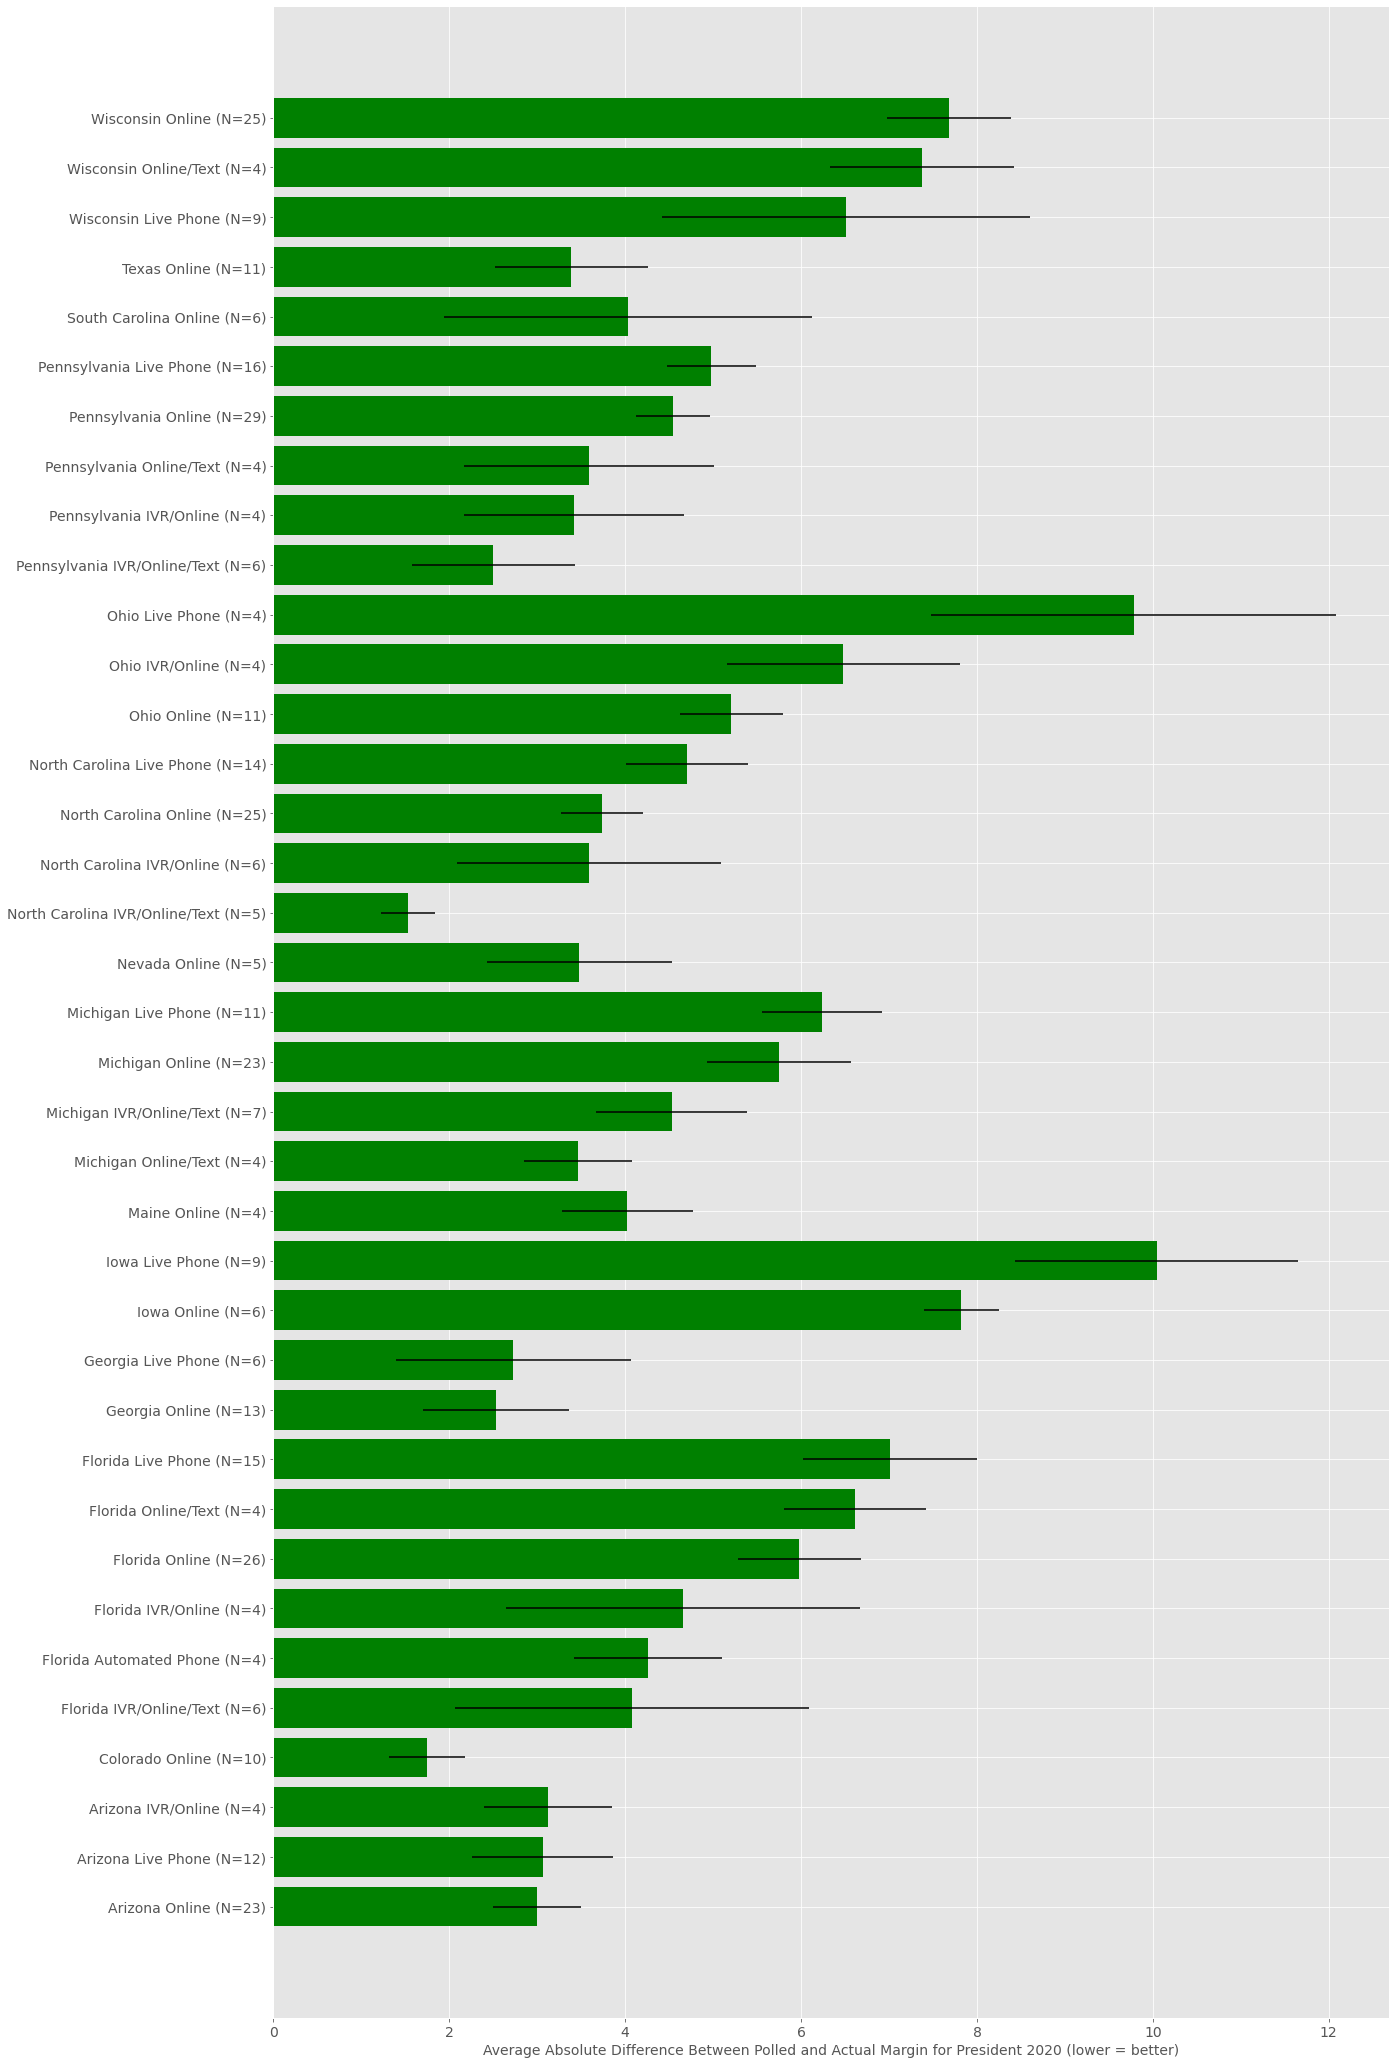

-
## Senate 2020 ##
             state      methodology  polled_margin_mean  actual_margin_mean  \
0            Maine           Online            6.000000           -8.501941   
1            Maine       IVR/Online            1.500000           -8.501941   
2             Iowa       Live Phone            1.555556           -6.478210   
3         Michigan           Online            7.881818            1.685031   
4          Arizona           Online            8.344444            2.348697   
5   North Carolina       Live Phone            4.090909           -1.746737   
6   North Carolina           Online            3.786667           -1.746737   
7         Michigan       Live Phone            6.844444            1.685031   
8         Michigan  IVR/Online/Text            4.160000            1.685031   
9            Texas           Online           -5.900000           -9.639404   
10         Arizona       Live Phone            5.572727            2.348697   
11  North Carolina  IVR/Online/T

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


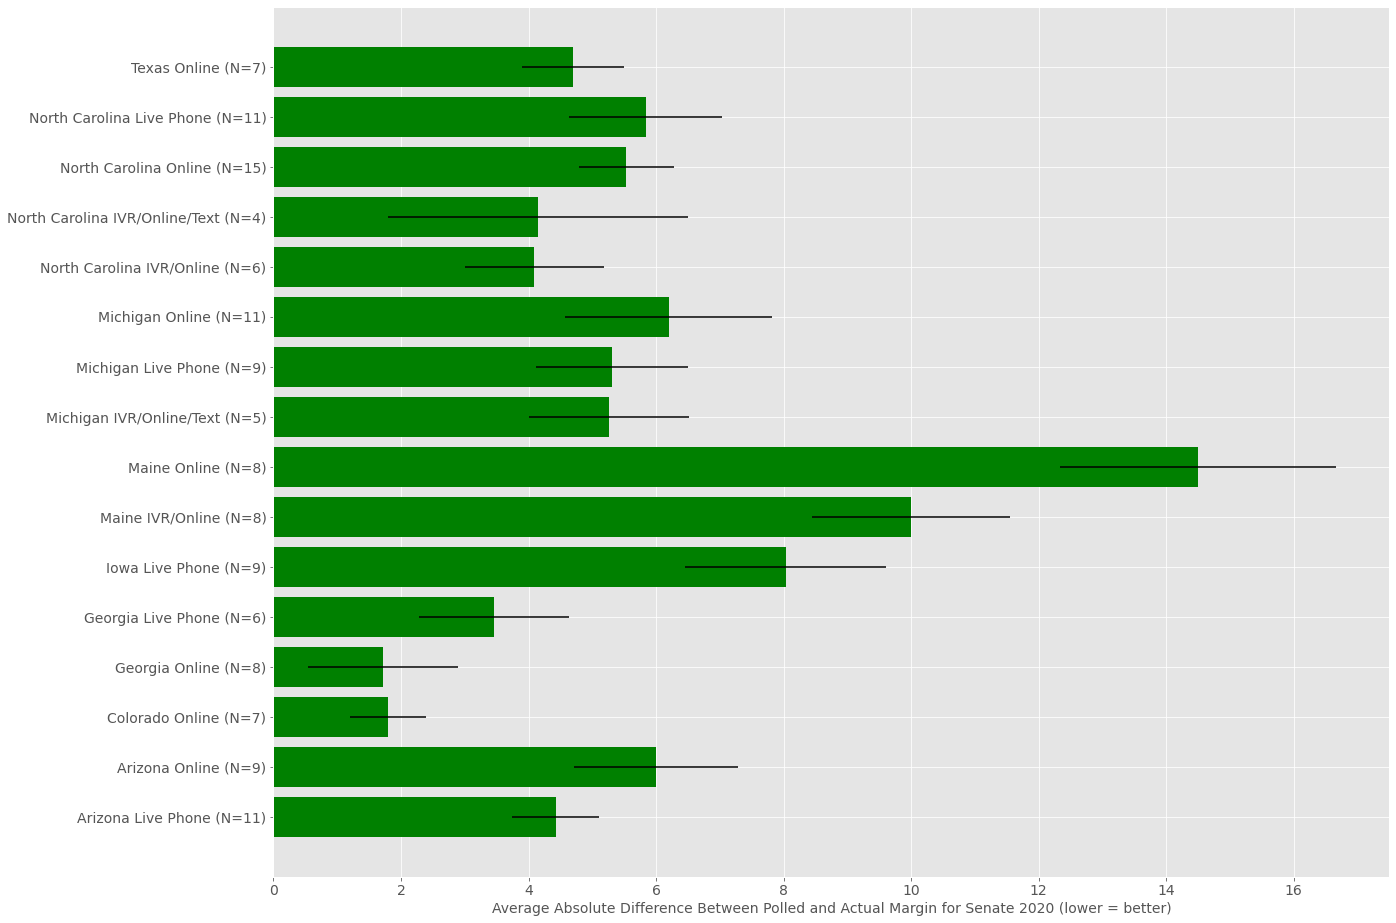

-
## Governor 2020 ##
-
## Gcb 2020 ##
      state methodology  polled_margin_mean  actual_margin_mean  \
0  National      Online            7.236296            3.100000   

   margin_diff_mean  polled_margin_count  
0          4.136296                   54  
(1, 6)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


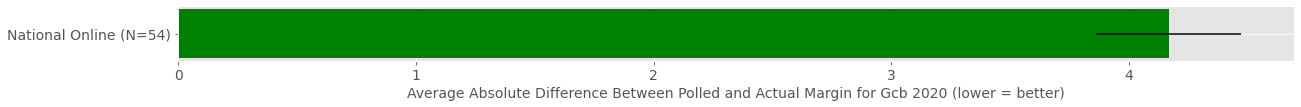

-
## President 2018 ##
-
## Senate 2018 ##
       state      methodology  polled_margin_mean  actual_margin_mean  \
0       Ohio           Online           13.375000            6.841443   
1     Nevada           Online           -0.833333            5.028997   
2     Nevada       IVR/Online           -0.322222            5.026992   
3    Arizona       IVR/Online           -1.777778            2.345107   
4      Texas       Live Phone           -6.612000           -2.567246   
5    Florida             Live            2.333000           -0.120000   
6    Florida           Online            1.820000           -0.121001   
7    Arizona           Online           -0.288889            2.348165   
8    Arizona       Live Phone            3.290000            2.344496   
9    Florida       Live Phone            1.485833           -0.122503   
10   Arizona             Live            2.051667            2.350000   
11  Michigan             Live            9.250000            6.500000   
12     T

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


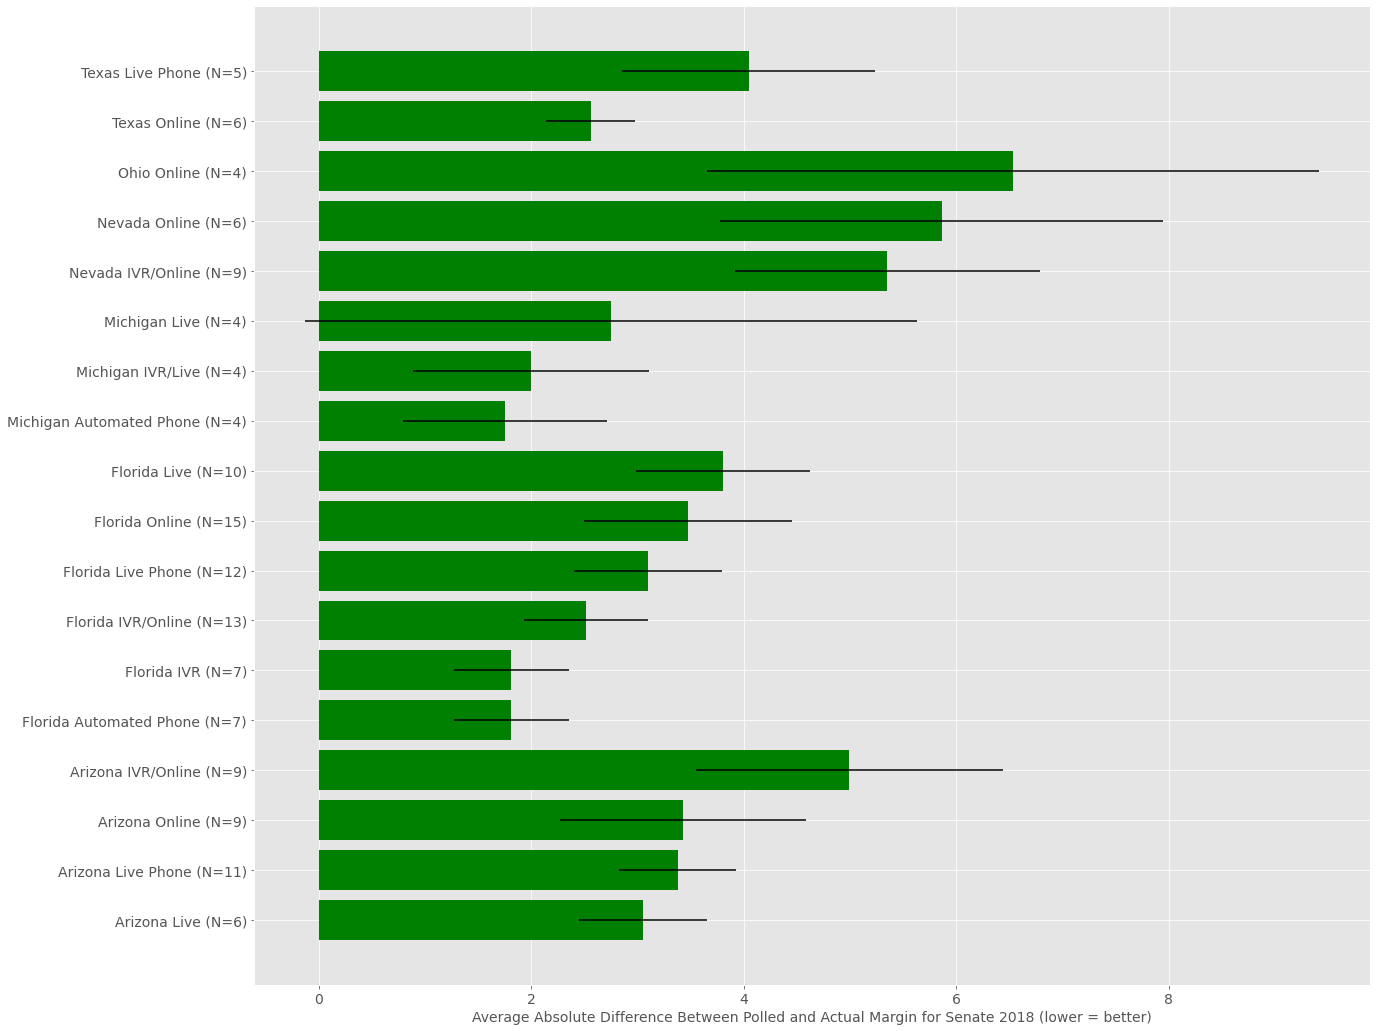

-
## Governor 2018 ##
      state methodology  polled_margin_mean  actual_margin_mean  \
0    Nevada      Online           -1.475000            4.080000   
1   Florida        Live            3.538000           -0.400000   
2   Arizona        Live          -14.500000          -14.160000   
3  Michigan    IVR/Live            7.700000            9.560000   
4   Florida      Online            3.525000           -0.400000   
5   Arizona      Online          -17.066667          -14.160000   
6   Florida         IVR            1.200000           -0.400000   

   margin_diff_mean  polled_margin_count  
0         -5.555000                    4  
1          3.938000                   10  
2         -0.340000                    4  
3         -1.860000                    4  
4          3.925000                    8  
5         -2.906667                    6  
6          1.600000                    6  
(7, 6)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


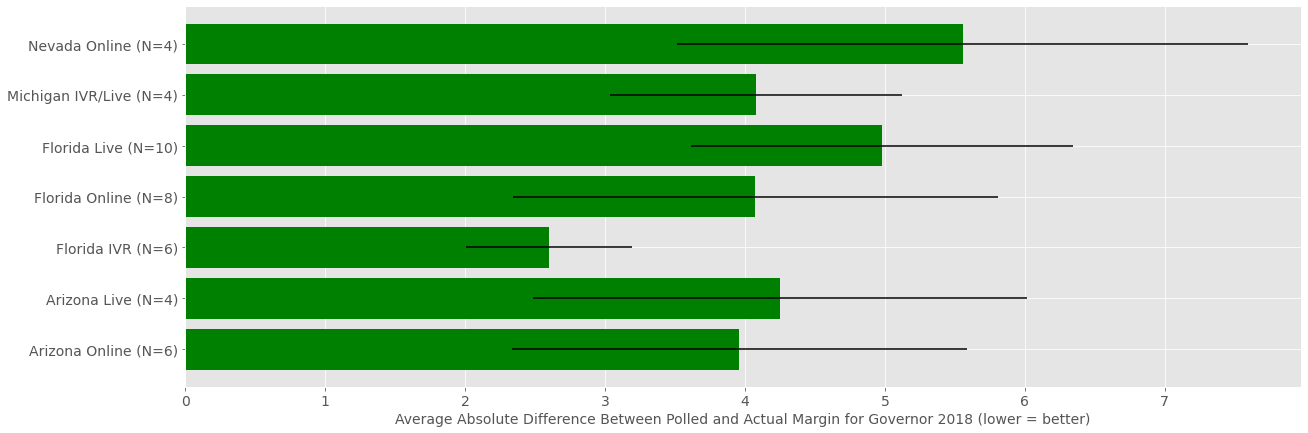

-
## Gcb 2018 ##
      state methodology  polled_margin_mean  actual_margin_mean  \
0  National      Online            7.275926            8.600000   
1  National  Live Phone            9.430769            8.600000   

   margin_diff_mean  polled_margin_count  
0         -1.324074                   54  
1          0.830769                   13  
(2, 6)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


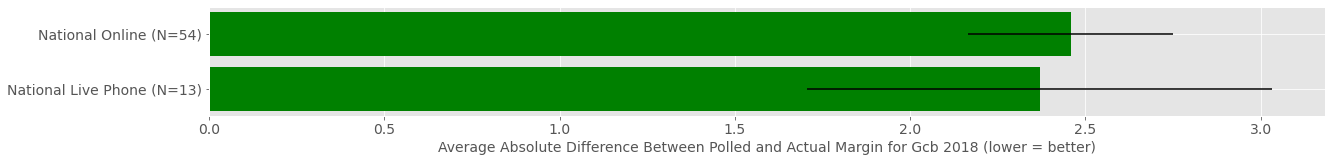

-
## President 2016 ##
             state      methodology  polled_margin_mean  actual_margin_mean  \
0             Ohio       IVR/Online            1.500000           -8.070000   
1   North Carolina       IVR/Online            3.750000           -3.660000   
2   North Carolina           Online            3.500000           -3.660000   
3   North Carolina             Live            3.500000           -3.660000   
4         Michigan         IVR/Live            6.583333           -0.220000   
5        Wisconsin         IVR/Live            5.250000           -0.770000   
6     Pennsylvania             Live            5.250000           -0.710000   
7     Pennsylvania           Online            5.250000           -0.710000   
8          Florida           Online            4.241667           -1.190000   
9            Texas           Online           -3.750000           -8.980000   
10         Georgia           Online           -1.000000           -5.090000   
11    Pennsylvania       IVR/

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


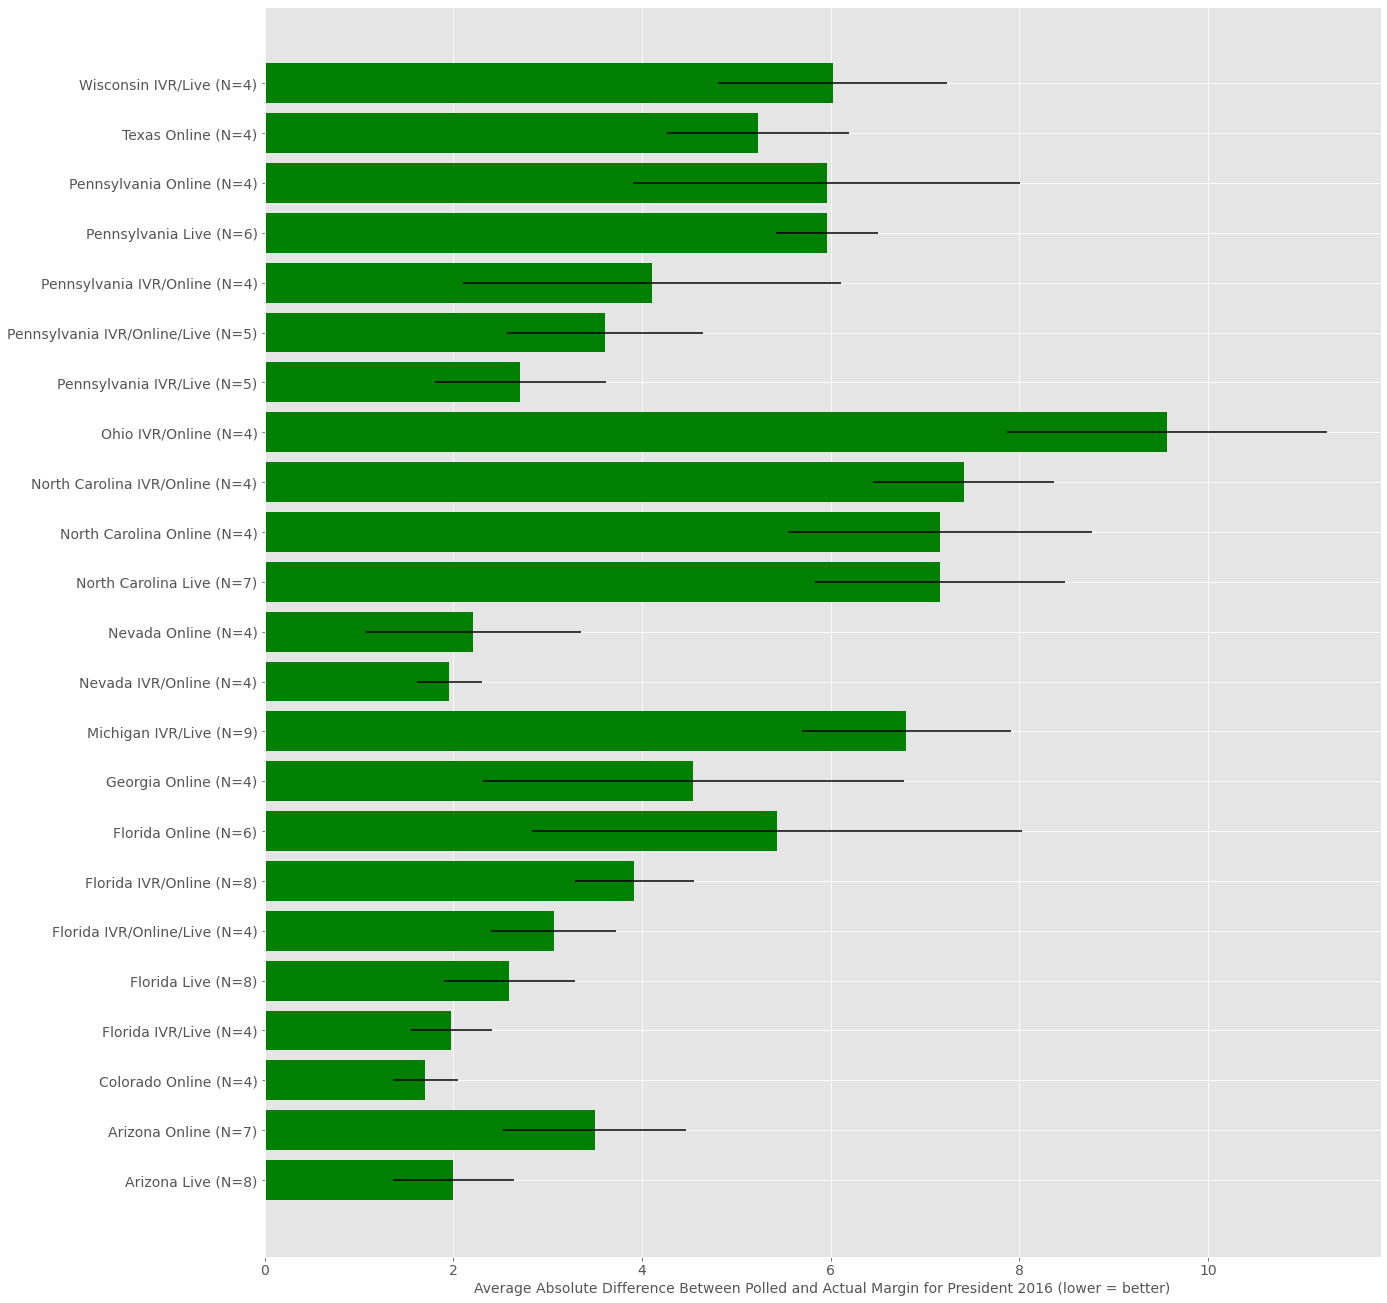

-
## Senate 2016 ##
             state methodology  polled_margin_mean  actual_margin_mean  \
0             Ohio  IVR/Online           -9.250000          -20.870000   
1   North Carolina      Online            1.500000           -5.690000   
2          Florida      Online           -4.414286           -7.670000   
3          Arizona      Online           -6.600000          -12.960000   
4          Georgia      Online          -10.800000          -13.750000   
5   North Carolina        Live           -0.428571           -5.690000   
6     Pennsylvania  IVR/Online            2.250000           -1.430000   
7     Pennsylvania      Online            2.750000           -1.430000   
8          Florida  IVR/Online           -6.014286           -7.670000   
9         Colorado      Online            7.200000            5.660000   
10    Pennsylvania        Live            1.833333           -1.430000   
11  North Carolina  IVR/Online           -2.500000           -5.690000   
12         Florida

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


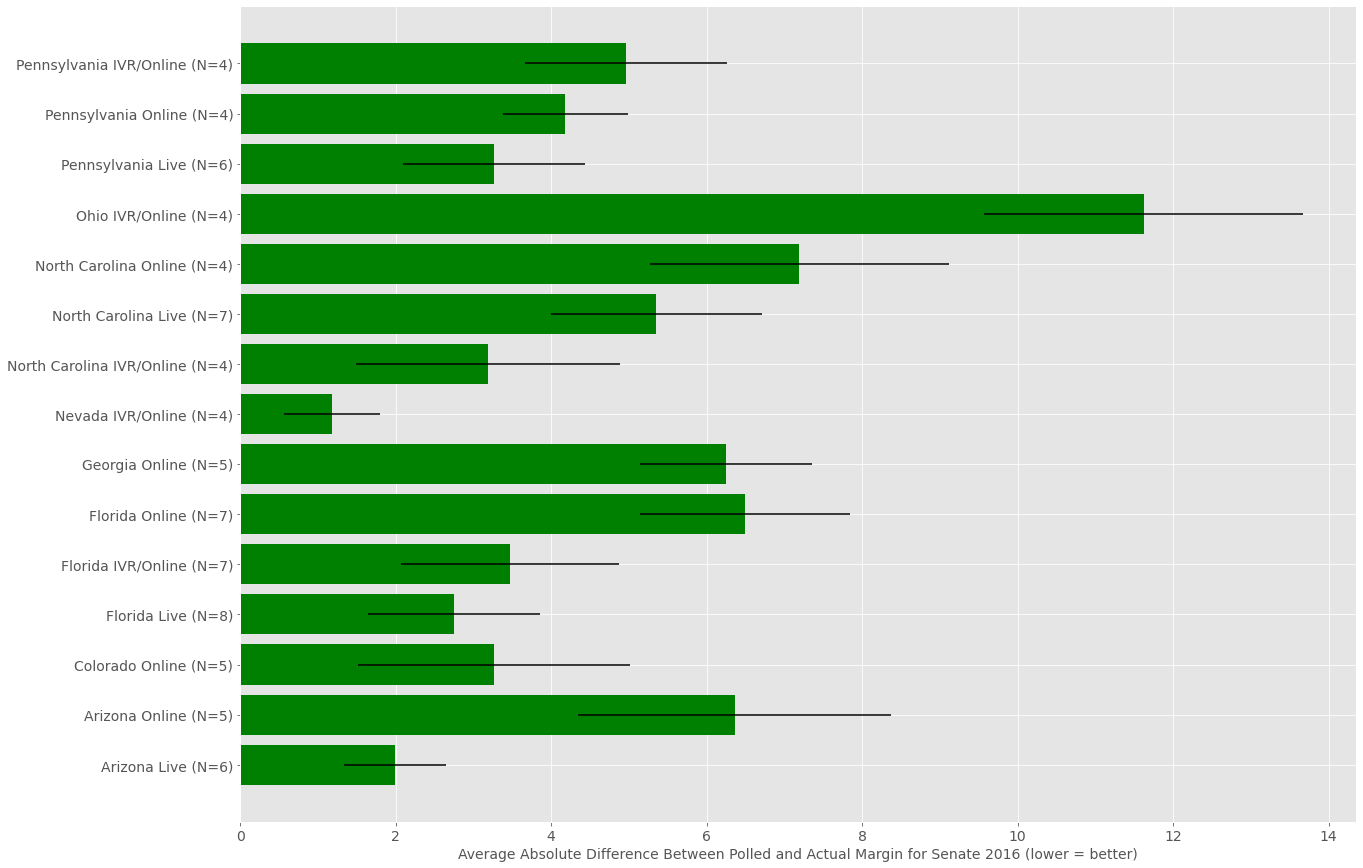

-
## Governor 2016 ##
            state methodology  polled_margin_mean  actual_margin_mean  \
0  North Carolina      Online            6.500000            0.220000   
1  North Carolina        Live            2.714286            0.220000   

   margin_diff_mean  polled_margin_count  
0          6.280000                    4  
1          2.494286                    7  
(2, 6)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


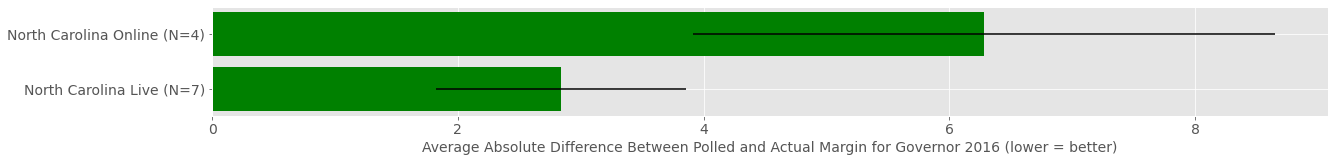

-
## Gcb 2016 ##
-
## President 2014 ##
-
## Senate 2014 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


            state      methodology  polled_margin_mean  actual_margin_mean  \
0         Georgia       IVR/Online           -1.400000           -7.680000   
1            Iowa             Live           -2.100000           -8.340000   
2         Georgia             Live           -2.750000           -7.680000   
3  North Carolina         IVR/Text            1.750000           -1.560000   
4        Colorado             Live           -2.612500           -1.940000   
5  North Carolina  IVR/Online/Live           -0.750000           -1.560000   
6  North Carolina             Live            0.666667           -1.560000   
7        Michigan         IVR/Live           13.650000           13.280000   

   margin_diff_mean  polled_margin_count  
0          6.280000                    4  
1          6.240000                    9  
2          4.930000                    4  
3          3.310000                    4  
4         -0.672500                    8  
5          0.810000                    

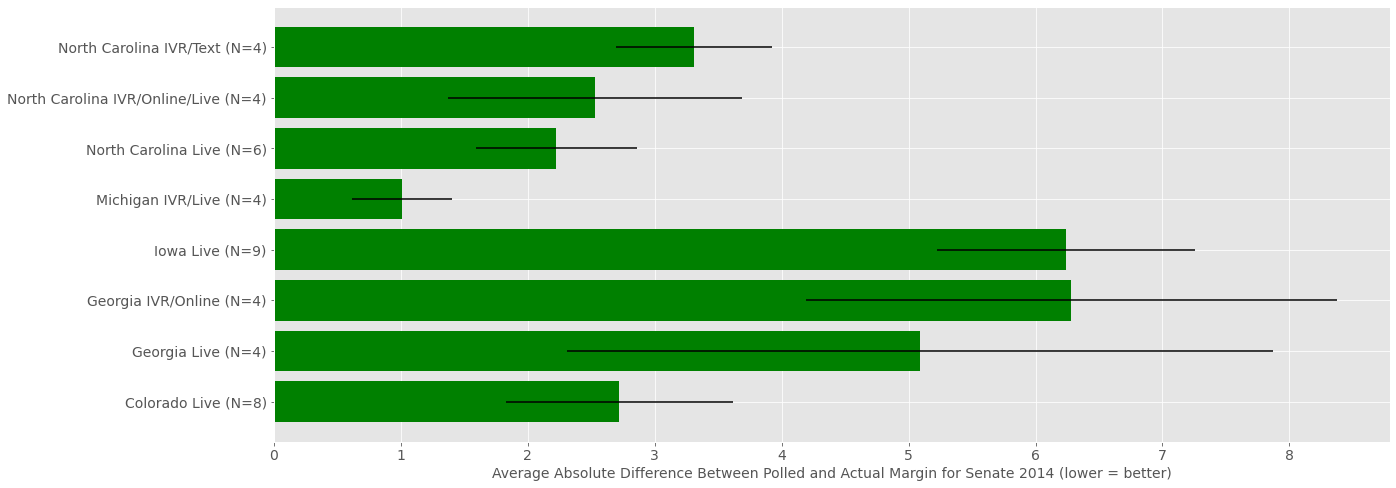

-
## Governor 2014 ##
      state methodology  polled_margin_mean  actual_margin_mean  \
0  Colorado        Live            0.666667            3.350000   
1   Georgia        Live           -3.500000           -7.860000   
2   Georgia  IVR/Online           -4.000000           -7.860000   
3  Michigan    IVR/Live           -0.800000           -4.060000   
4      Iowa        Live          -19.250000          -21.720000   
5   Florida      Online            2.250000           -1.070000   
6   Florida        Live           -1.000000           -1.070000   

   margin_diff_mean  polled_margin_count  
0         -2.683333                    6  
1          4.360000                    4  
2          3.860000                    4  
3          3.260000                    5  
4          2.470000                    8  
5          3.320000                    4  
6          0.070000                    6  
(7, 6)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


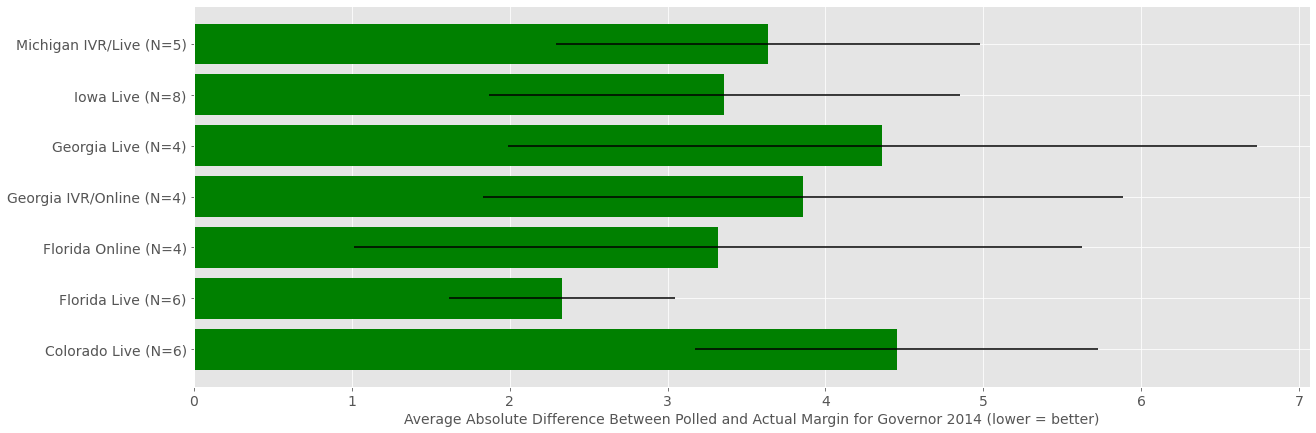

-
## Gcb 2014 ##
-
## President 2012 ##
             state      methodology  polled_margin_mean  actual_margin_mean  \
0        Wisconsin       IVR/Online            0.800000            6.940000   
1             Ohio              IVR           -2.960000            2.980000   
2         Michigan  Automated Phone            4.545455            9.601064   
3         Colorado           Online            0.375000            5.360000   
4         Michigan            Phone            5.000000            9.601064   
5          Florida       IVR/Online           -3.500000            0.870000   
6         Colorado            Phone            1.181818            5.496014   
7         Colorado         Internet            1.250000            5.496014   
8           Nevada  Automated Phone            2.571429            6.815084   
9         Colorado  Automated Phone            1.555556            5.496014   
10       Wisconsin  Automated Phone            3.000000            7.032765   
11          

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


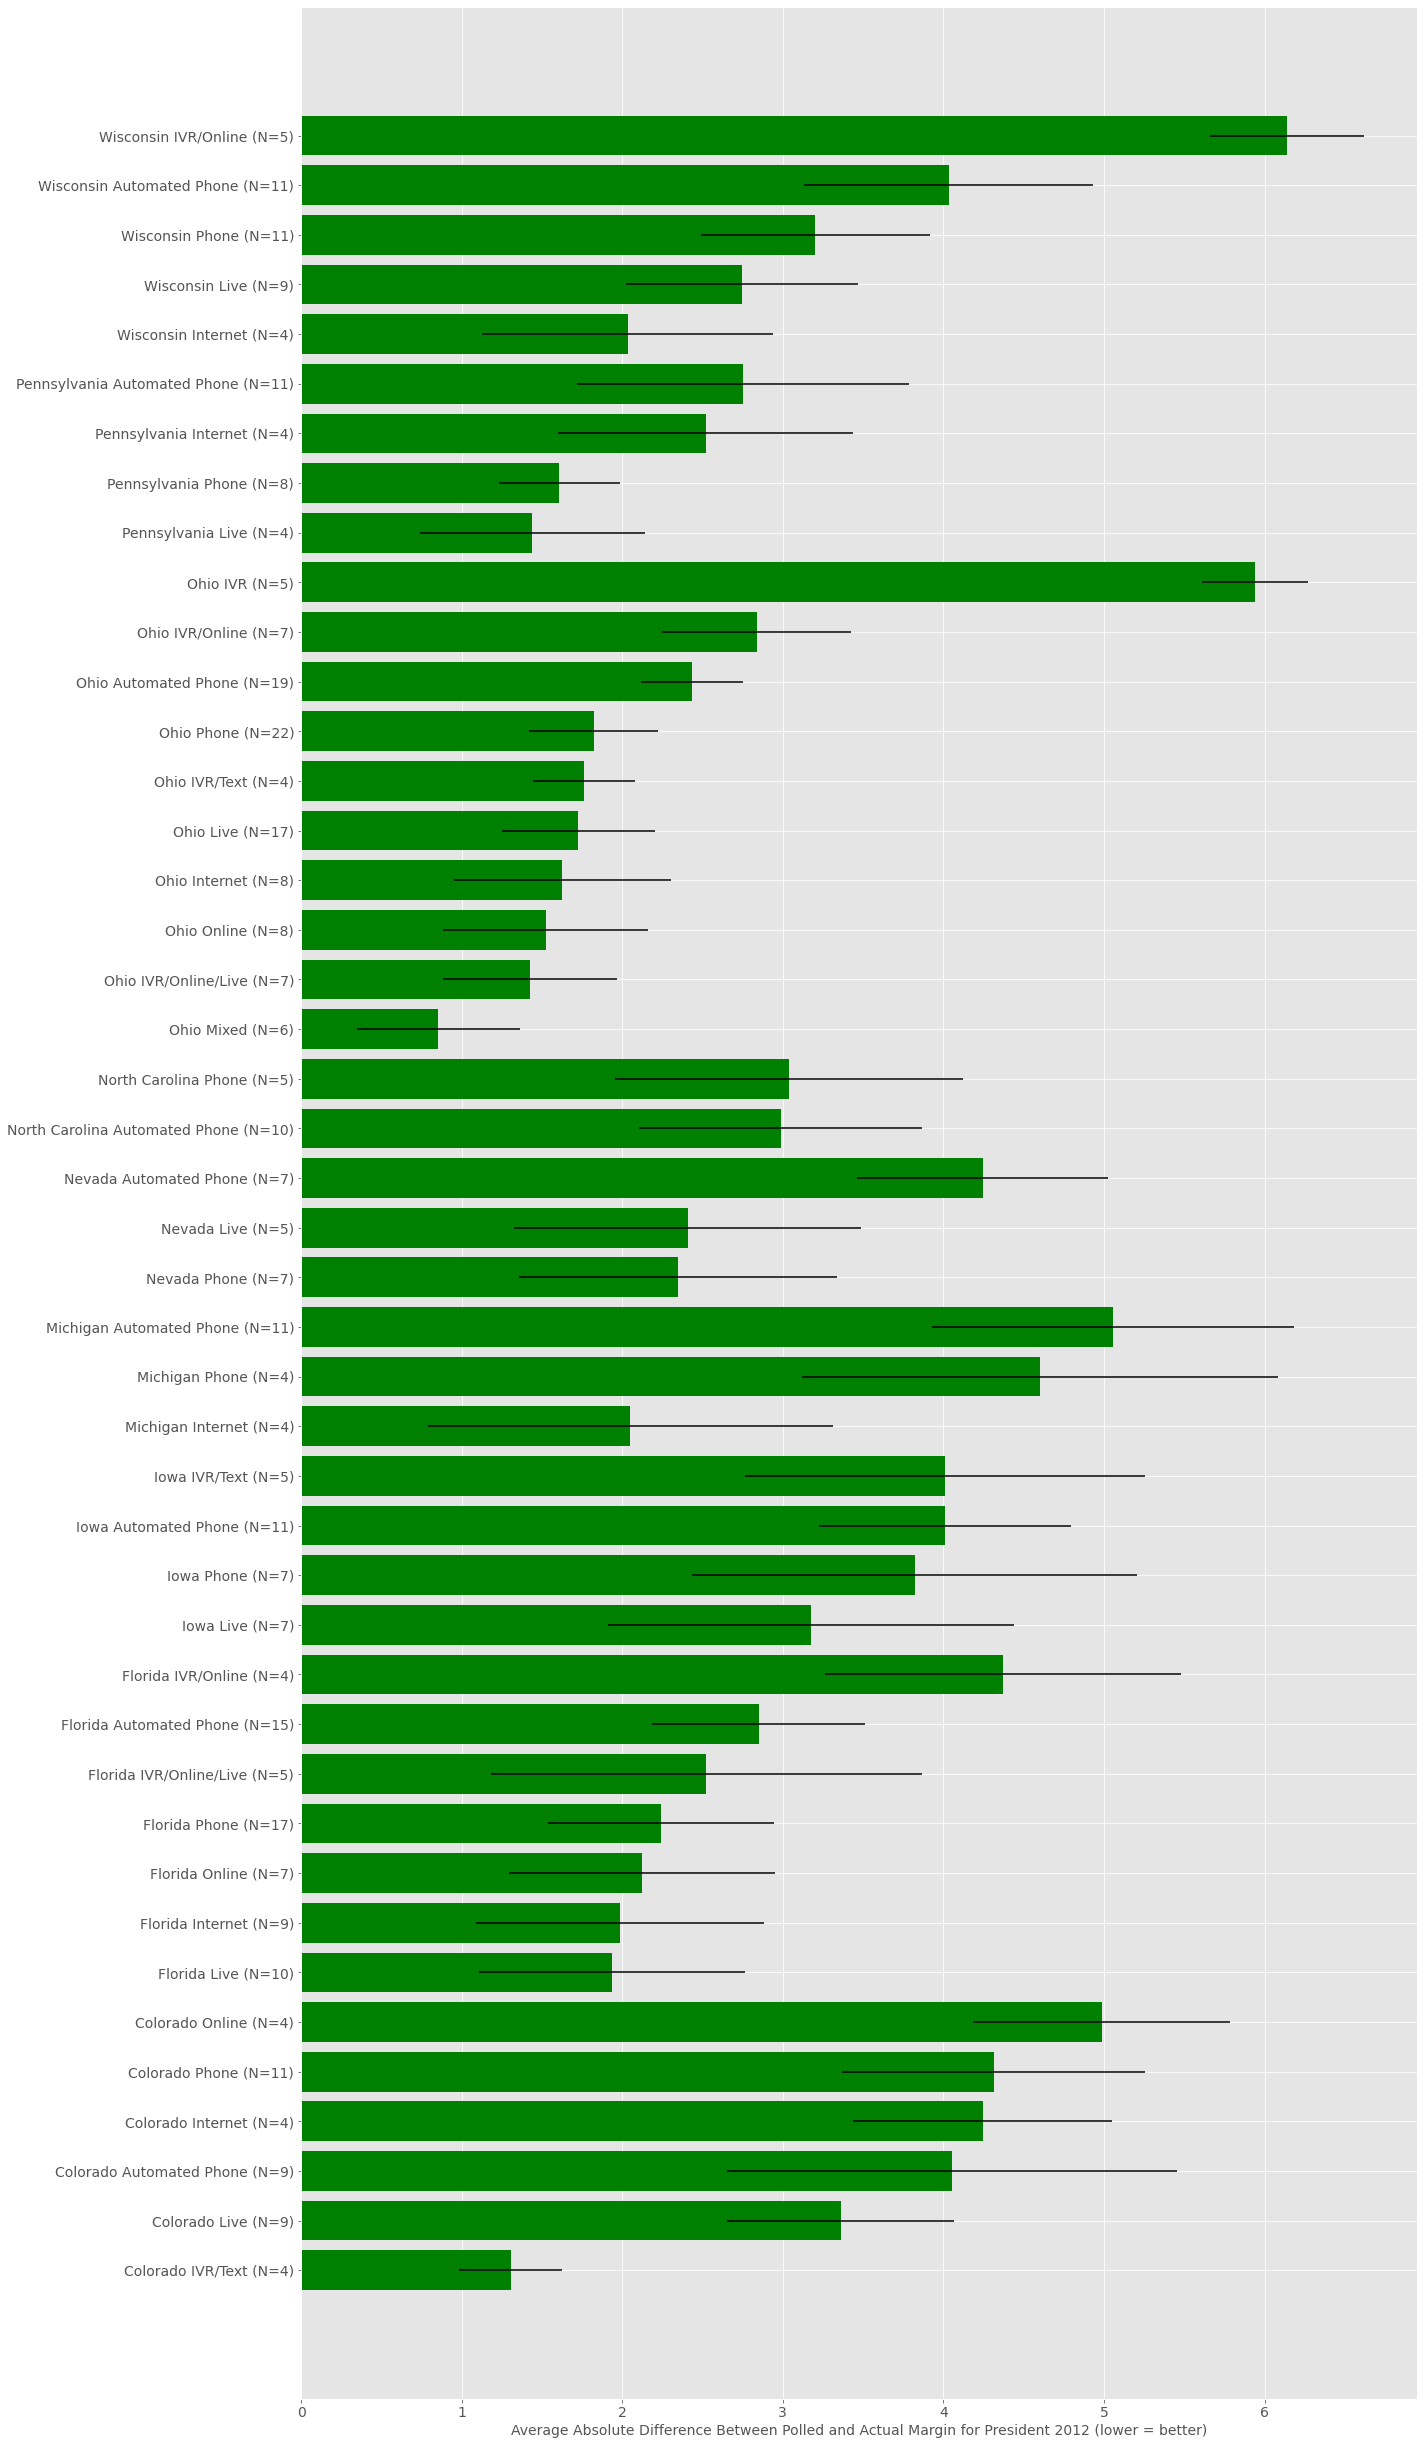

-
## Senate 2012 ##
           state      methodology  polled_margin_mean  actual_margin_mean  \
0       Nebraska            Phone           -5.800000          -15.548866   
1       Michigan  Automated Phone           12.428571           21.505539   
2        Florida  Automated Phone            4.600000           13.345297   
3       Michigan         Internet           13.750000           21.505539   
4        Florida  IVR/Online/Live            6.000000           13.000000   
5   Pennsylvania  Automated Phone            3.000000            9.261954   
6      Wisconsin       IVR/Online           -1.000000            5.550000   
7        Florida             Live            7.756000           13.000000   
8        Arizona            Phone           -1.000000           -3.172117   
9      Wisconsin  Automated Phone            1.000000            5.704301   
10       Florida         Internet           10.500000           13.345297   
11    New Mexico            Phone            5.200000   

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


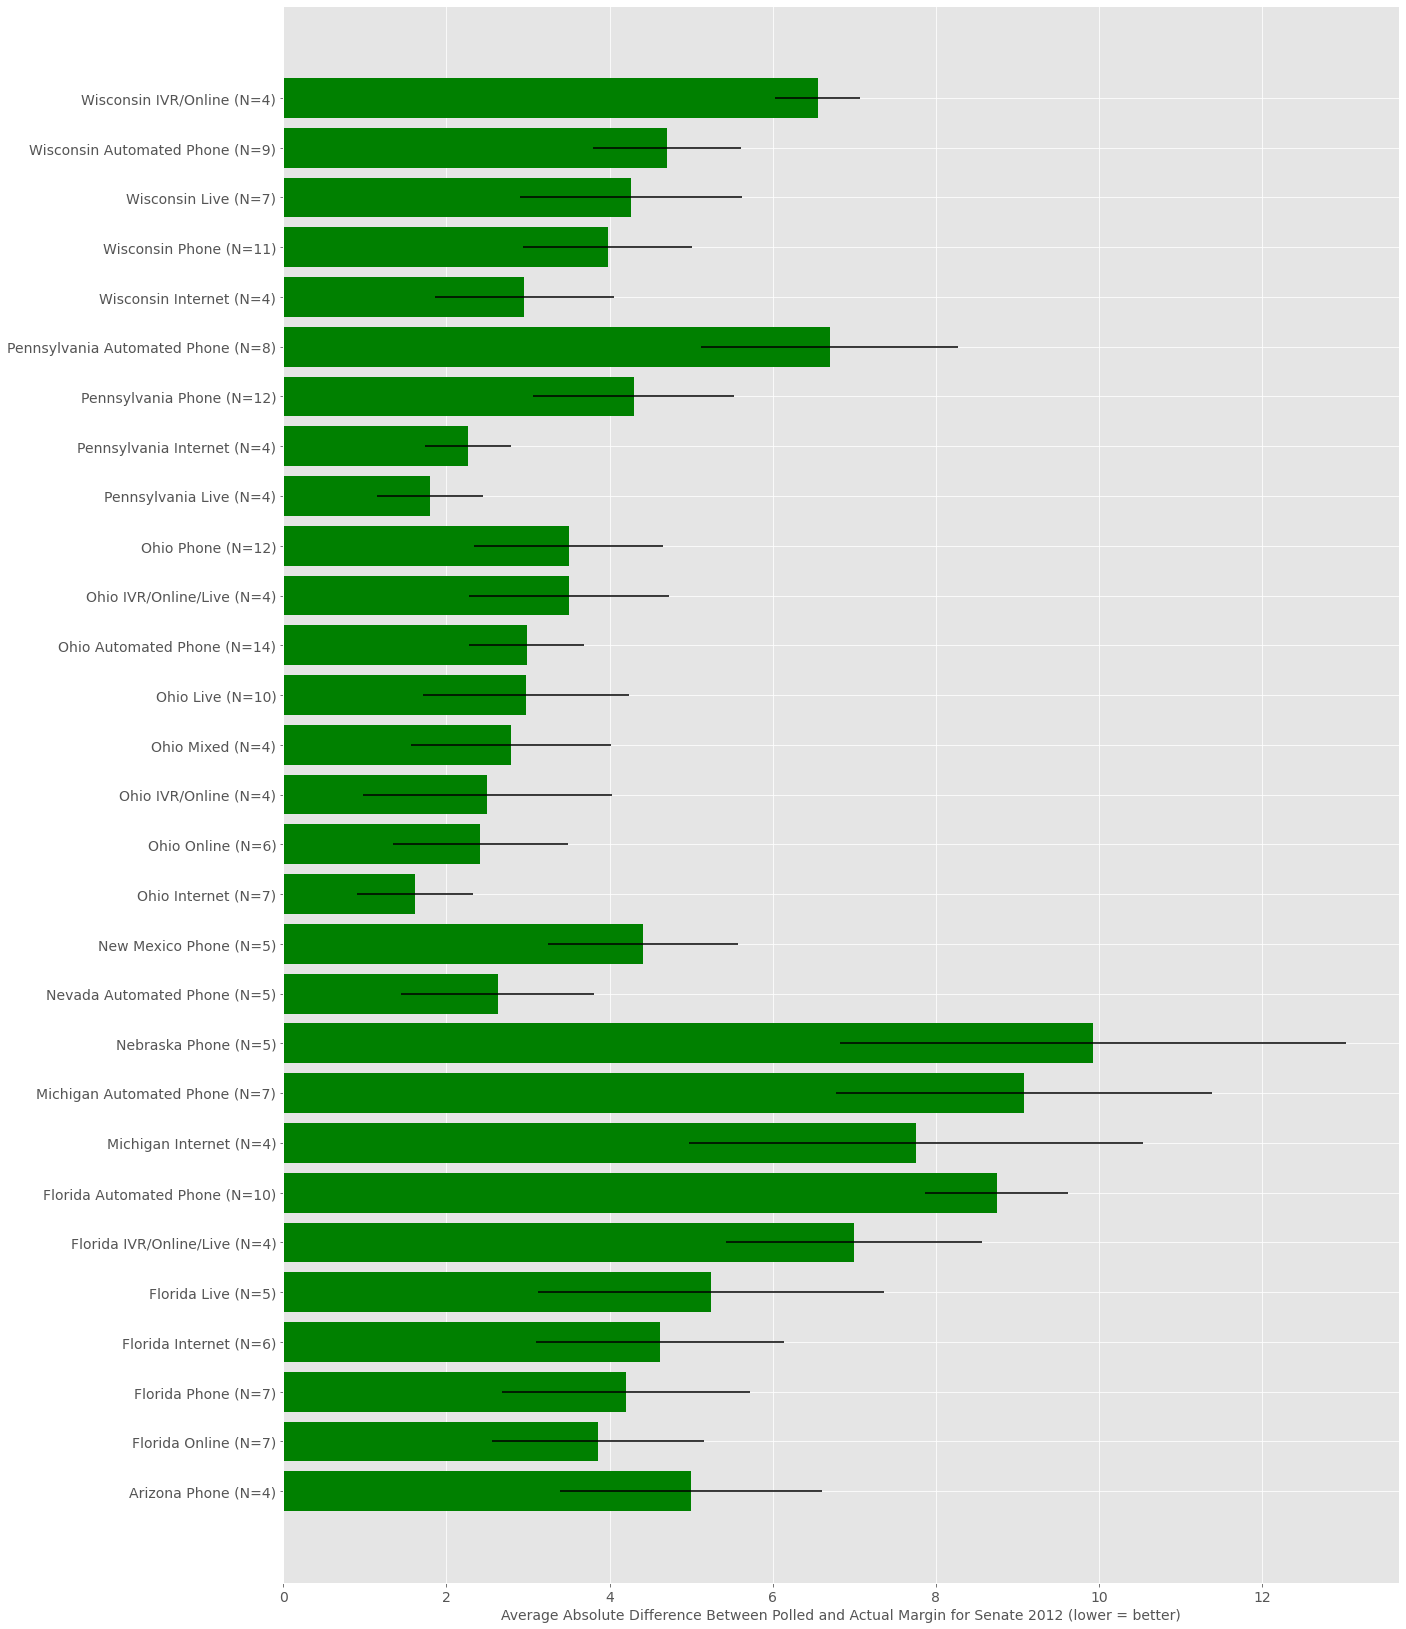

-
## Governor 2012 ##
-
## Gcb 2012 ##
-
## President 2010 ##
-
## Senate 2010 ##
          state methodology  polled_margin_mean  actual_margin_mean  \
0        Nevada         IVR           -6.000000            5.740000   
1        Nevada        Live           -4.000000            5.740000   
2      Colorado         IVR           -4.500000            1.680000   
3      Colorado  IVR/Online           -2.750000            1.680000   
4  Pennsylvania         IVR           -6.000000           -2.020000   
5  Pennsylvania        Live           -3.750000           -2.020000   
6          Ohio        Live          -18.714286          -17.450000   

   margin_diff_mean  polled_margin_count  
0        -11.740000                    4  
1         -9.740000                    4  
2         -6.180000                    4  
3         -4.430000                    4  
4         -3.980000                    4  
5         -1.730000                    8  
6         -1.264286                    7  
(7, 6

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


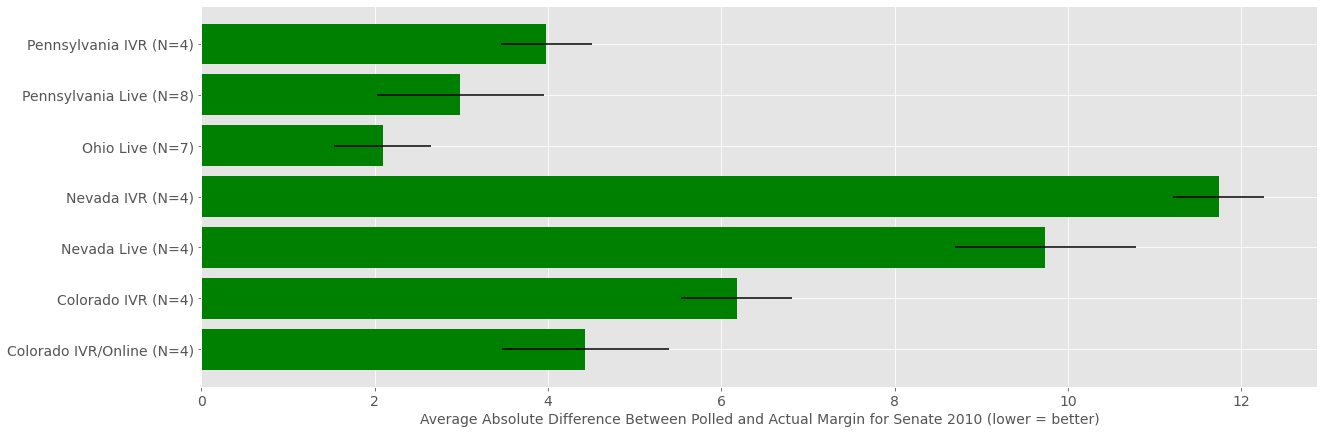

-
## Governor 2010 ##
          state      methodology  polled_margin_mean  actual_margin_mean  \
0       Florida             Live            1.166667           -1.150000   
1       Florida           Online            1.000000           -1.150000   
2          Ohio             Live           -3.571429           -2.000000   
3       Florida  IVR/Online/Live            0.000000           -1.150000   
4          Ohio       IVR/Online           -4.500000           -2.000000   
5  Pennsylvania             Live           -8.375000           -8.980000   

   margin_diff_mean  polled_margin_count  
0          2.316667                    6  
1          2.150000                    4  
2         -1.571429                    7  
3          1.150000                    5  
4         -2.500000                    4  
5          0.605000                    8  
(6, 6)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


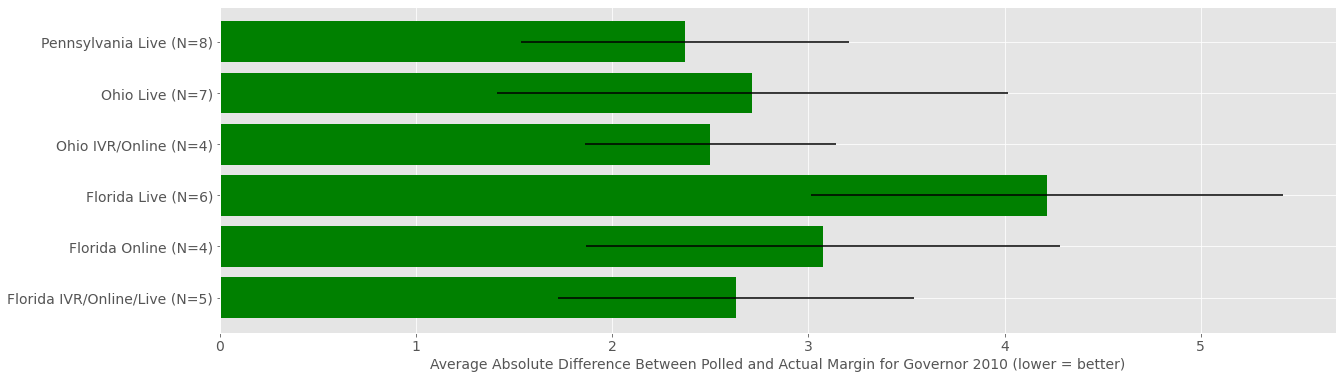

-
## Gcb 2010 ##
-
## President 2008 ##
             state      methodology  polled_margin_mean  actual_margin_mean  \
0           Alaska             Live          -11.175000          -21.530000   
1             Ohio            Live*            5.750000            4.580000   
2           Nevada           Online            5.300000           12.500000   
3           Nevada             Live            6.300000           12.500000   
4             Ohio       IVR/Online            2.400000            4.580000   
5          Arizona             Live           -4.625000           -8.480000   
6     Pennsylvania       IVR/Online            6.500000           10.320000   
7         Colorado       IVR/Online            5.500000            8.950000   
8             Ohio             Live            5.538462            4.580000   
9         Colorado             Live            5.900000            8.950000   
10         Georgia       IVR/Online           -2.200000           -5.200000   
11  North Ca

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


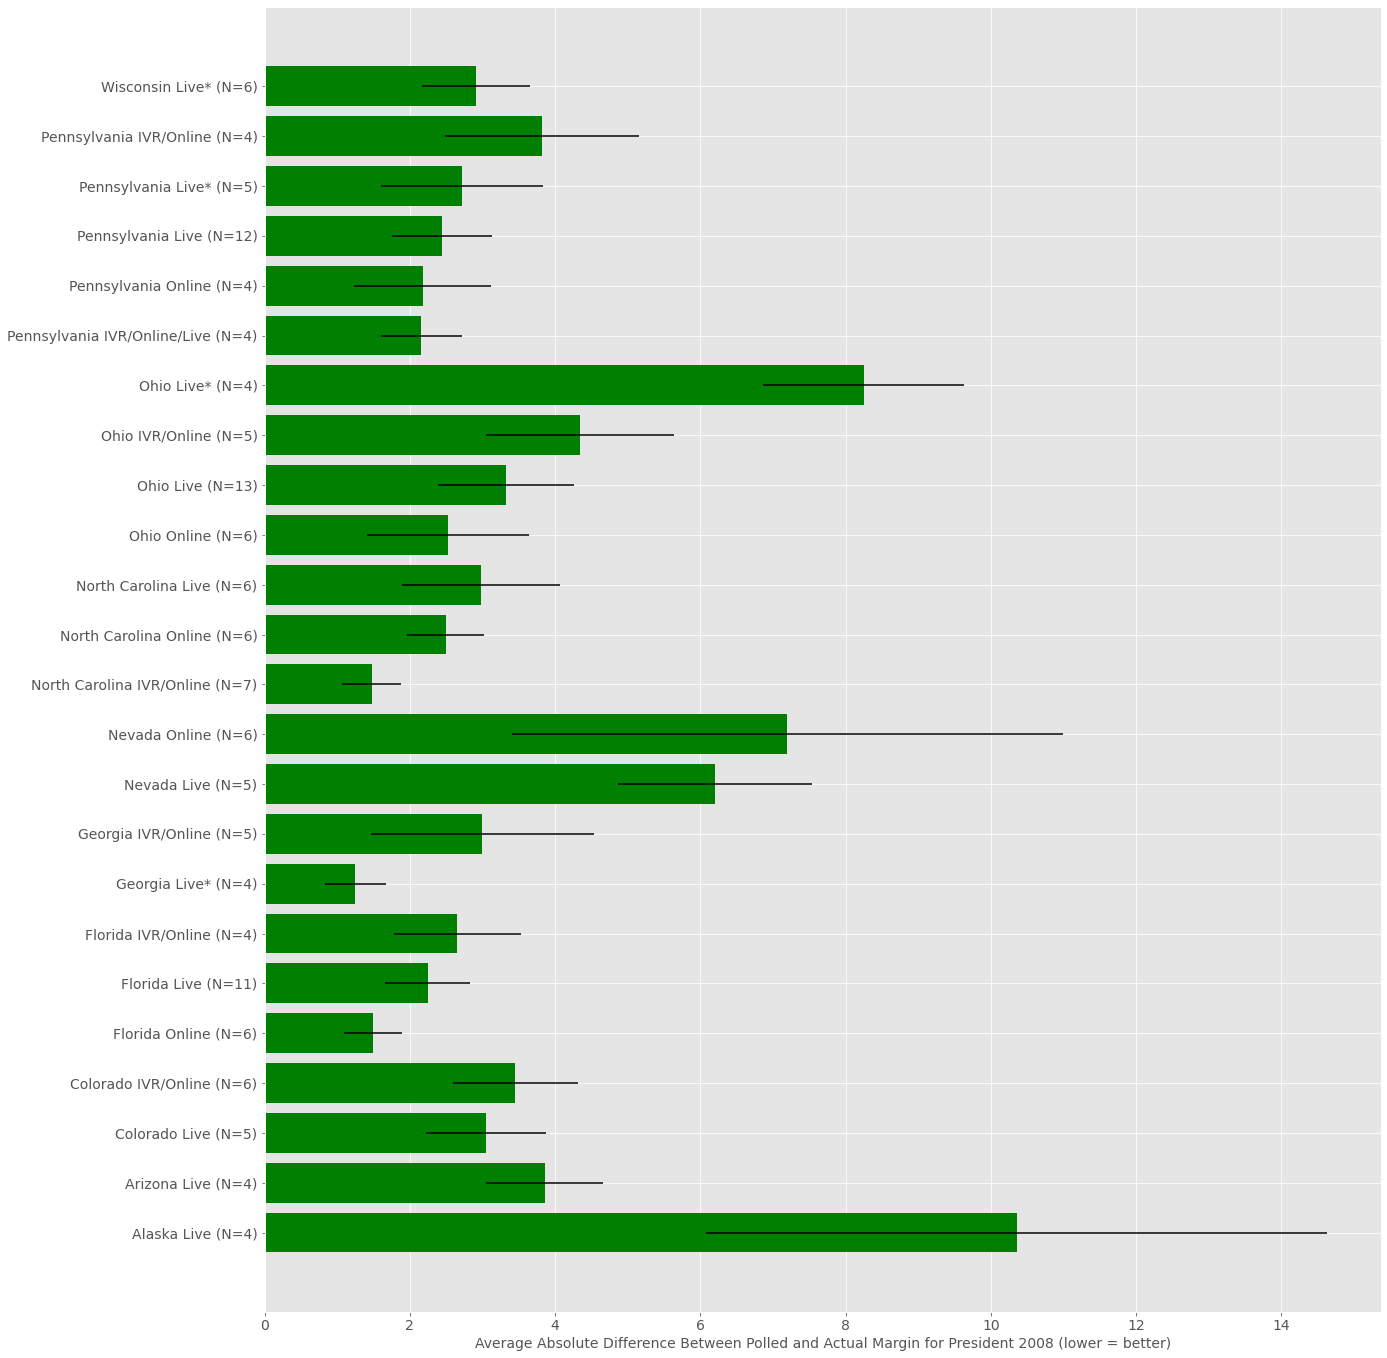

-
## Senate 2008 ##
            state methodology  polled_margin_mean  actual_margin_mean  \
0  North Carolina        Live            1.500000            8.470000   
1         Georgia  IVR/Online           -3.375000           -7.411250   
2         Georgia       Live*           -3.428571           -8.051429   
3        Colorado        Live            9.400000           10.310000   

   margin_diff_mean  polled_margin_count  
0         -6.970000                    4  
1          4.036250                    8  
2          4.622857                    7  
3         -0.910000                    5  
(4, 6)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


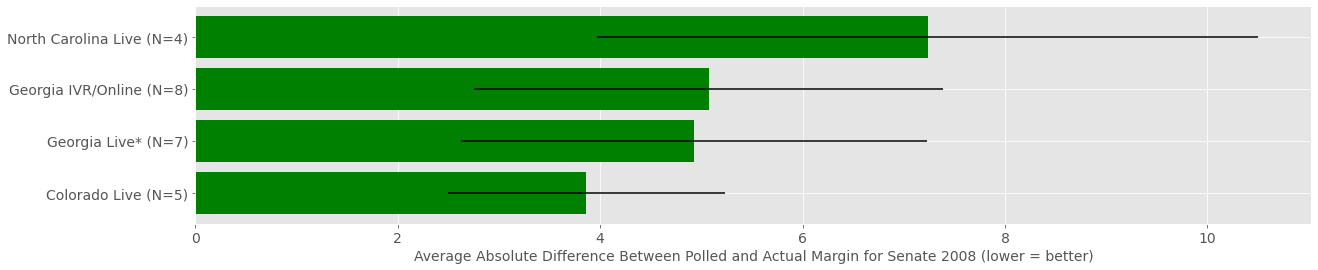

-
## Governor 2008 ##
-
## Gcb 2008 ##
-
## President 2006 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


-
## Senate 2006 ##
          state methodology  polled_margin_mean  actual_margin_mean  \
0      Michigan       Live*            7.500000           15.650000   
1  Pennsylvania       Live*           10.000000           17.360000   
2  Pennsylvania        Live           10.750000           17.360000   
3       Florida        Live           27.750000           22.200000   
4          Ohio        Live            9.000000           12.340000   
5      Michigan        Live           14.800000           15.650000   

   margin_diff_mean  polled_margin_count  
0         -8.150000                    4  
1         -7.360000                    6  
2         -6.610000                    4  
3          5.550000                    4  
4         -3.340000                    5  
5         -0.850000                    5  
(6, 6)


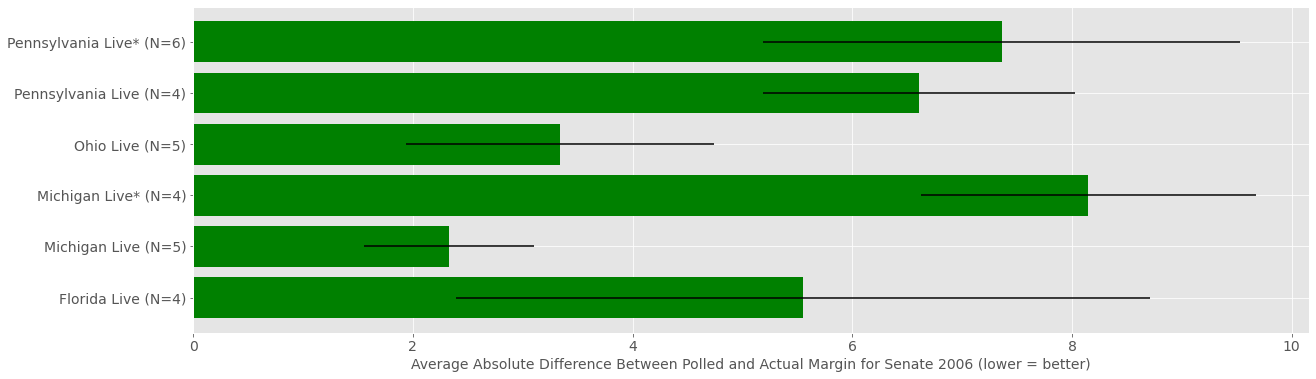

-
## Governor 2006 ##
          state methodology  polled_margin_mean  actual_margin_mean  \
0      Michigan       Live*            8.000000           14.060000   
1     Wisconsin       Live*            6.250000            7.390000   
2      Michigan        Live           10.200000           14.060000   
3          Ohio        Live           21.000000           23.890000   
4       Florida        Live           -6.500000           -7.070000   
5  Pennsylvania        Live           21.750000           20.710000   
6  Pennsylvania       Live*           22.600000           20.710000   
7       Florida       Live*           -8.250000           -7.070000   

   margin_diff_mean  polled_margin_count  
0         -6.060000                    4  
1         -1.140000                    4  
2         -3.860000                    5  
3         -2.890000                    4  
4          0.570000                    4  
5          1.040000                    4  
6          1.890000                  

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


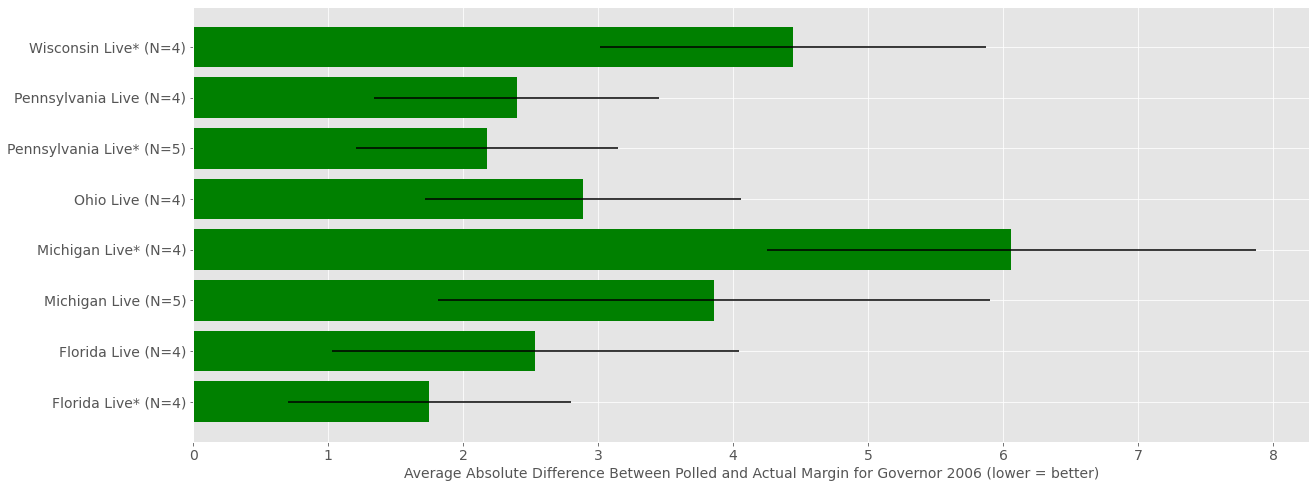

-
## Gcb 2006 ##
-
## President 2004 ##
           state      methodology  polled_margin_mean  actual_margin_mean  \
0        Florida           Online            0.360000           -5.010000   
1       Michigan           Online            5.175000            3.420000   
2        Florida             Live           -2.000000           -5.010000   
3        Florida            Live*           -1.214286           -5.010000   
4           Ohio           Online           -1.400000           -2.100000   
5      Wisconsin           Online            2.450000            0.380000   
6      Wisconsin            Live*           -3.000000            0.380000   
7           Ohio             Live            1.100000           -2.100000   
8           Iowa           Online            1.800000           -0.670000   
9           Iowa             Live           -2.500000           -0.670000   
10       Florida       IVR/Online           -2.000000           -5.010000   
11  Pennsylvania  IVR/Online/Live   

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


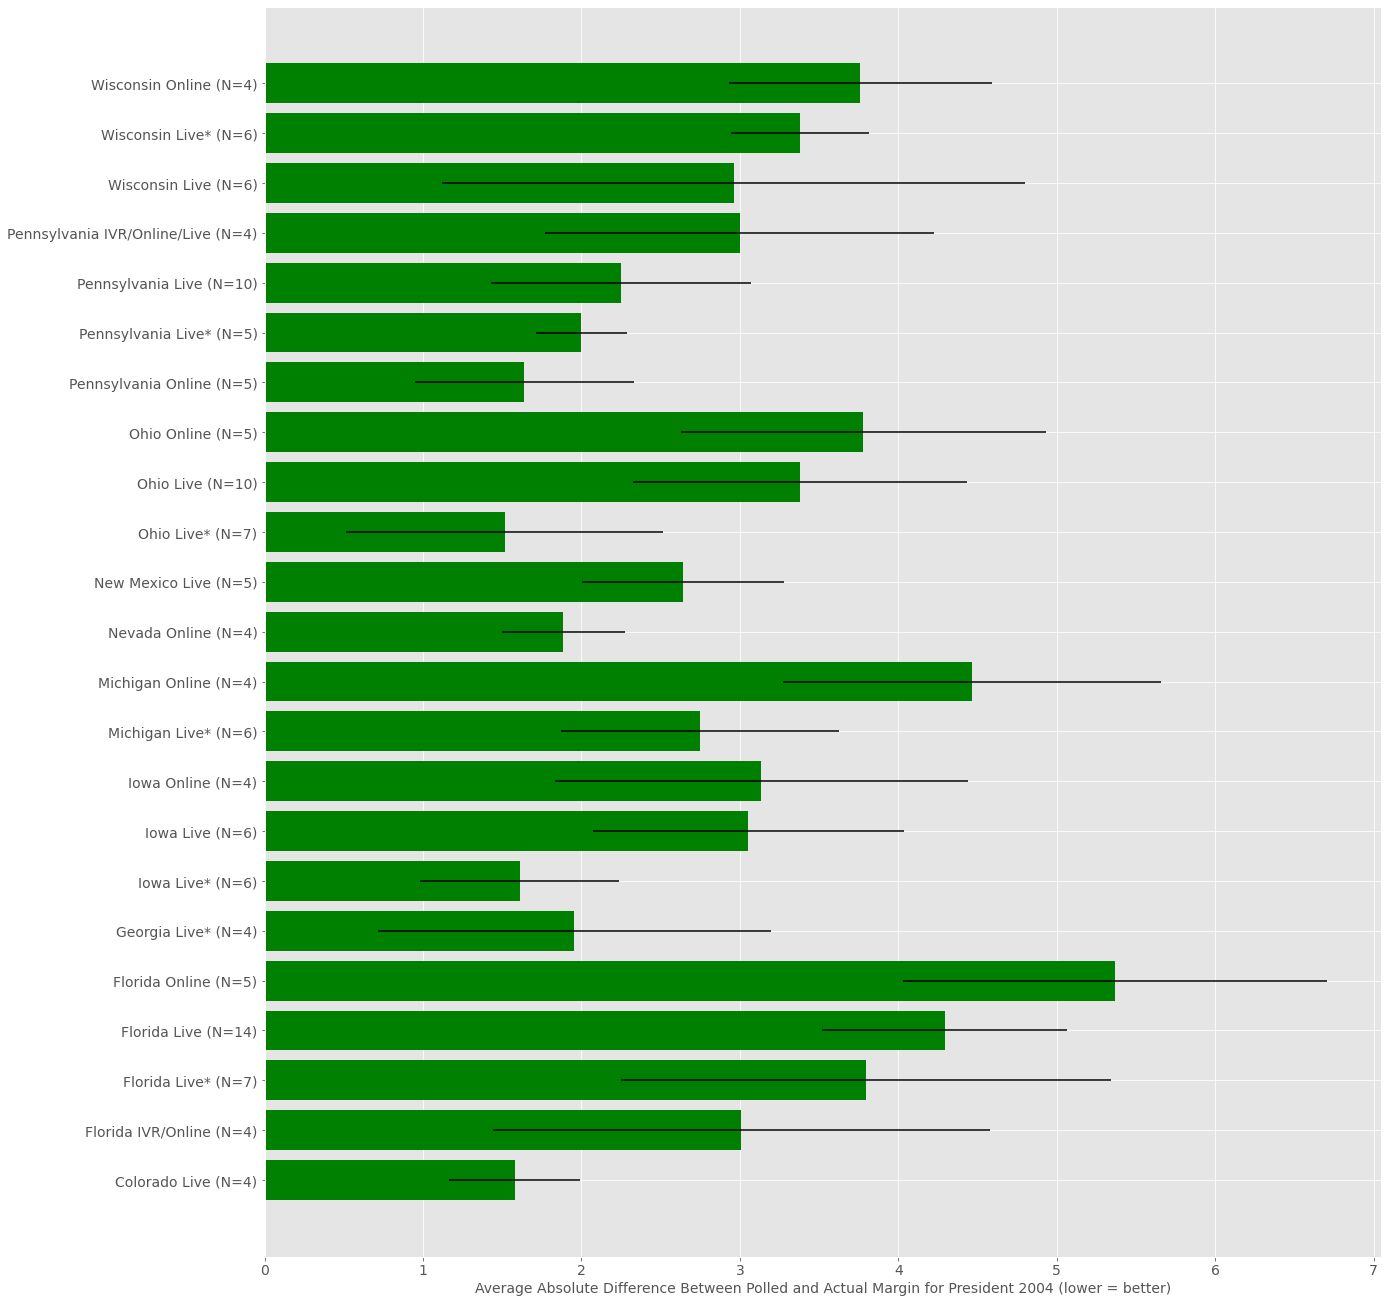

-
## Senate 2004 ##
          state      methodology  polled_margin_mean  actual_margin_mean  \
0  Pennsylvania            Live*          -20.000000          -10.630000   
1  Pennsylvania             Live          -19.625000          -10.630000   
2  Pennsylvania  IVR/Online/Live          -14.250000          -10.630000   
3          Ohio             Live          -30.000000          -27.710000   
4       Georgia            Live*          -14.750000          -17.890000   
5       Florida            Live*            0.000000           -1.110000   
6      Colorado             Live            2.750000            4.770000   
7       Florida             Live           -0.300000           -1.110000   

   margin_diff_mean  polled_margin_count  
0         -9.370000                    4  
1         -8.995000                    4  
2         -3.620000                    4  
3         -2.290000                    4  
4          3.140000                    4  
5          1.110000                  

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


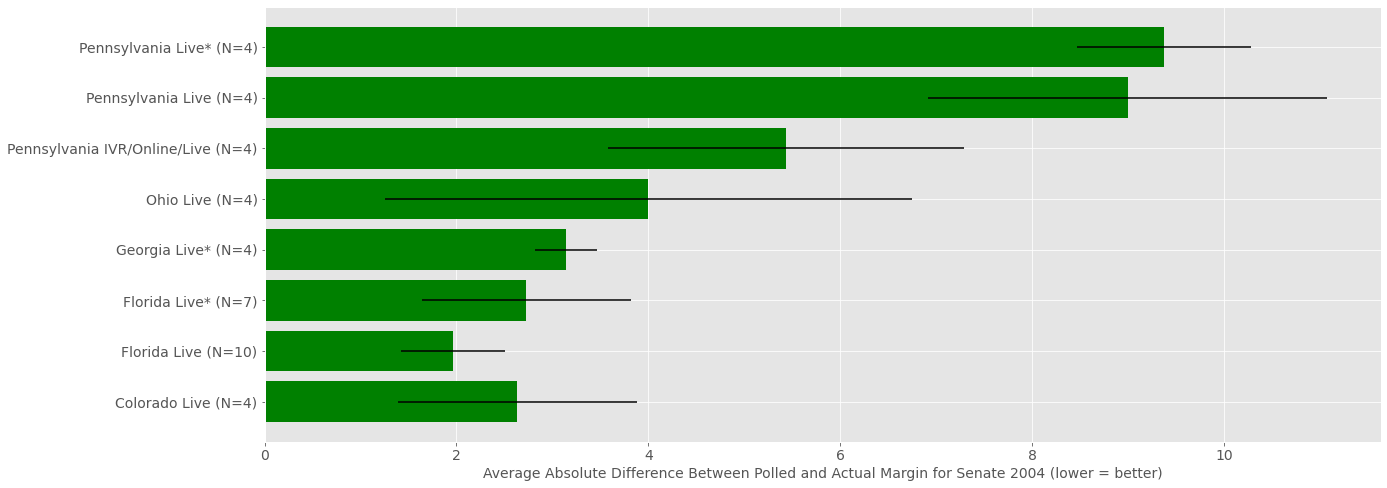

-
## Governor 2004 ##
-
## Gcb 2004 ##


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


-
## President 2002 ##
-
## Senate 2002 ##
      state methodology  polled_margin_mean  actual_margin_mean  \
0  Colorado        Live           -3.400000           -4.930000   

   margin_diff_mean  polled_margin_count  
0          1.530000                    5  
(1, 6)


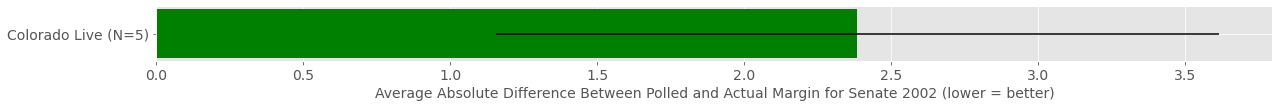

-
## Governor 2002 ##
      state methodology  polled_margin_mean  actual_margin_mean  \
0  Colorado        Live          -35.000000          -28.970000   
1   Florida        Live           -6.600000          -12.850000   
2     Texas       Live*          -13.750000          -17.850000   

   margin_diff_mean  polled_margin_count  
0         -6.030000                    6  
1          6.250000                    5  
2          4.100000                    4  
(3, 6)


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


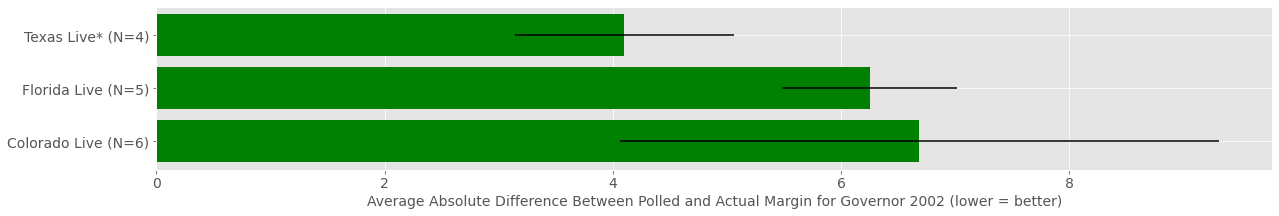

-
## Gcb 2002 ##
-
## President 2000 ##
           state methodology  polled_margin_mean  actual_margin_mean  \
0   Pennsylvania  IVR/Online           -3.250000            4.170000   
1      Wisconsin        Live           -1.000000            0.220000   
2       Michigan        Live            0.444444            5.140000   
3        Florida      Online            4.000000           -0.010000   
4        Florida        Live            0.250000           -0.010000   
5   Pennsylvania      Online            2.200000            4.170000   
6      Wisconsin      Online            0.333333            0.220000   
7           Ohio        Live           -7.000000           -3.510000   
8           Ohio      Online           -6.000000           -3.510000   
9   Pennsylvania       Live*            1.500000            4.170000   
10      Michigan      Online            6.000000            5.140000   
11  Pennsylvania        Live            3.400000            4.170000   

    margin_diff_mean  p

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


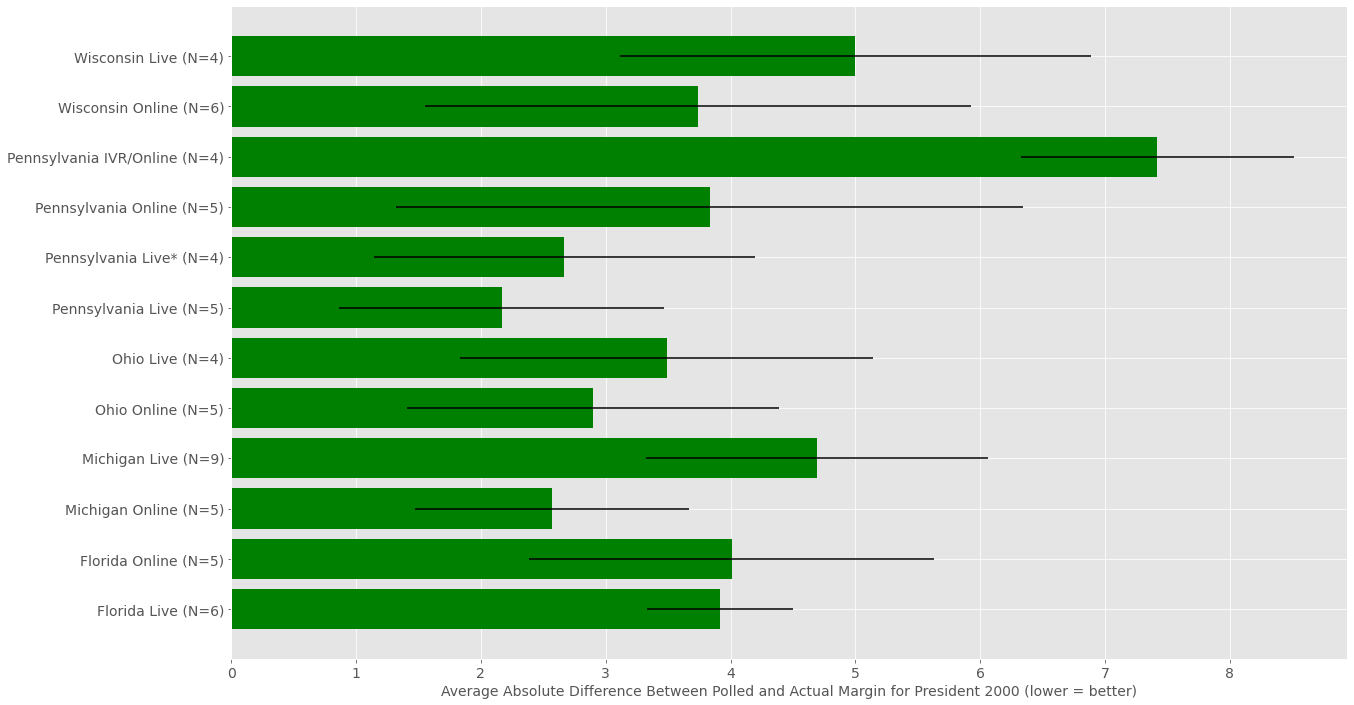

-
## Senate 2000 ##
          state methodology  polled_margin_mean  actual_margin_mean  \
0  Pennsylvania      Online          -17.200000           -6.900000   
1  Pennsylvania  IVR/Online          -16.250000           -6.900000   
2     Wisconsin      Online           30.500000           24.500000   
3      Michigan        Live           -5.000000            1.610000   
4          Ohio      Online          -27.600000          -24.030000   
5      Michigan      Online            3.000000            1.610000   
6       Florida      Online            5.250000            4.850000   
7       Florida        Live            6.000000            4.850000   
8          Ohio        Live          -25.225000          -24.030000   

   margin_diff_mean  polled_margin_count  
0        -10.300000                    5  
1         -9.350000                    4  
2          6.000000                    6  
3         -6.610000                    4  
4         -3.570000                    5  
5          

<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


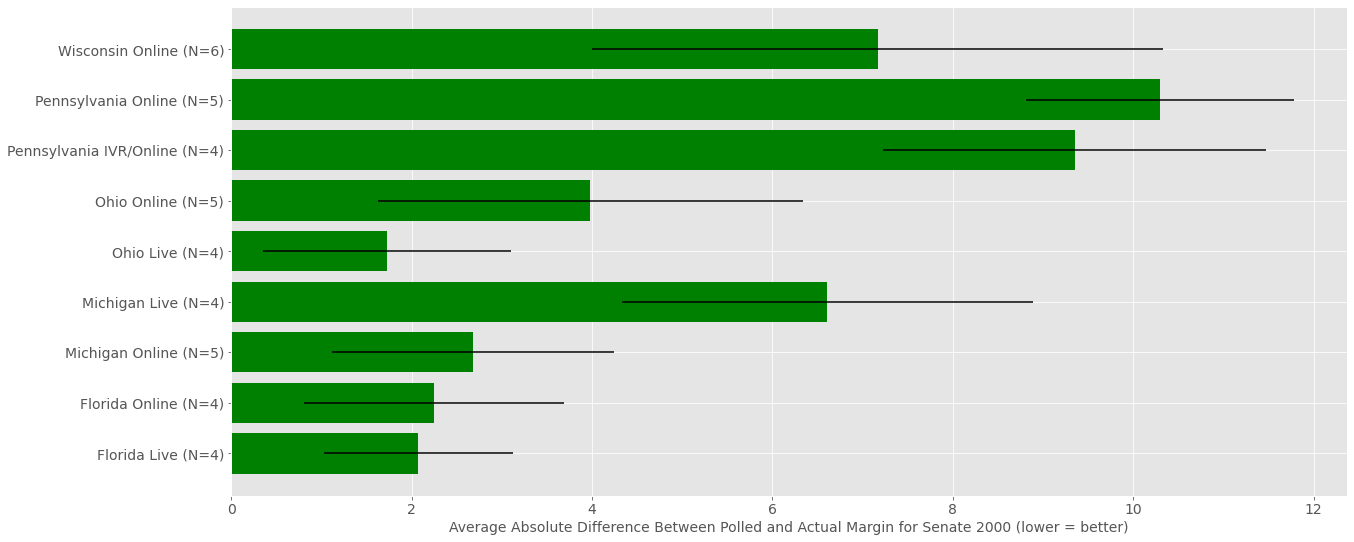

-
## Governor 2000 ##
-
## Gcb 2000 ##
-


<ipython-input-797-fe95f439b01b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp['margin_abs_diff2'] = np.abs(disp['margin_diff'])


In [804]:
for y in [2020, 2018, 2016, 2014, 2012, 2010, 2008, 2006, 2004, 2002, 2000]:
    for p in ['president', 'senate', 'governor', 'GCB']:
        print('## {} {} ##'.format(p.title(), y))
        plot_polls(polls[polls['methodology'] != 'Unknown'],
                   grouper=['state', 'methodology'], election=p, year=y, count_filter=3)
        print('-')